In [40]:
import matplotlib.font_manager as fm

# 설치된 폰트 출력
font_list = [font.name for font in fm.fontManager.ttflist]
font_list

['STIXNonUnicode',
 'STIXNonUnicode',
 'DejaVu Sans Mono',
 'cmb10',
 'cmex10',
 'cmsy10',
 'DejaVu Sans Mono',
 'STIXGeneral',
 'DejaVu Sans',
 'STIXNonUnicode',
 'DejaVu Serif',
 'STIXSizeFourSym',
 'DejaVu Sans Mono',
 'DejaVu Serif',
 'MaruBuri',
 'STIXSizeOneSym',
 'MaruBuri',
 'MaruBuriOTF',
 'STIXSizeFiveSym',
 'STIXSizeThreeSym',
 'STIXSizeOneSym',
 'MaruBuriOTF',
 'cmmi10',
 'DejaVu Serif',
 'MaruBuriOTF',
 'DejaVu Sans',
 'STIXSizeFourSym',
 'STIXSizeTwoSym',
 'MaruBuri',
 'cmr10',
 'MaruBuri',
 'DejaVu Sans Mono',
 'DejaVu Serif Display',
 'DejaVu Sans Display',
 'STIXGeneral',
 'STIXSizeTwoSym',
 'DejaVu Serif',
 'DejaVu Sans',
 'MaruBuriOTF',
 'STIXGeneral',
 'cmtt10',
 'MaruBuriOTF',
 'cmss10',
 'MaruBuri',
 'STIXGeneral',
 'STIXSizeThreeSym',
 'DejaVu Sans',
 'STIXNonUnicode',
 'Consolas',
 'Sitka',
 'Arial',
 'Malgun Gothic',
 'Trebuchet MS',
 'Consolas',
 'Segoe UI',
 'Courier New',
 'Verdana',
 'Courier New',
 'Segoe UI',
 'Corbel',
 'Ebrima',
 'Yu Gothic',
 'Webdings

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('CUST_ORDER_OUTPUT2.utf8.csv')
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 510470 entries, 0 to 510469
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   CUST_SERIAL_NO  510470 non-null  int64 
 1   SEX             510470 non-null  object
 2   AGE             510470 non-null  object
 3   REG_DATE        510470 non-null  object
 4   ORDER_DATE      510470 non-null  object
 5   ORDER_HOUR      510470 non-null  object
 6   ORDER_WEEKDAY   510470 non-null  object
 7   IS_WEEKEND      510470 non-null  object
 8   GOODS_CODE      510470 non-null  int64 
 9   LGROUP          510470 non-null  int64 
 10  MGROUP          510470 non-null  int64 
 11  SGROUP          510470 non-null  int64 
 12  DGROUP          510470 non-null  int64 
 13  GOODS_NAME      510470 non-null  object
 14  PRICE           510470 non-null  int64 
 15  QTY             510470 non-null  int64 
dtypes: int64(8), object(8)
memory usage: 62.3+ MB


In [24]:
#일부 데이터에 값이 아닌 *가 들어가 있는경우가 있어서 
#사용할 수 없는 데이터는제거한다.
df = df[df['SEX'] != '*']
df

,CUST_SERIAL_NO,SEX,AGE,REG_DATE,ORDER_DATE,ORDER_HOUR,ORDER_WEEKDAY,IS_WEEKEND,GOODS_CODE,LGROUP,MGROUP,SGROUP,DGROUP,GOODS_NAME,PRICE,QTY
0,1000000023,F,40,2011-07,2011-11-14,"[0, 3[",토,T,20261,20,2,1,1,더무료체험,61500,1
1,1000000023,F,40,2011-07,2012-05-28,"[0, 3[",토,T,20728,10,10,3,1,메쉬런닝화 + 슈즈 2종 여성,42500,1
2,1000000023,F,40,2011-07,2012-05-28,"[0, 3[",토,T,20729,10,10,1,1,메쉬런닝화 + 슈즈 2종 남성,42500,1
3,1000000014,F,60,2011-07,2011-08-30,"[0, 3[",일,T,20062,70,2,1,4,왕만두 16봉 구성 +추가구성 참치,53400,1
4,1000000014,F,60,2011-07,2011-08-30,"[0, 3[",일,T,20133,70,2,1,11,베스트셀러 5종,33400,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
507347,1000416297,M,100,2012-08,2012-08-07,"[9, 12[",일,T,20594,85,4,4,13,미네랄 냉온정수기,0,1
507348,1000416219,M,100,2012-08,2012-08-07,"[9, 12[",일,T,20593,85,4,4,13,스마트 슬림 직수형 정수기,0,1
507349,1000416327,M,100,2012-08,2012-08-07,"[9, 12[",일,T,20594,85,4,4,13,미네랄 냉온정수기,0,1
507350,1000416225,M,100,2012-08,2012-08-07,"[9, 12[",일,T,20593,85,4,4,13,스마트 슬림 직수형 정수기,0,1


In [25]:
#구매일자, 성별, 구매 건수만 추출하여 별도의 데이터 프레임을 만든다.
df_1 = df[['ORDER_DATE', 'SEX', 'QTY']]
df_1

,ORDER_DATE,SEX,QTY
0,2011-11-14,F,1
1,2012-05-28,F,1
2,2012-05-28,F,1
3,2011-08-30,F,1
4,2011-08-30,F,1
...,...,...,...
507347,2012-08-07,M,1
507348,2012-08-07,M,1
507349,2012-08-07,M,1
507350,2012-08-07,M,1


In [26]:
#ORDER_DATE 열에 저장되어 있는 날짜를
#이용하여 month 함수로 월만 추출해서 month 라는 새로운 열을 추가한다. 

df_1['month'] = df_1['ORDER_DATE'].str.slice(start=5, stop=7)
df_1

,ORDER_DATE,SEX,QTY,month
0,2011-11-14,F,1,11
1,2012-05-28,F,1,05
2,2012-05-28,F,1,05
3,2011-08-30,F,1,08
4,2011-08-30,F,1,08
...,...,...,...,...
507347,2012-08-07,M,1,08
507348,2012-08-07,M,1,08
507349,2012-08-07,M,1,08
507350,2012-08-07,M,1,08


In [27]:
#성별로 구분하여 월별 구매 건수의 총합을 구해서 확인한다.
tmp = df_1.groupby(['month','SEX'])['QTY'].sum()
tmp1 = tmp.unstack()
tmp1

SEX,F,M
month,,
01,29851,15168
02,26487,11039
03,27142,12254
04,37208,17452
05,54211,30301
06,44600,29998
07,51767,40917
08,19478,11186
09,5168,1870


In [28]:
#F나 M 대신 female, male이라고
#표시하기 위해서 변환 함수를
#만들어서 적용하여 gender라는
#열을 추가한다.


df_1['gender'] = df_1['SEX'].apply(lambda x: 'female' if x == 'F' else 'male')
  



In [29]:
df_1

,ORDER_DATE,SEX,QTY,month,gender
0,2011-11-14,F,1,11,female
1,2012-05-28,F,1,05,female
2,2012-05-28,F,1,05,female
3,2011-08-30,F,1,08,female
4,2011-08-30,F,1,08,female
...,...,...,...,...,...
507347,2012-08-07,M,1,08,male
507348,2012-08-07,M,1,08,male
507349,2012-08-07,M,1,08,male
507350,2012-08-07,M,1,08,male


<AxesSubplot:xlabel='month'>

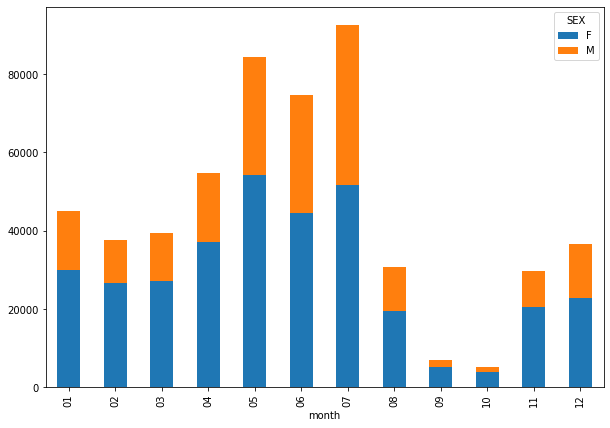

In [30]:
# 성별 별로 월별 구매 건수를 누적 막대 그래프로 표시한다.
tmp1.plot.bar(stacked= True, figsize=(10,7))

<AxesSubplot:xlabel='month'>

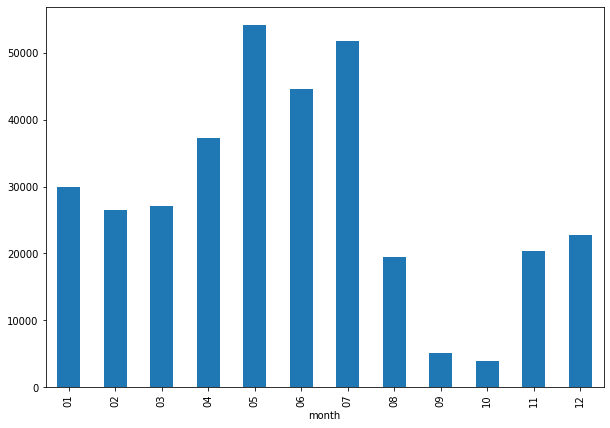

In [31]:
#성별 별로 월별 구매 건수를 별도의 막대 그래프로 표시한다
#여성
female_month_purchase = tmp1['F']
female_month_purchase.plot.bar(figsize=(10,7))

<AxesSubplot:xlabel='month'>

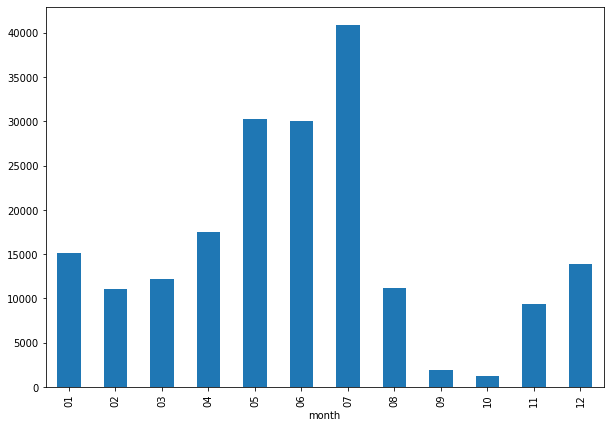

In [32]:
male_month_purchase = tmp1['M']
male_month_purchase.plot.bar(figsize=(10,7))

# 연령대 구매 건수

In [33]:
#구매일자, 나이, 구매 건수 만 추출하여 별도의 데이터 프레임을 만든다.
df_2 = df[['ORDER_DATE','AGE', 'QTY']]
df_2

,ORDER_DATE,AGE,QTY
0,2011-11-14,40,1
1,2012-05-28,40,1
2,2012-05-28,40,1
3,2011-08-30,60,1
4,2011-08-30,60,1
...,...,...,...
507347,2012-08-07,100,1
507348,2012-08-07,100,1
507349,2012-08-07,100,1
507350,2012-08-07,100,1


In [34]:
#ORDER_DATE 열에 저장되어 있는 날짜를 이용하여 month 함수로 월만 추출해서 month 라는 새로운 열을 추가한다. 
df_2['month'] = df_2['ORDER_DATE'].str.slice(start=5, stop=7)
df_2

,ORDER_DATE,AGE,QTY,month
0,2011-11-14,40,1,11
1,2012-05-28,40,1,05
2,2012-05-28,40,1,05
3,2011-08-30,60,1,08
4,2011-08-30,60,1,08
...,...,...,...,...
507347,2012-08-07,100,1,08
507348,2012-08-07,100,1,08
507349,2012-08-07,100,1,08
507350,2012-08-07,100,1,08


In [35]:
#연령별로 구분하여 월별 구매 건수의 총합을 구해서 확인한다.
tmp2 = df_2.groupby(['month', 'AGE'])['QTY'].sum()
tmp2 = tmp2.unstack()
tmp2

AGE,10,20,30,40,50,60,70,80,90,100,100,20,30,40,50,60,70,80,90
month,,,,,,,,,,,,,,,,,,,
01,NaN,746.0,3929.0,10127.0,17580.0,9092.0,2546.0,294.0,439.0,266.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
02,NaN,849.0,3737.0,8752.0,14187.0,7045.0,1773.0,175.0,655.0,353.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
03,NaN,768.0,3708.0,9125.0,14960.0,7657.0,1943.0,188.0,699.0,348.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
04,NaN,820.0,4005.0,11520.0,21341.0,11589.0,2796.0,264.0,1969.0,356.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
05,NaN,1229.0,5574.0,17316.0,33268.0,16427.0,4033.0,384.0,3222.0,3059.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
06,8.0,1226.0,5751.0,15532.0,27510.0,13618.0,3361.0,244.0,4386.0,2962.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
07,NaN,1632.0,6868.0,17280.0,30349.0,14937.0,3454.0,231.0,5675.0,3429.0,557.0,103.0,468.0,1530.0,2989.0,1998.0,607.0,41.0,536.0
08,NaN,425.0,1978.0,5303.0,9022.0,3985.0,764.0,38.0,631.0,46.0,407.0,115.0,803.0,1795.0,2691.0,1546.0,418.0,18.0,679.0
09,NaN,131.0,820.0,2041.0,2455.0,1231.0,329.0,10.0,17.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
#그래프에 표시할 때, 10대, 20대, 30대와 같이표시될 수 있도록 
#나이에 “대＂를 붙여서 ages라는 열을 추가한다.
df_2['ages'] = df_2['AGE'].apply(lambda x: str(x) + '대')
df_2

,ORDER_DATE,AGE,QTY,month,ages
0,2011-11-14,40,1,11,40대
1,2012-05-28,40,1,05,40대
2,2012-05-28,40,1,05,40대
3,2011-08-30,60,1,08,60대
4,2011-08-30,60,1,08,60대
...,...,...,...,...,...
507347,2012-08-07,100,1,08,100대
507348,2012-08-07,100,1,08,100대
507349,2012-08-07,100,1,08,100대
507350,2012-08-07,100,1,08,100대


<AxesSubplot:xlabel='month'>

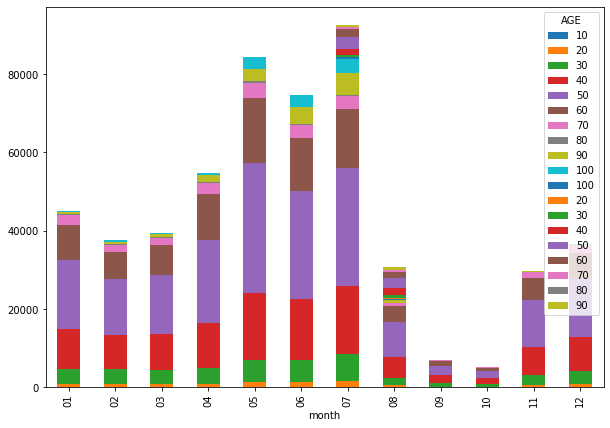

In [37]:
#연령 별로 월별 구매 건수를 누적 막대 그래프로 표시한다
tmp2.plot.bar(stacked= True, figsize=(10,7))

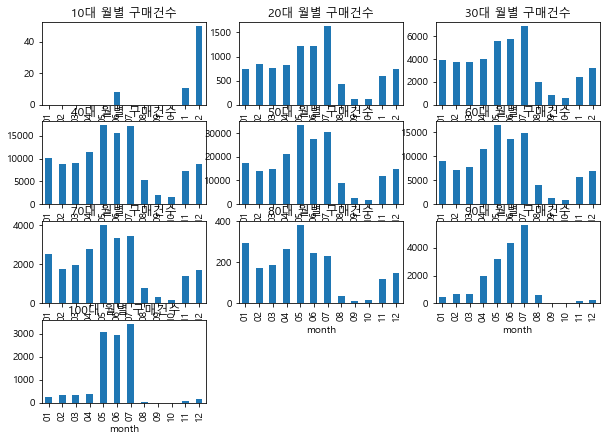

In [98]:
#연령 별로 월별 구매 건수를 별도의 막대 그래프로 표시한다.
ages = [10,20,30,40,50,60,70,80,90,100]
n =1

for x in ages:
    font_path = 'gulim'
    plt.subplot(4,3,n)
    tmp2[x].plot.bar(figsize=(10,7))
    plt.title(str(x)+'대 월별 구매건수')
    n+=1

# 성별/연령대 구매 건수


In [43]:
#구매일자, 성별, 나이, 구매 건수만 추출하여 별도의 데이터 프레임을 만든다
df_3 = df[['ORDER_DATE','SEX', 'AGE', 'QTY']]
df_3

,ORDER_DATE,SEX,AGE,QTY
0,2011-11-14,F,40,1
1,2012-05-28,F,40,1
2,2012-05-28,F,40,1
3,2011-08-30,F,60,1
4,2011-08-30,F,60,1
...,...,...,...,...
507347,2012-08-07,M,100,1
507348,2012-08-07,M,100,1
507349,2012-08-07,M,100,1
507350,2012-08-07,M,100,1


In [44]:
#날짜, 성별, 나이로 그룹을 지어 구매 수량을 합쳐서 확인한다. 
df_3.groupby(['ORDER_DATE', 'SEX', 'AGE']).sum()

QTY
ORDER_DATE SEX AGE     
2011-07-14 F   20     5
           M   30    20
2011-07-15 F   20     6
           M   30     4
2011-07-16 F   20     4
...                 ...
2012-08-08 M   50   184
               60   146
               70    26
               80    10
               90    32

[6009 rows x 1 columns]

In [45]:
#월만 추출하여 month 열을 추가하고, 
#ages 열에는 나이에 “대＂를 붙여서 추가한다.
df_3['month'] = df_3['ORDER_DATE'].str.slice(start=5, stop=7)
df_3['ages'] = df_3['AGE'].apply(lambda x: str(x) + '대')
df_3.sort_values(by='SEX', inplace=True)

In [122]:
sex_age =  df_3.groupby(['SEX', 'AGE', 'ages','month'])['QTY'].sum()  
sex_age = sex_age.reset_index()
sex_age

,SEX,AGE,ages,month,QTY
0,F,10,10대,06,8
1,F,10,10대,11,11
2,F,10,10대,12,50
3,F,20,20대,01,586
4,F,20,20대,02,659
...,...,...,...,...,...
221,M,70,70대,08,418
222,M,80,80대,07,41
223,M,80,80대,08,18
224,M,90,90대,07,536


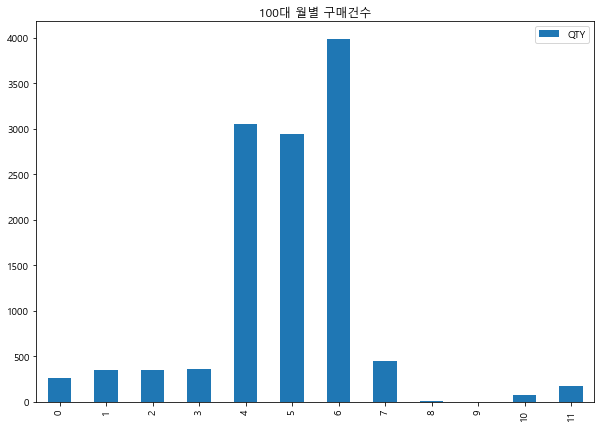

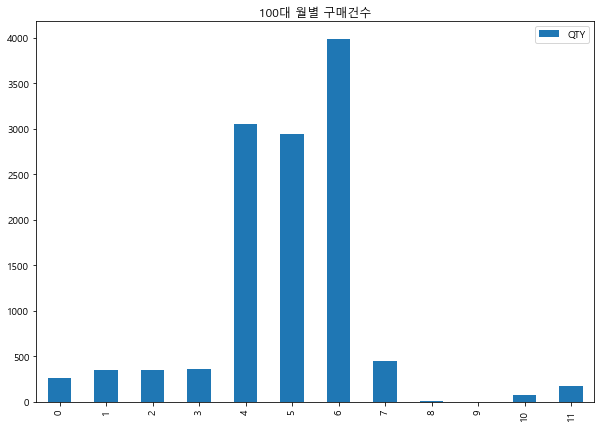

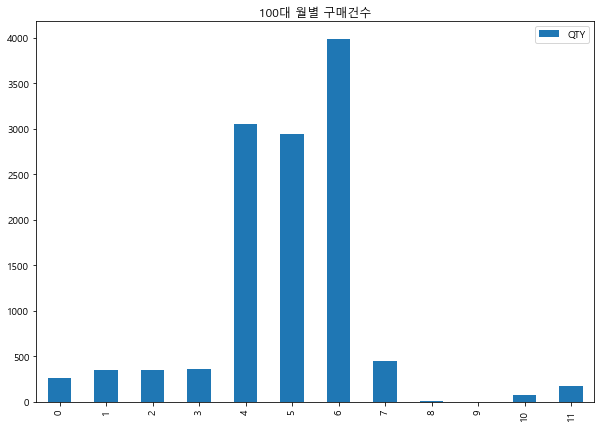

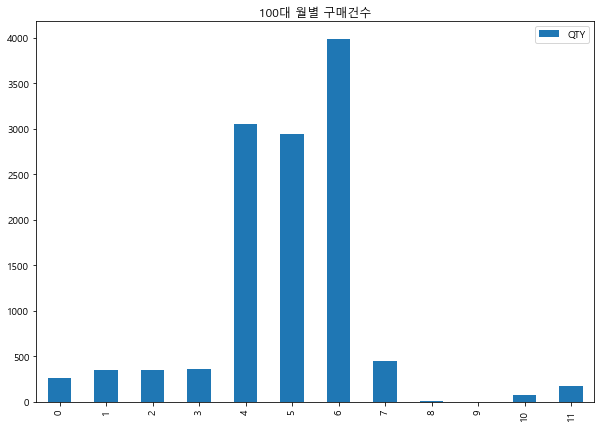

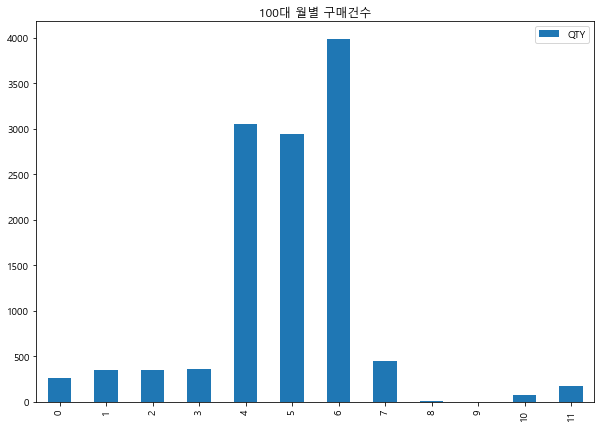

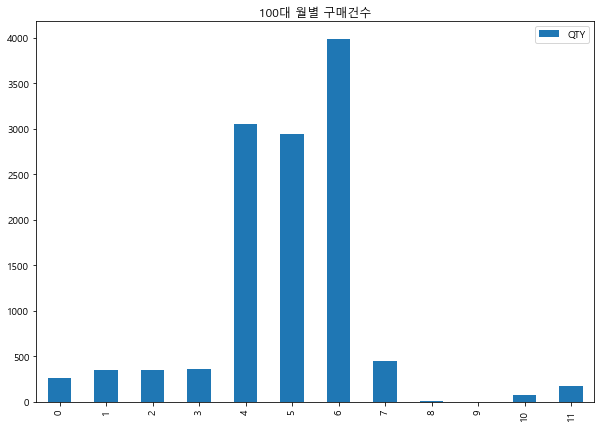

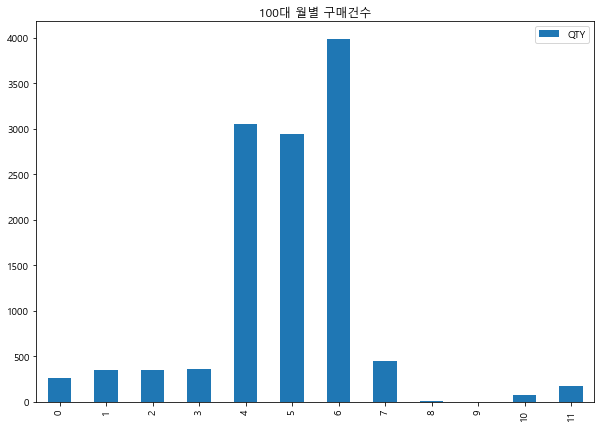

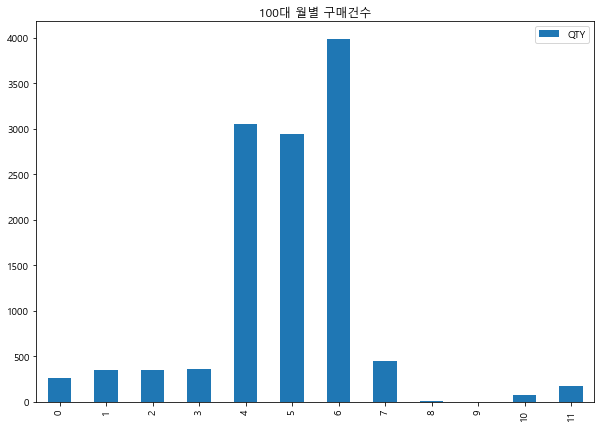

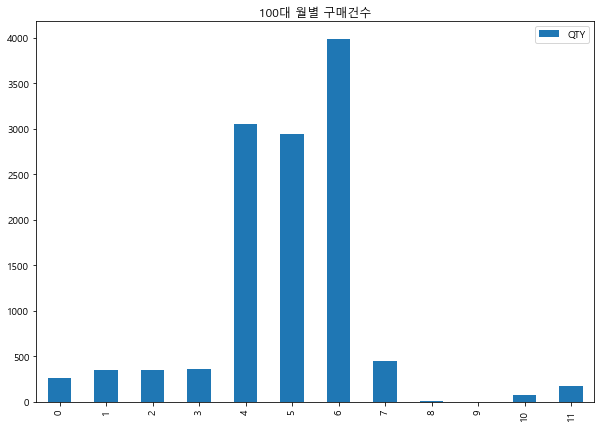

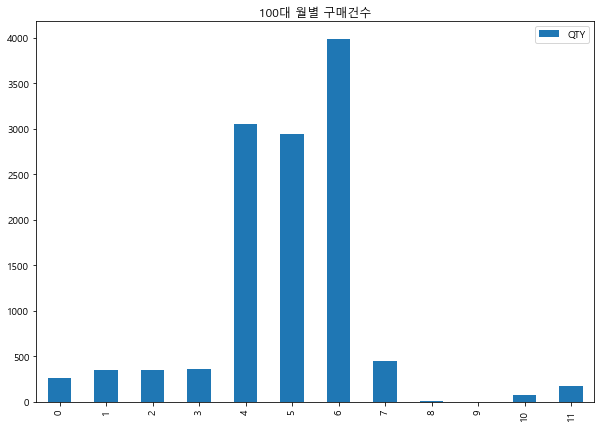

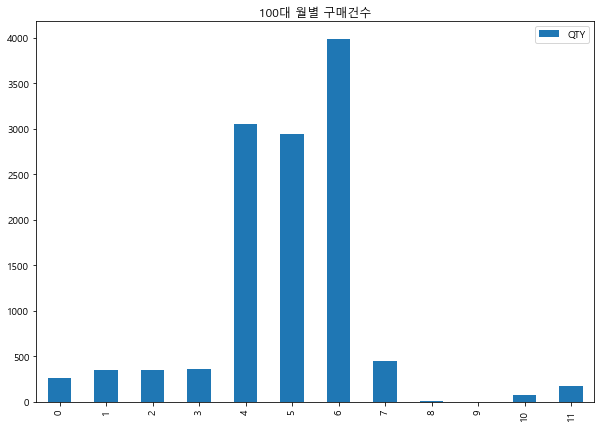

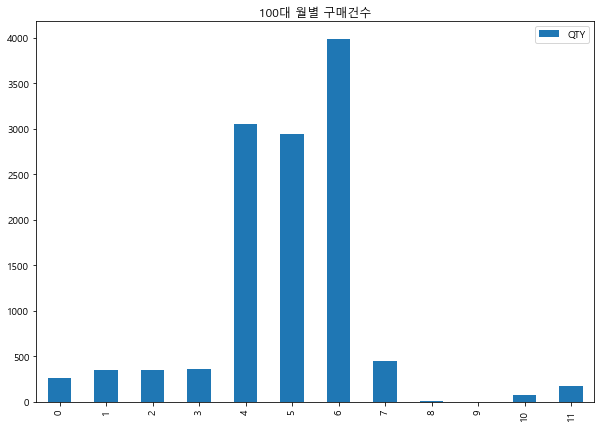

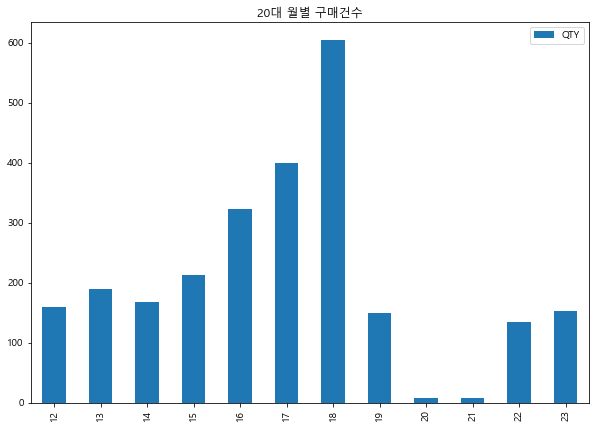

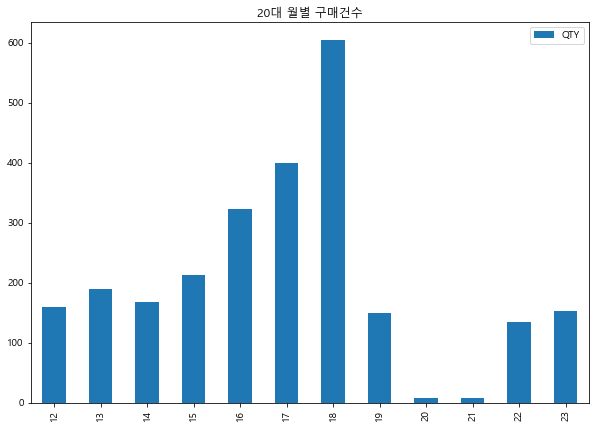

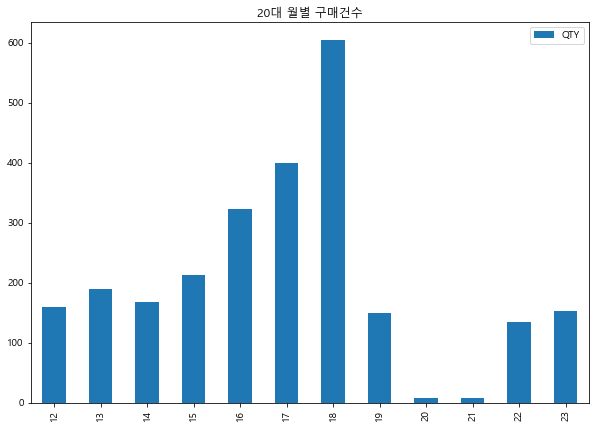

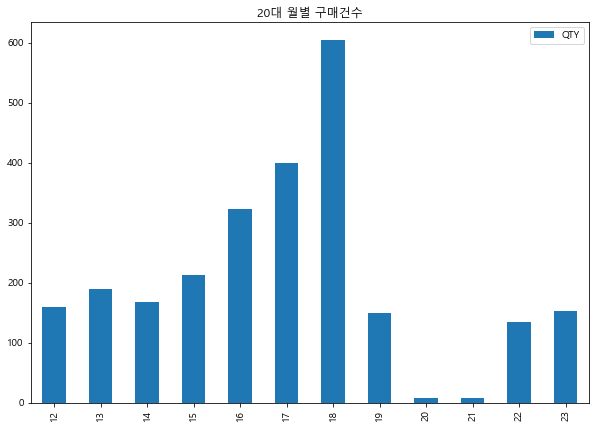

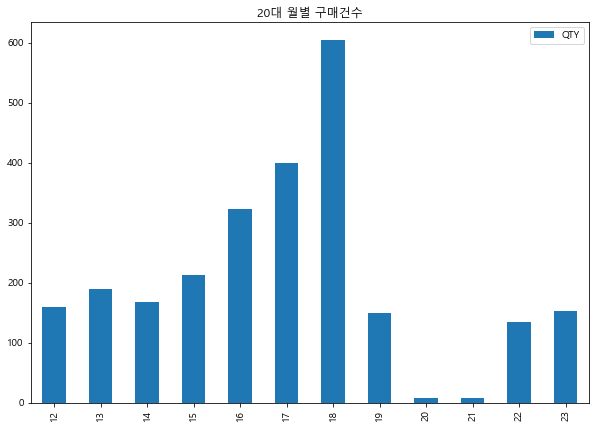

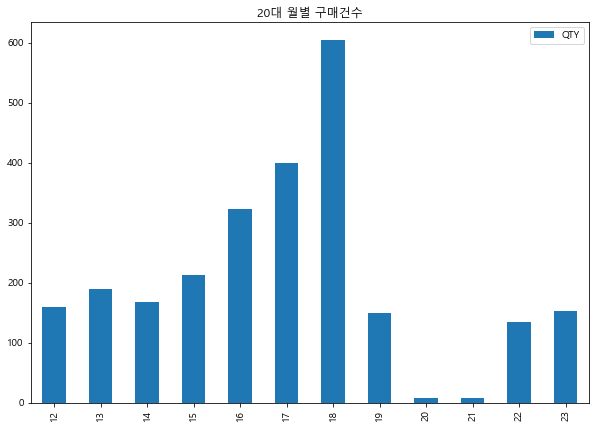

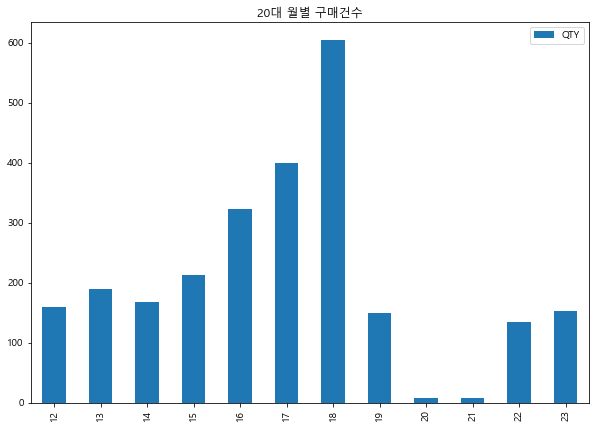

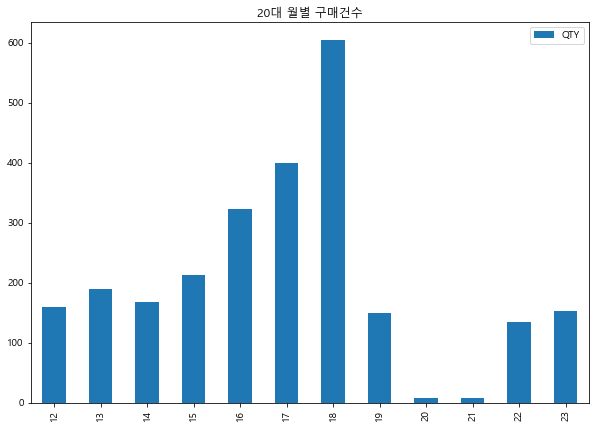

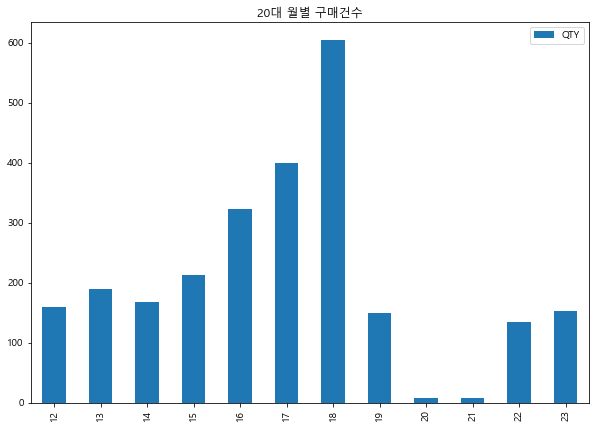

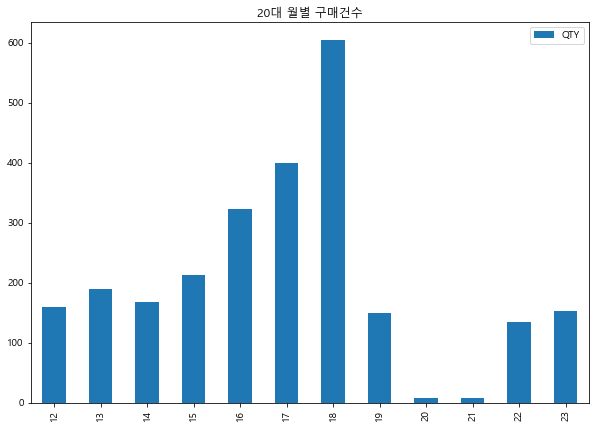

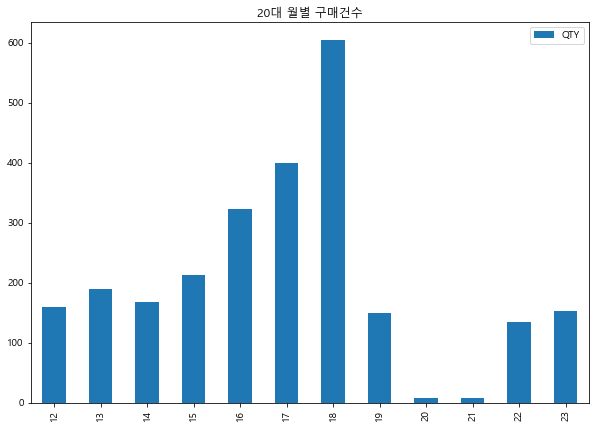

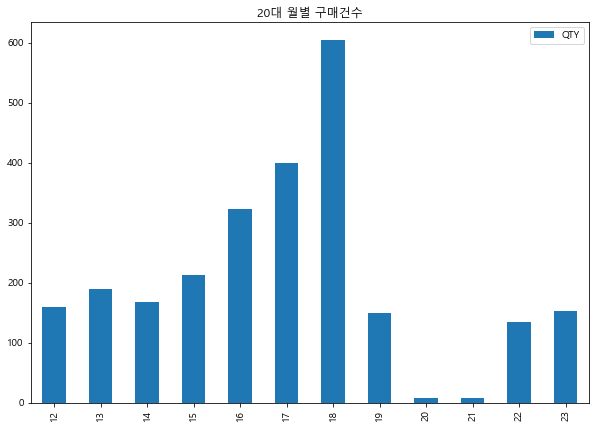

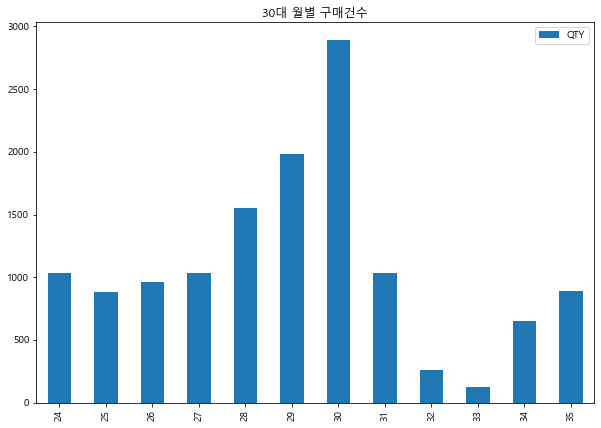

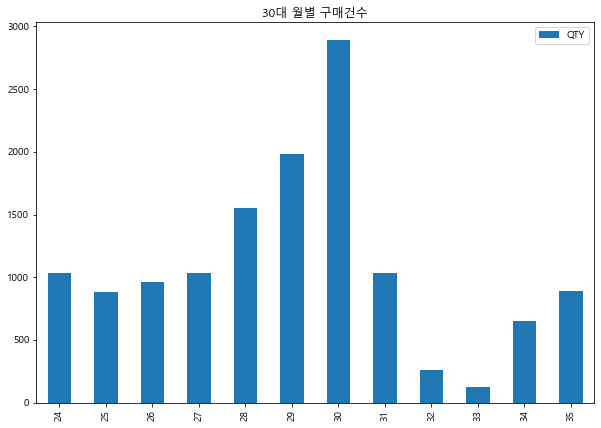

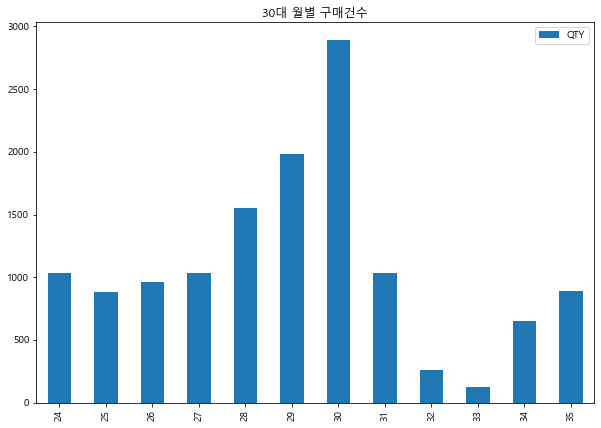

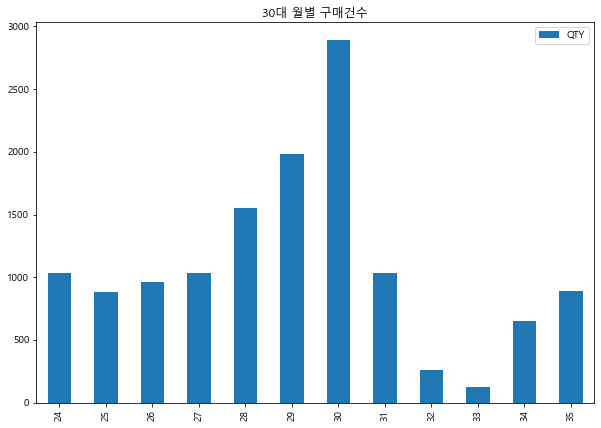

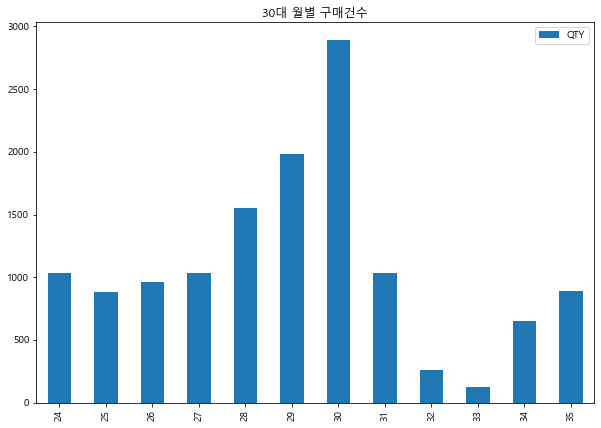

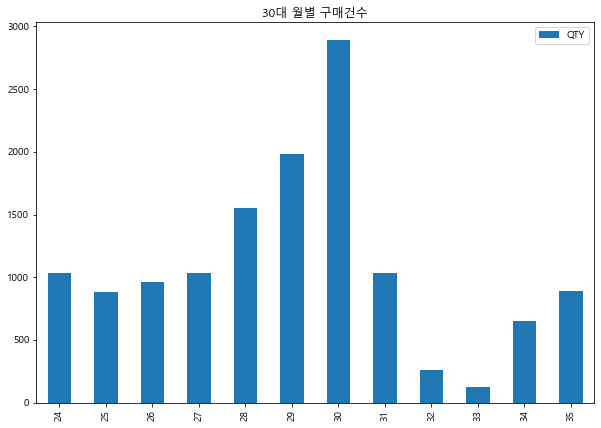

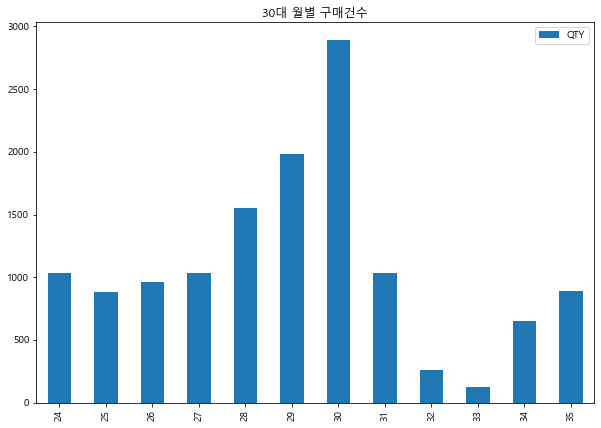

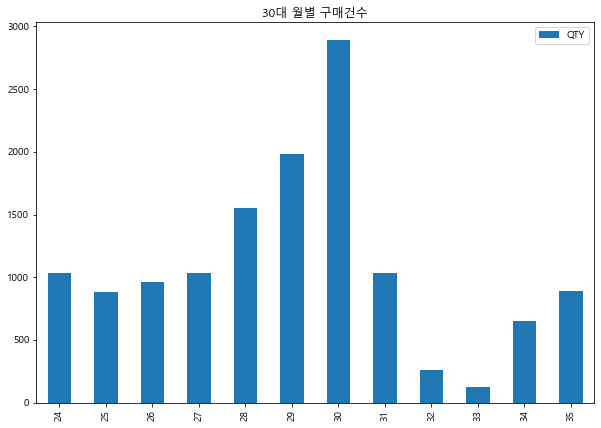

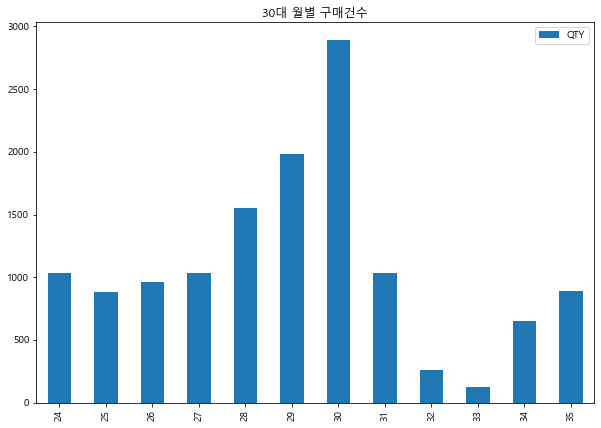

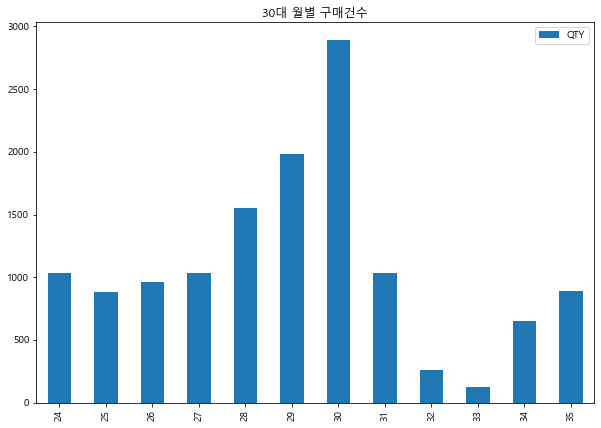

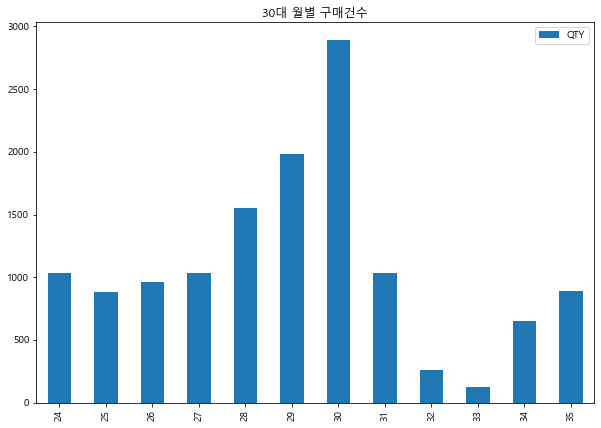

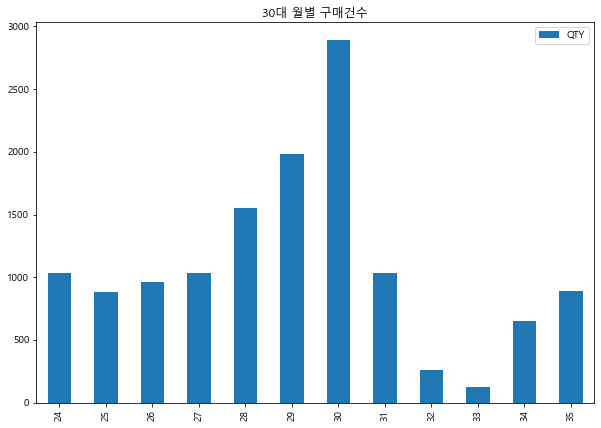

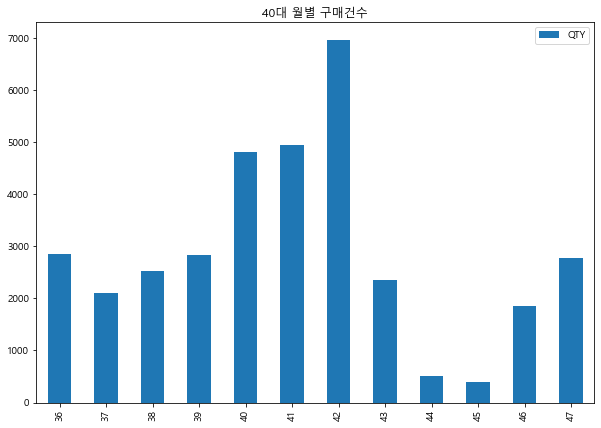

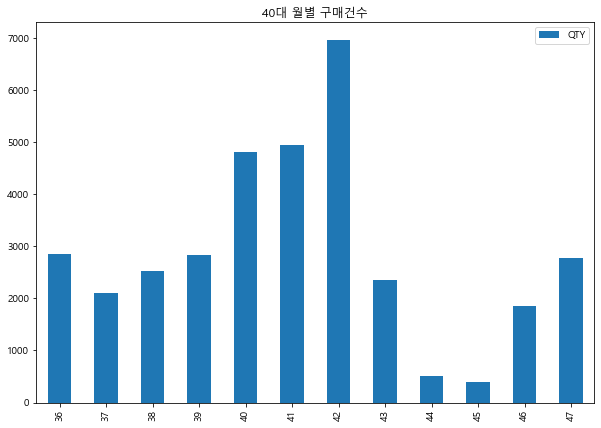

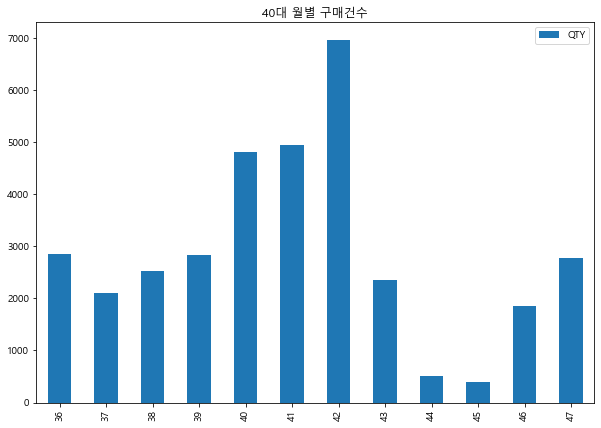

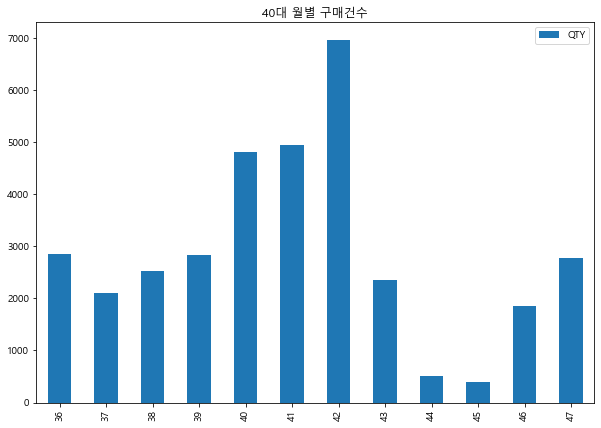

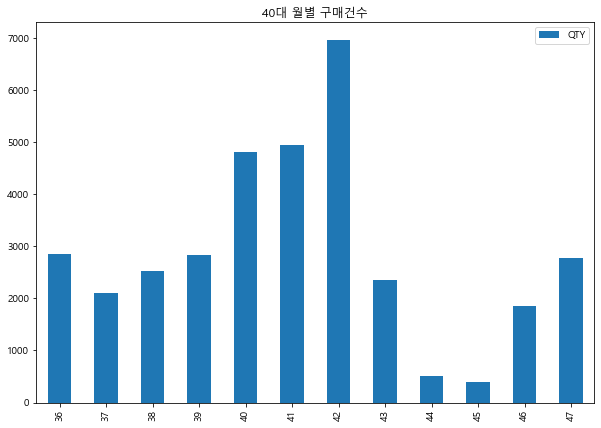

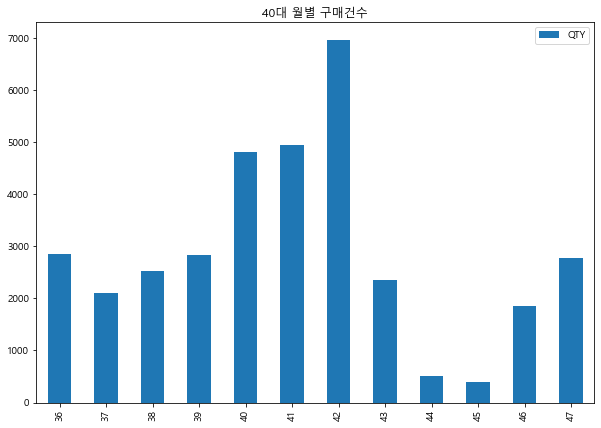

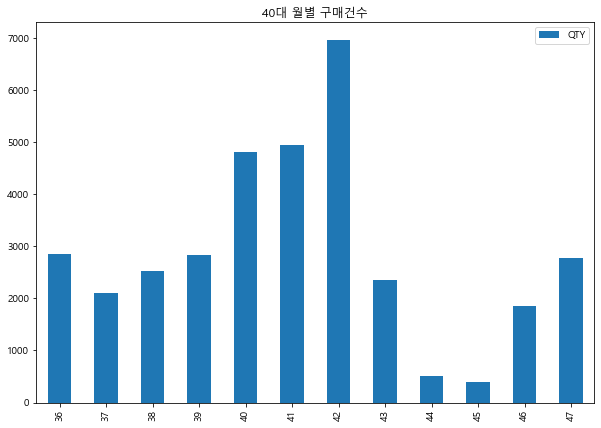

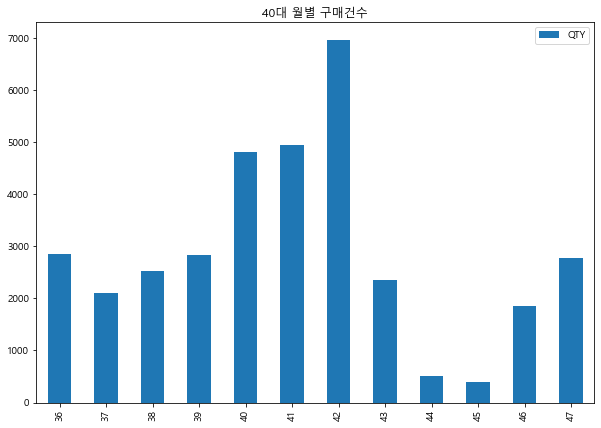

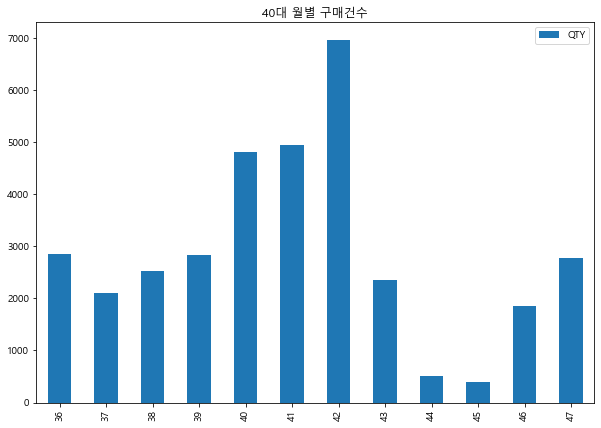

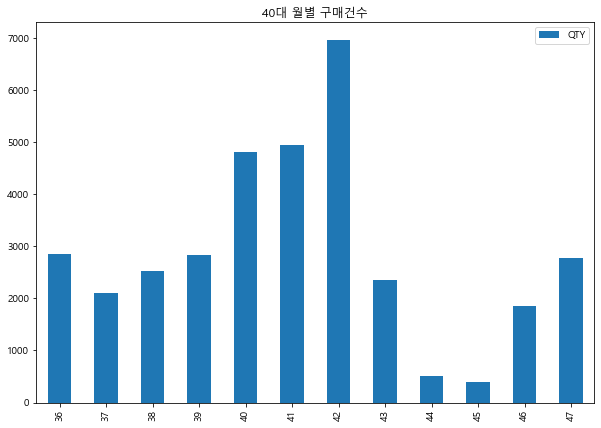

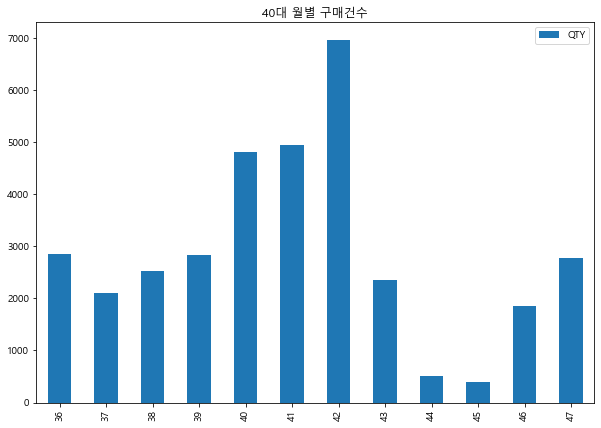

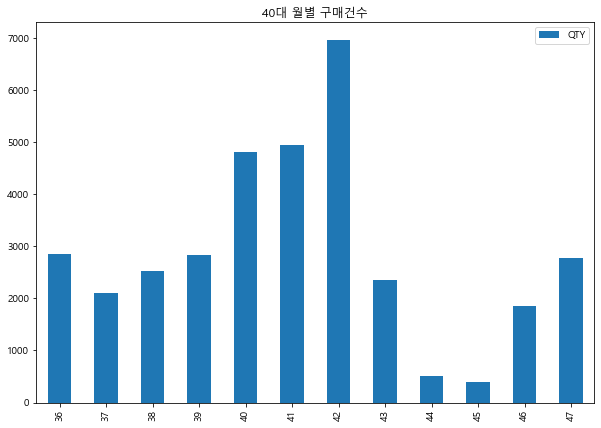

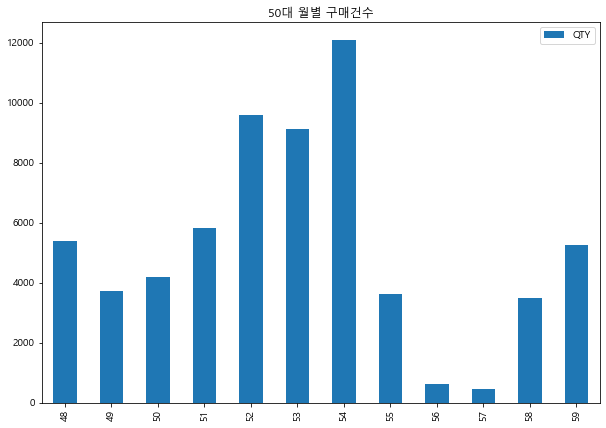

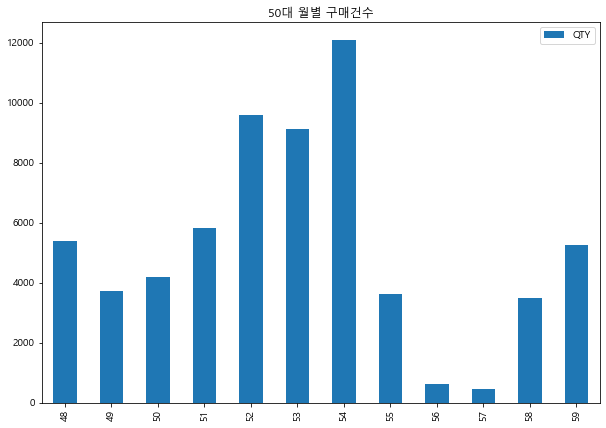

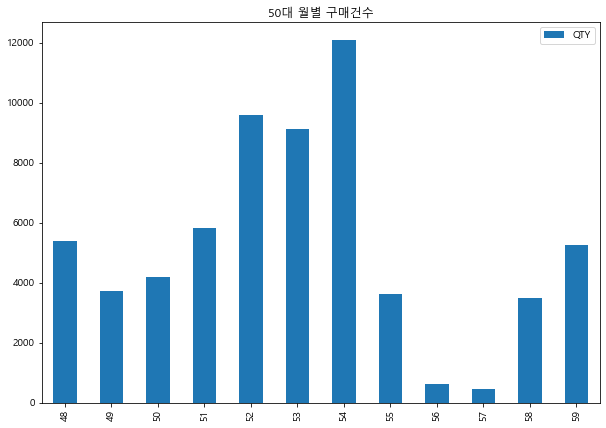

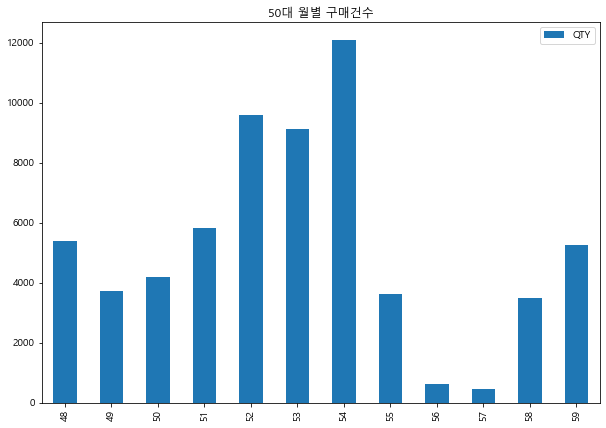

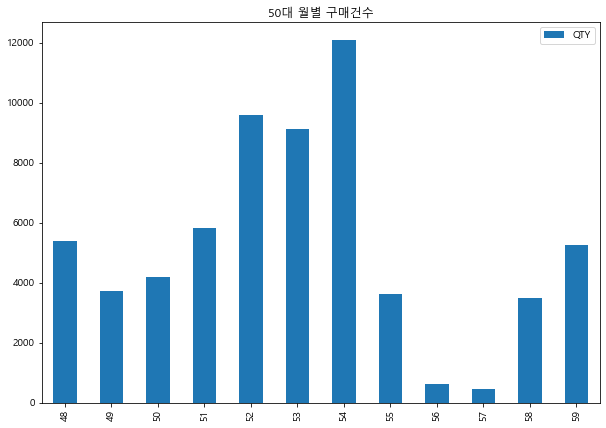

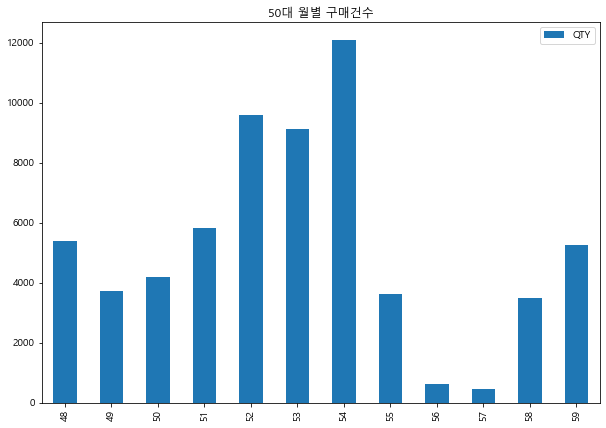

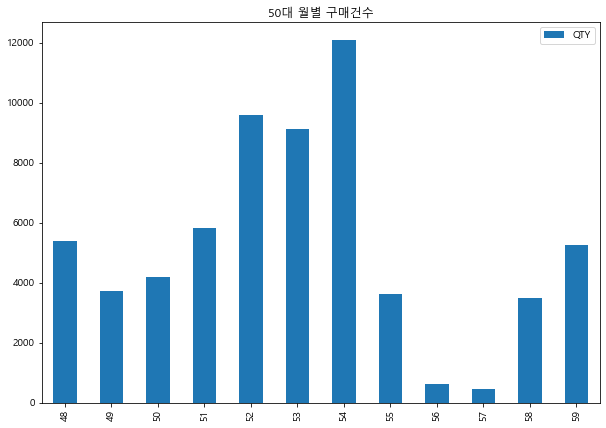

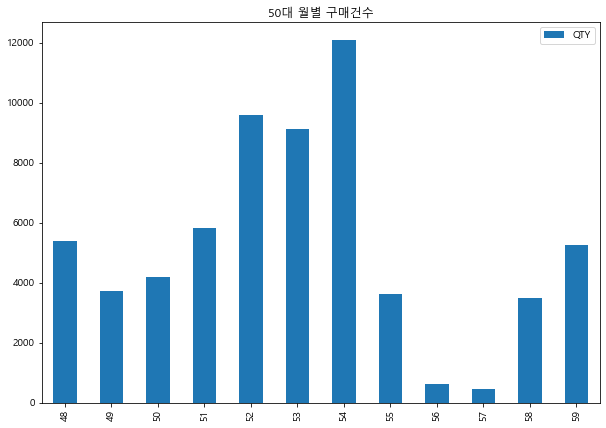

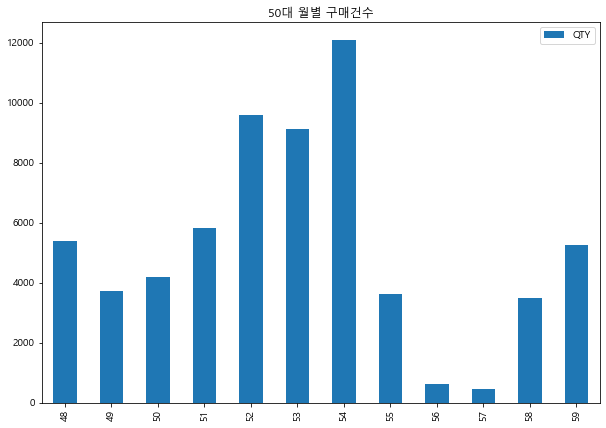

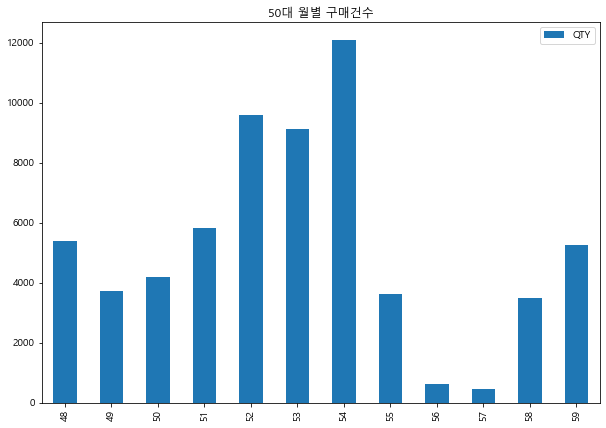

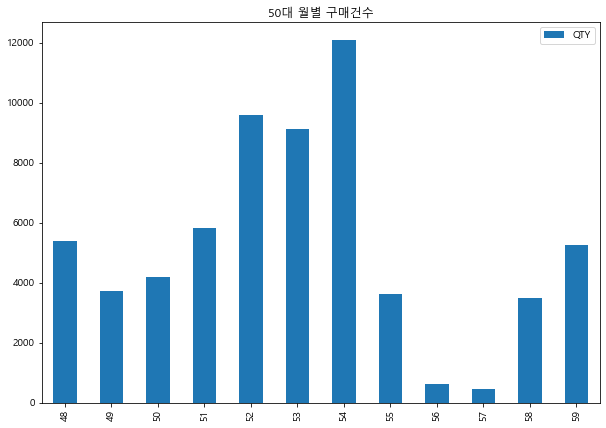

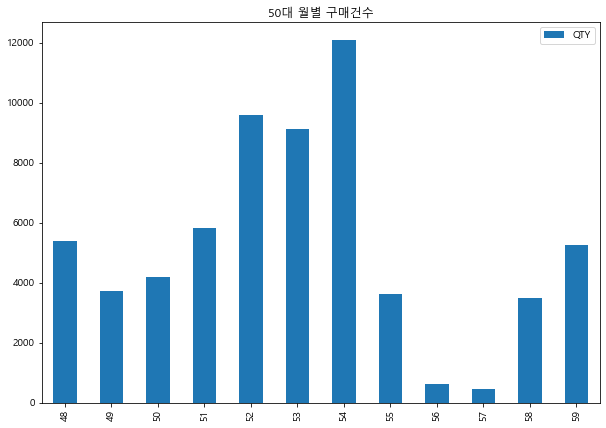

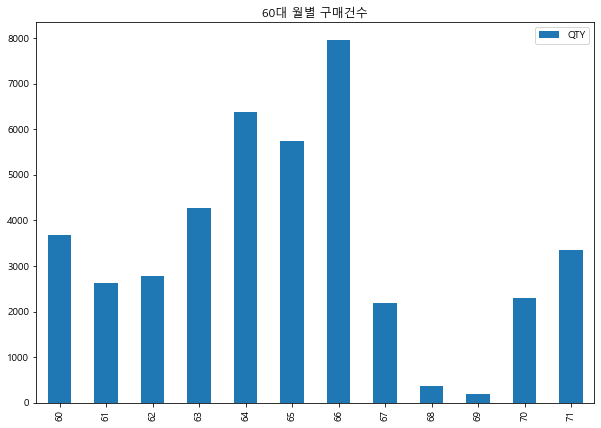

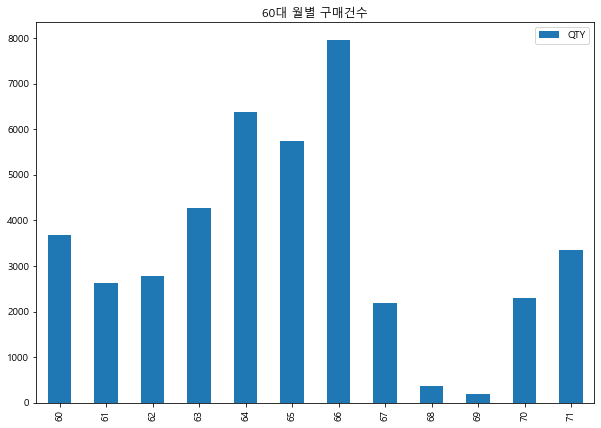

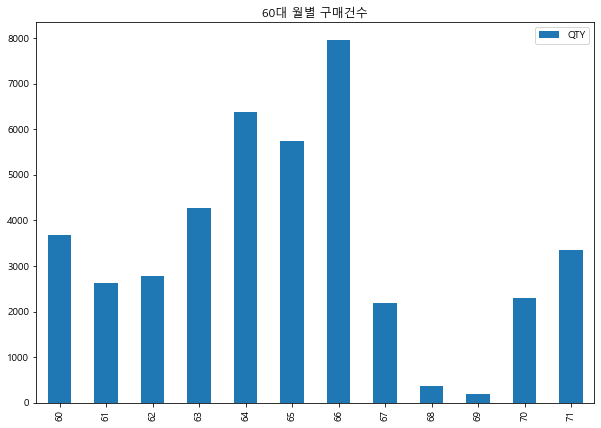

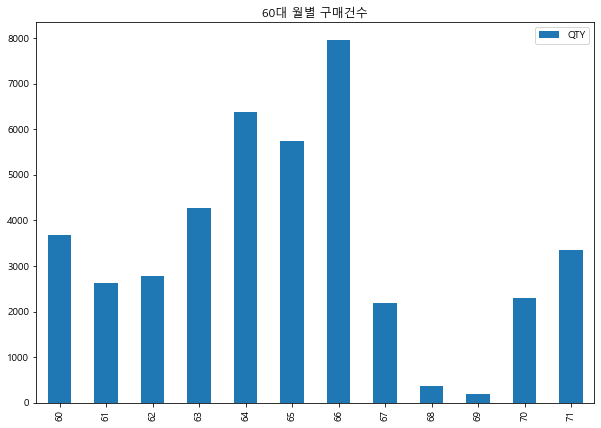

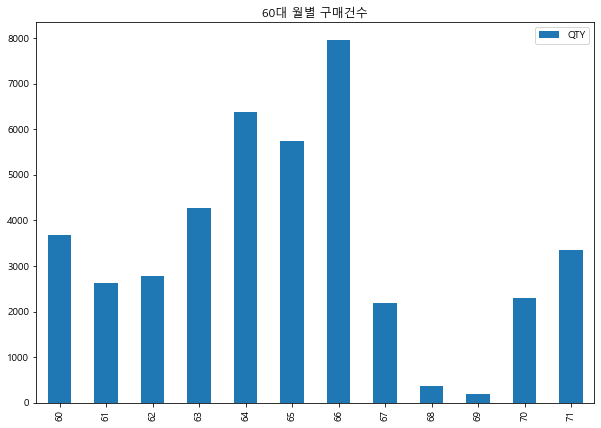

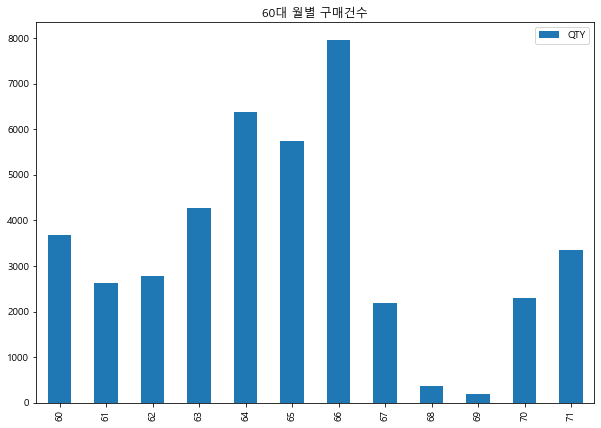

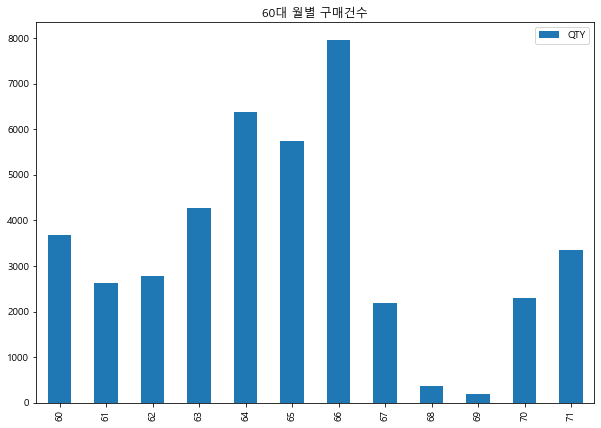

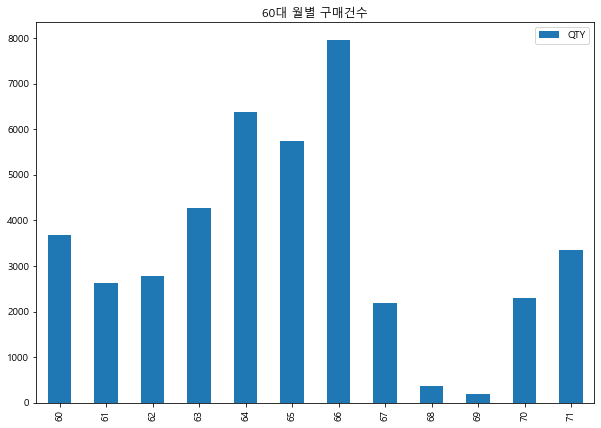

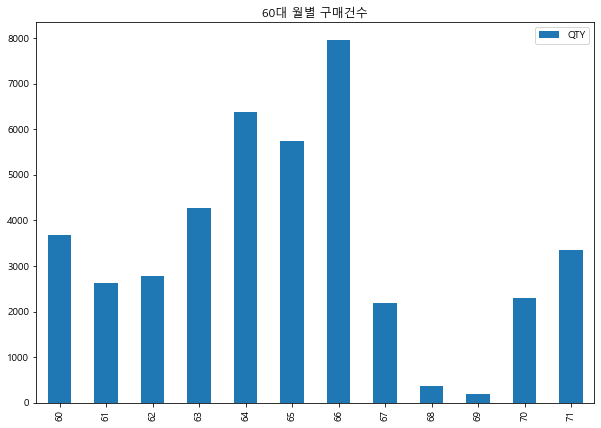

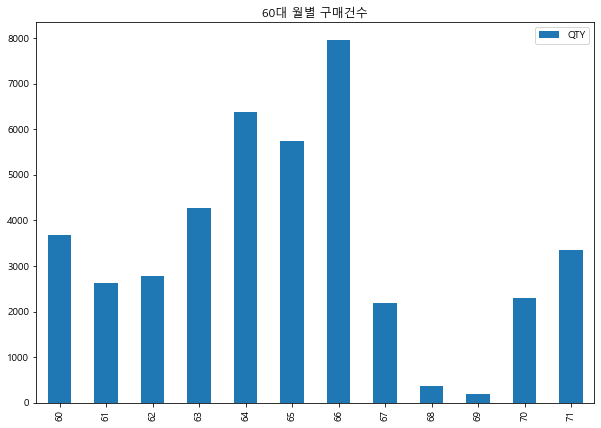

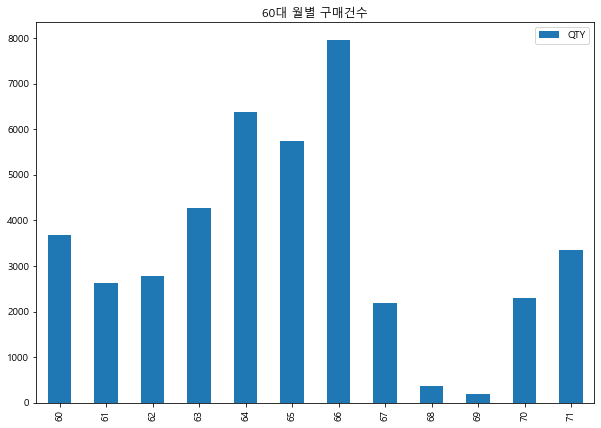

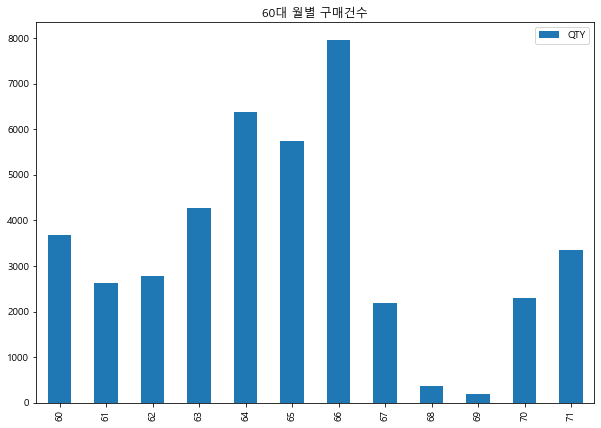

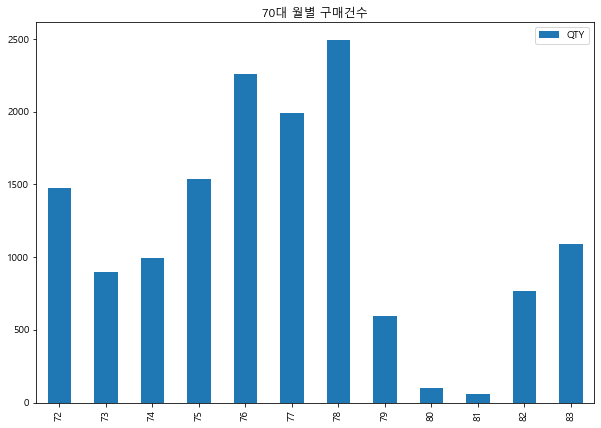

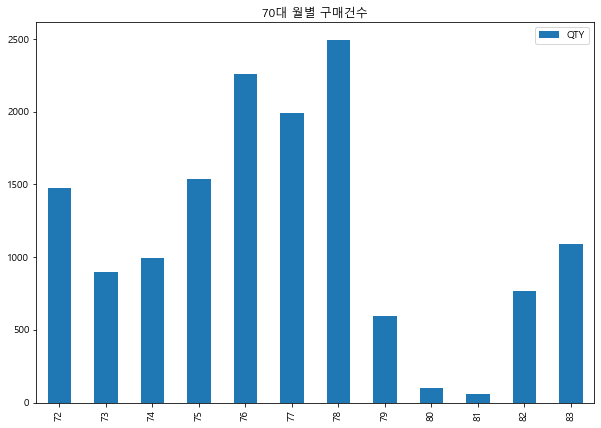

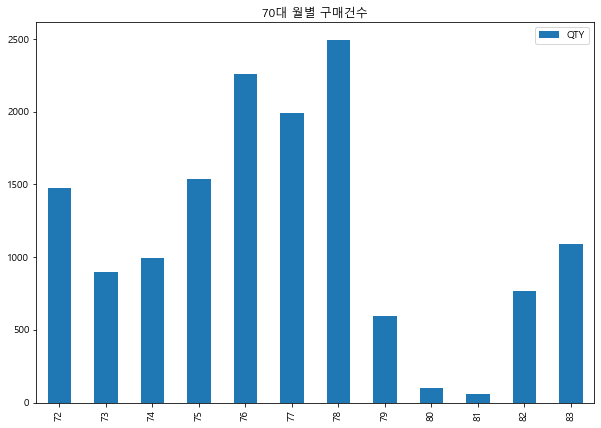

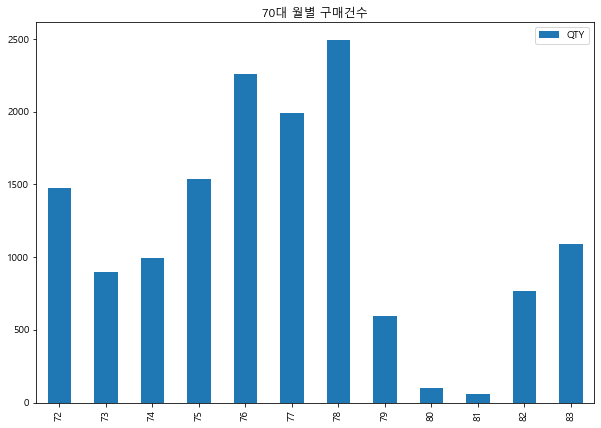

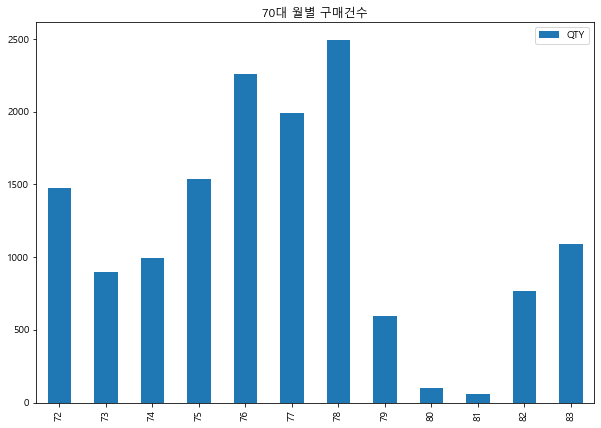

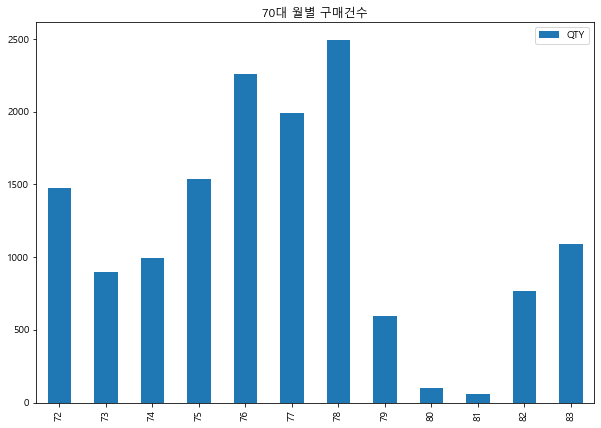

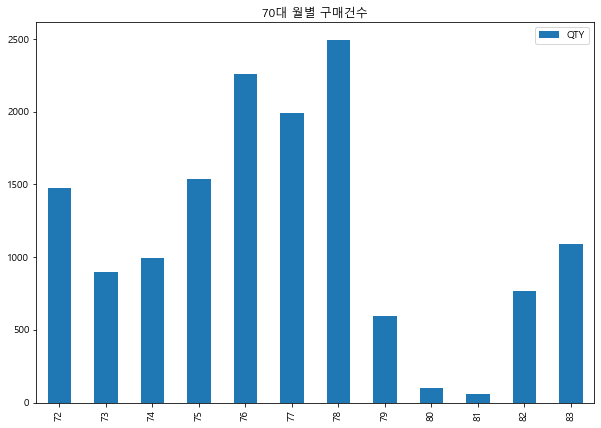

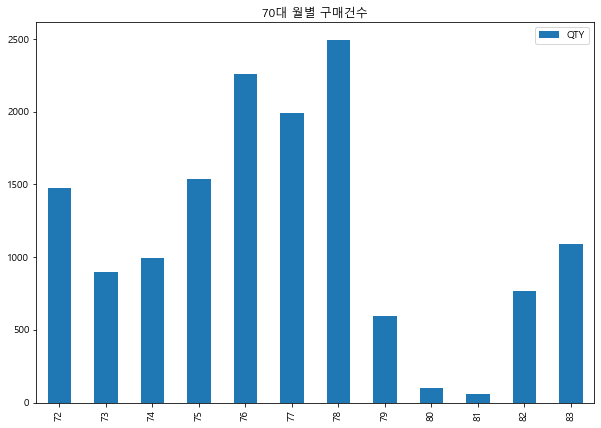

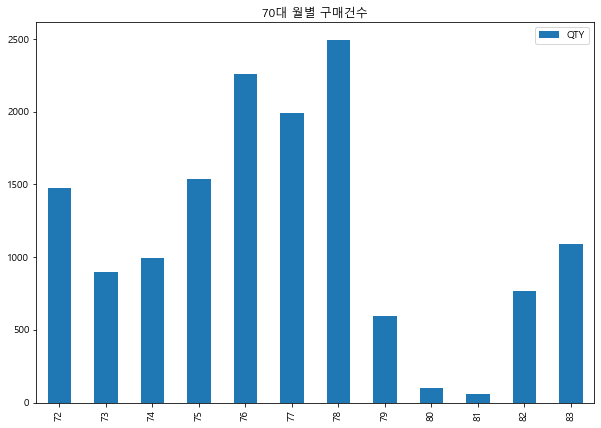

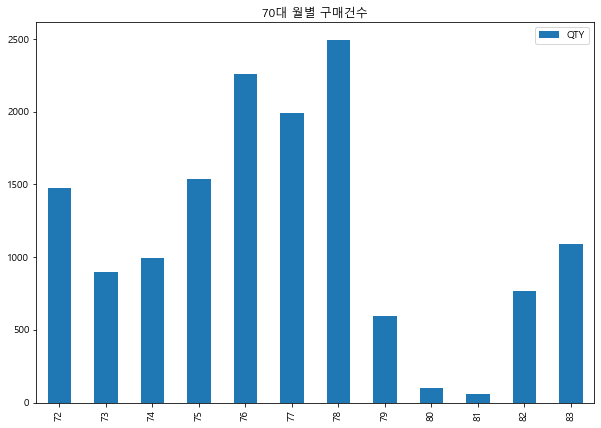

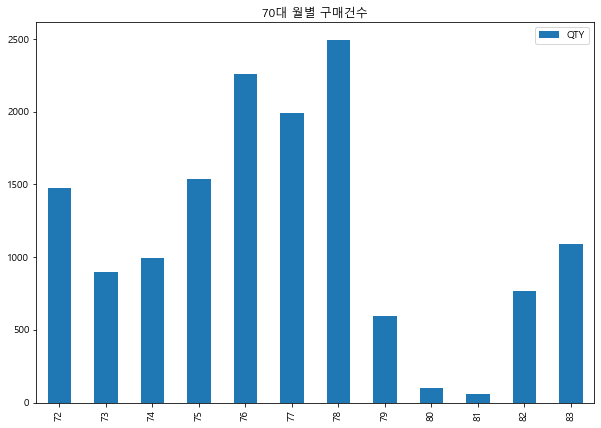

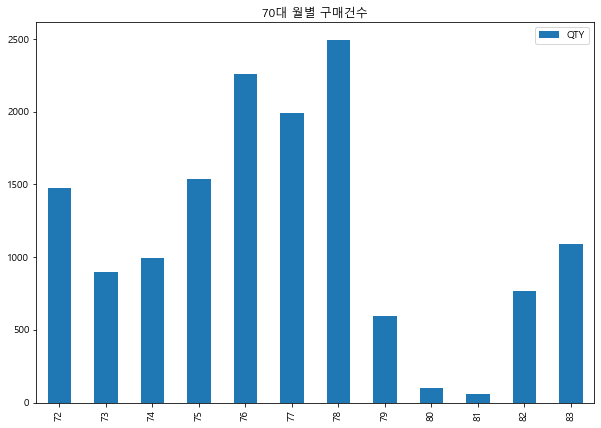

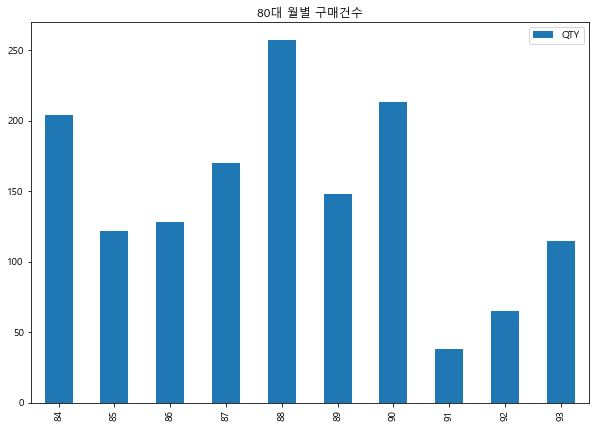

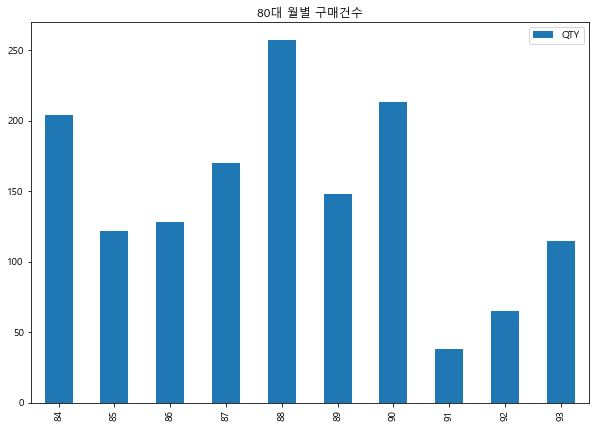

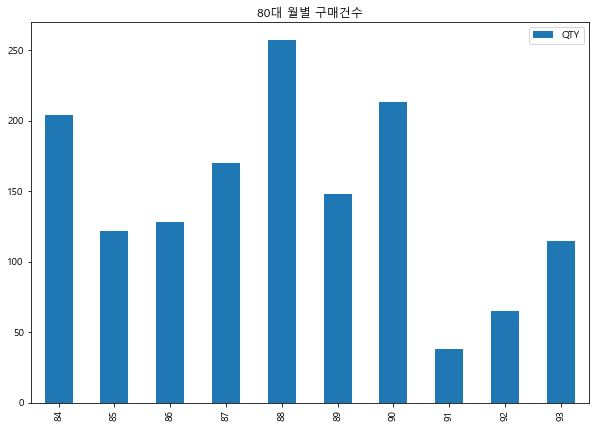

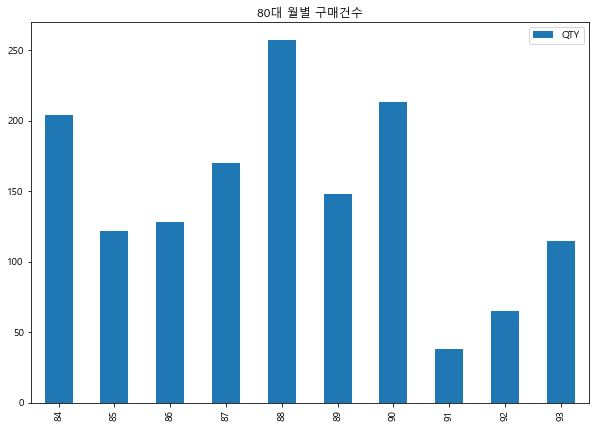

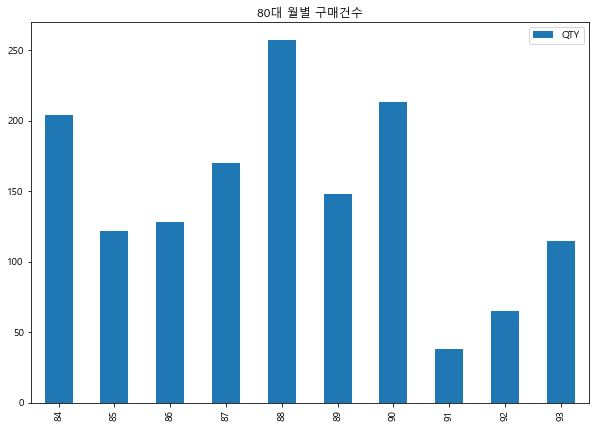

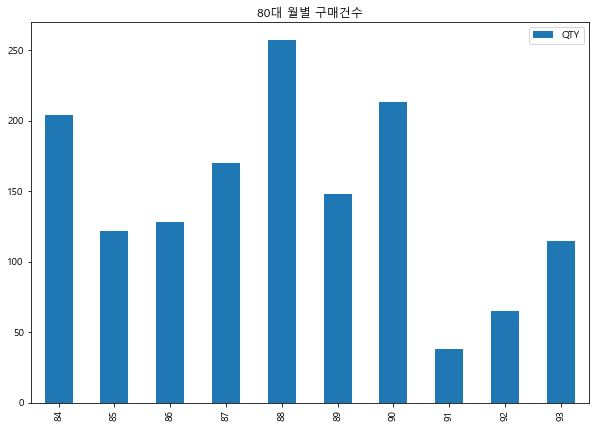

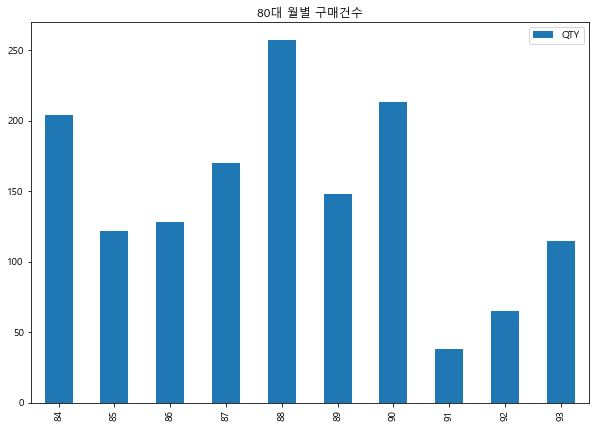

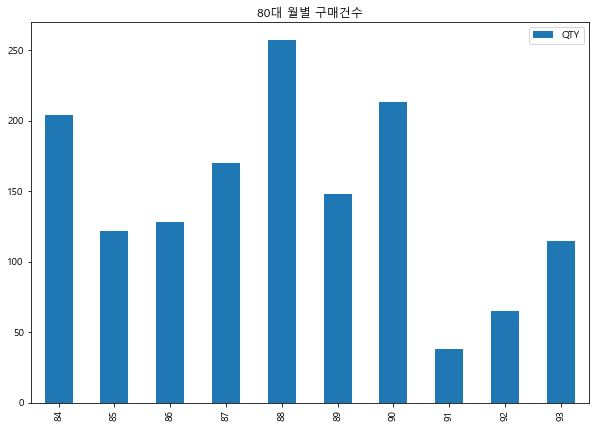

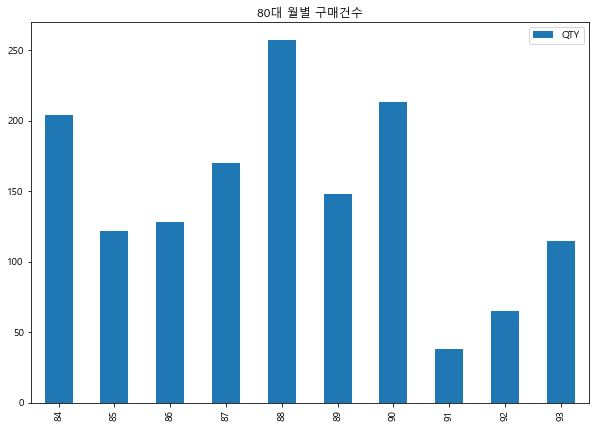

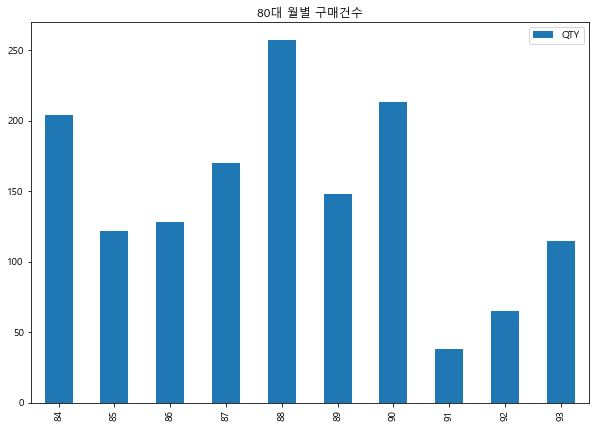

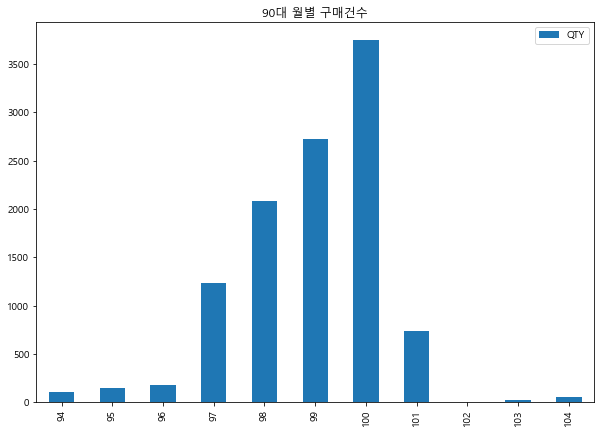

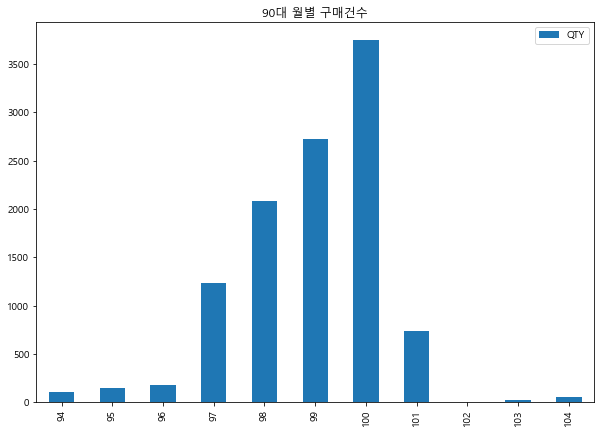

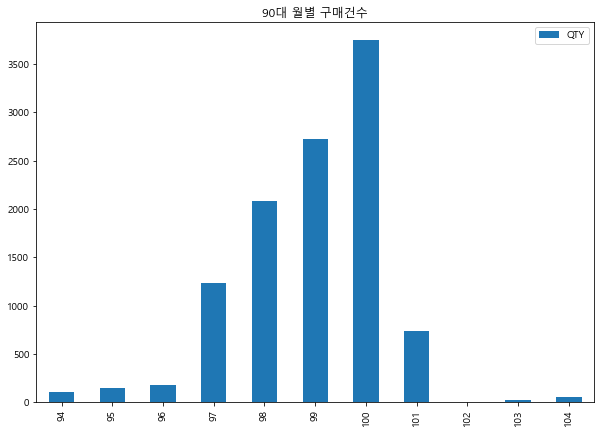

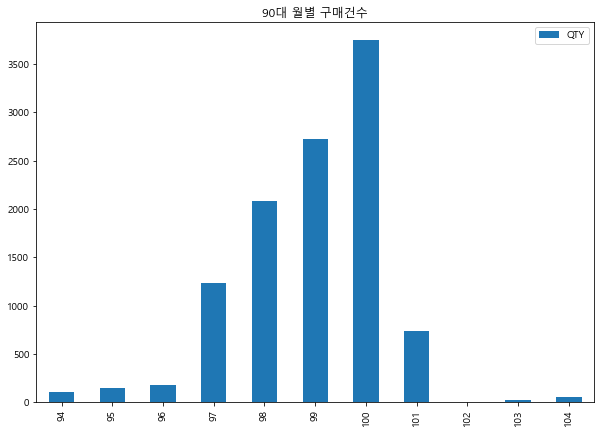

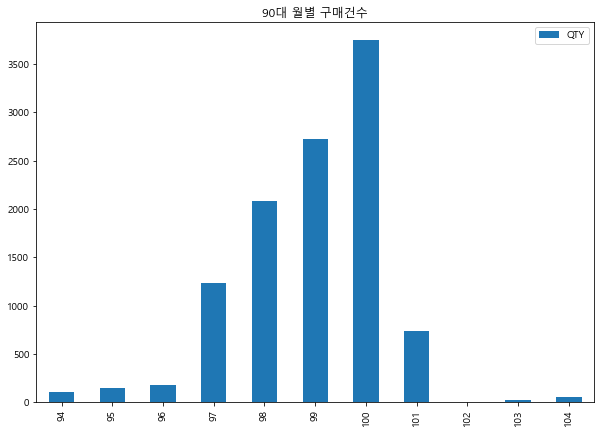

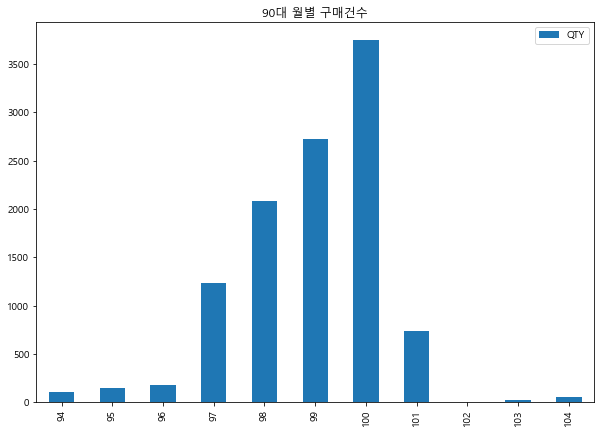

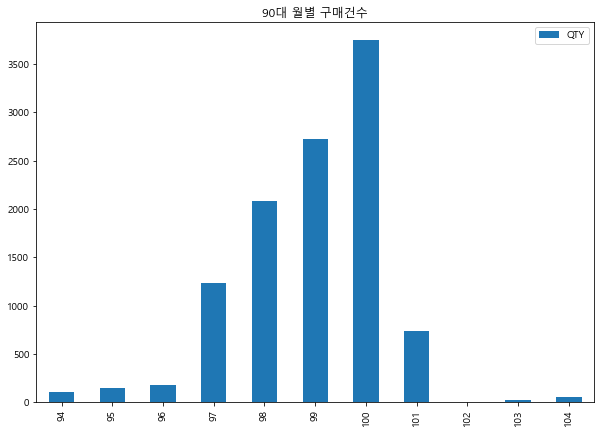

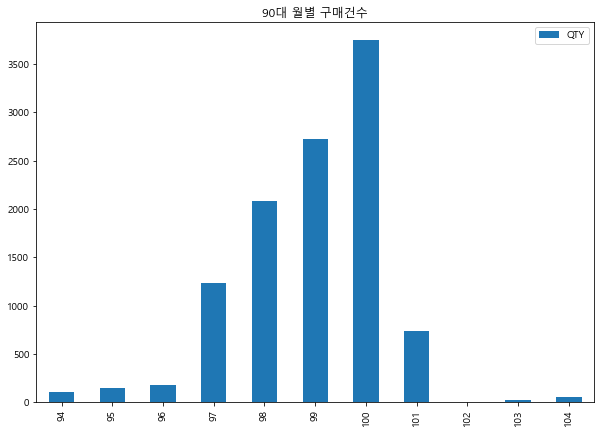

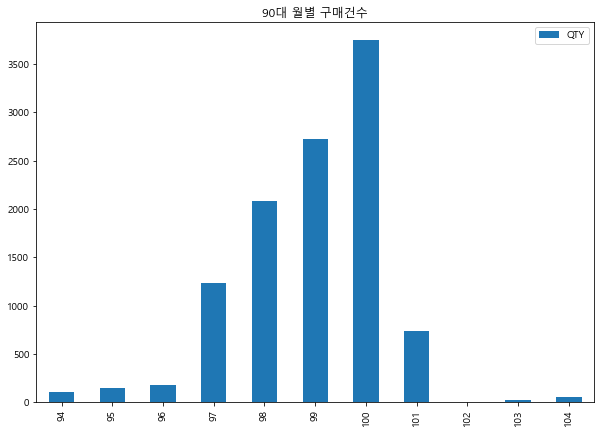

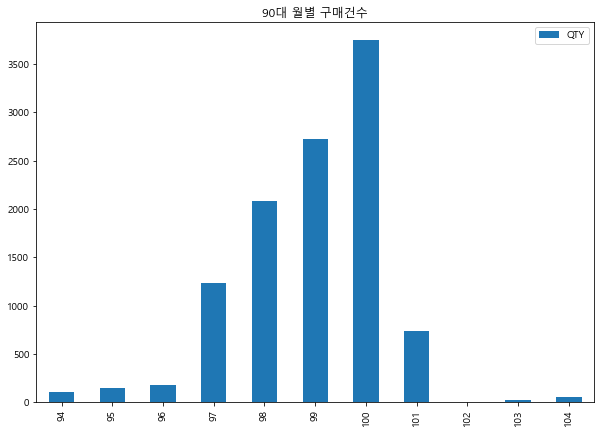

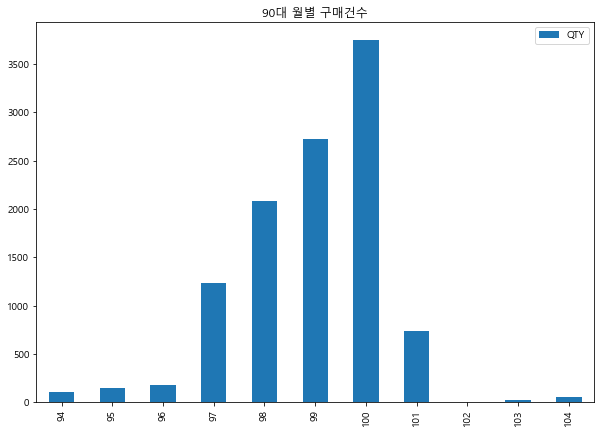

In [130]:
#성별과 연령을 기준으로 월별 구매 건수를 별도의 막대 그래프로 표시한다.
#남


n=1
shudra = sex_age[sex_age['SEX']=='M']
shudra =shudra.groupby(['ages','month'])['QTY'].sum().reset_index()

for x in shudra['ages']:
    shudra[shudra['ages']==x].plot.bar(figsize=(10,7))
    plt.title(str(x)+' 월별 구매건수')



In [128]:
#여
shudra = sex_age[sex_age['SEX']=='F']
shudra =shudra.groupby(['ages', 'month'])['QTY'].sum().reset_index()

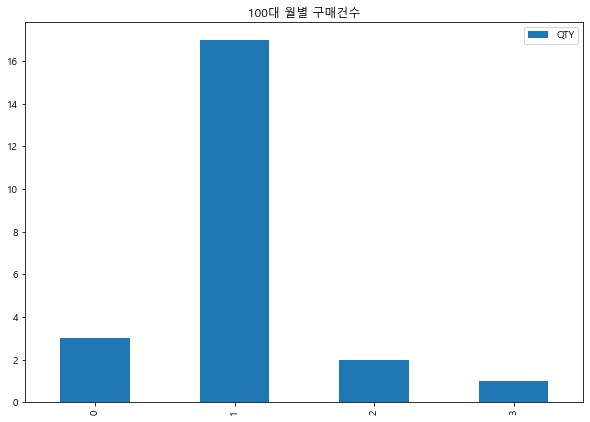

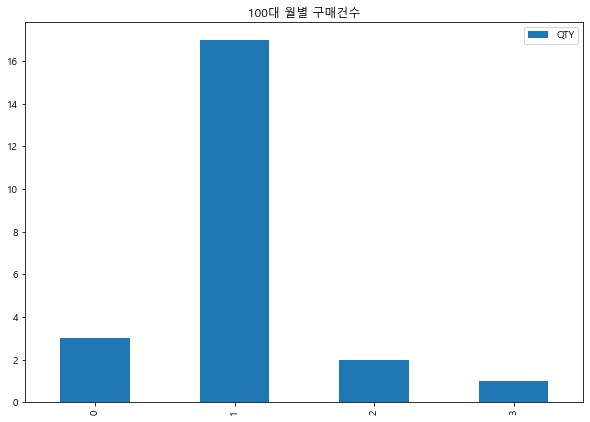

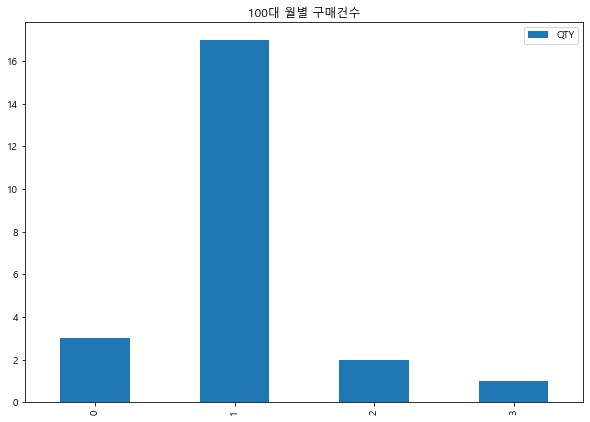

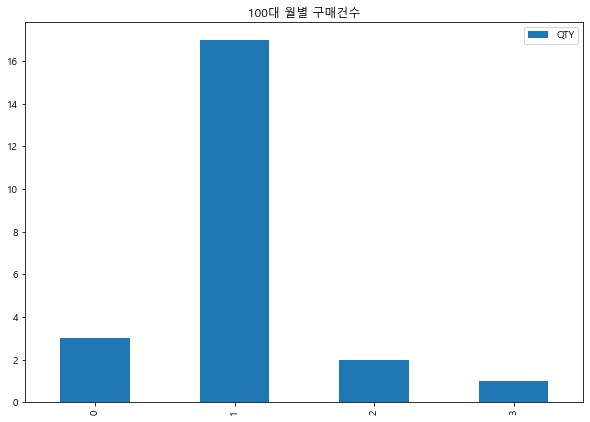

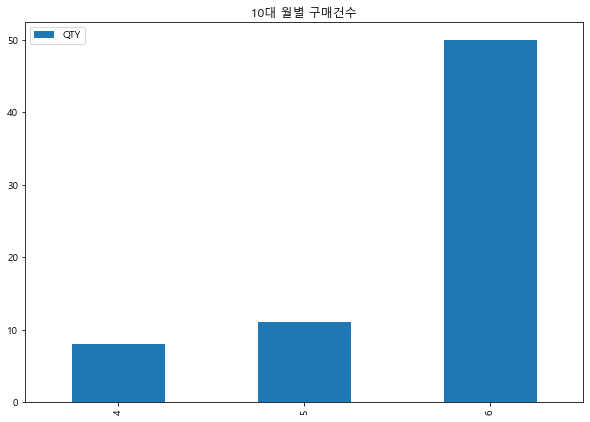

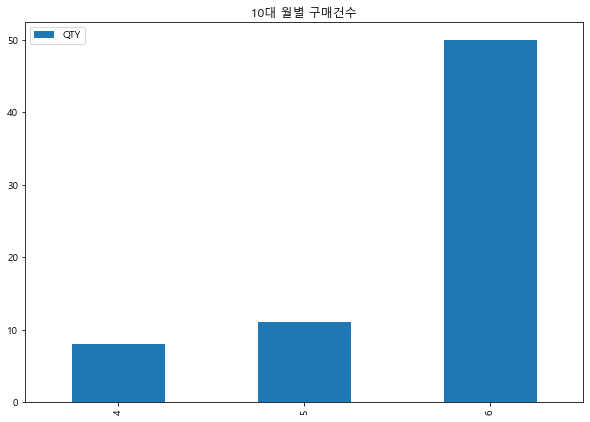

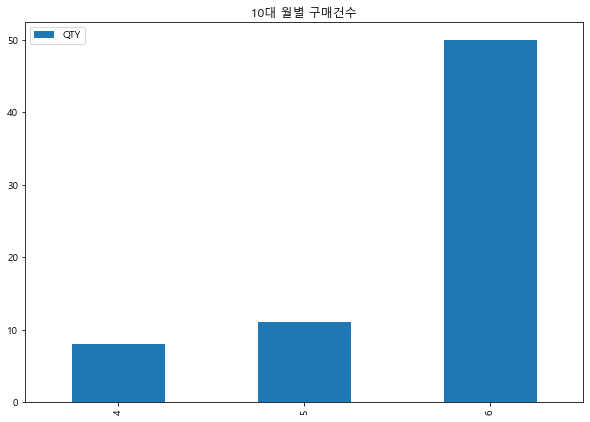

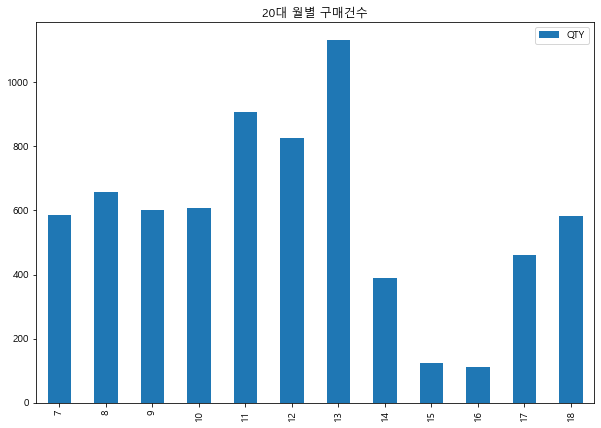

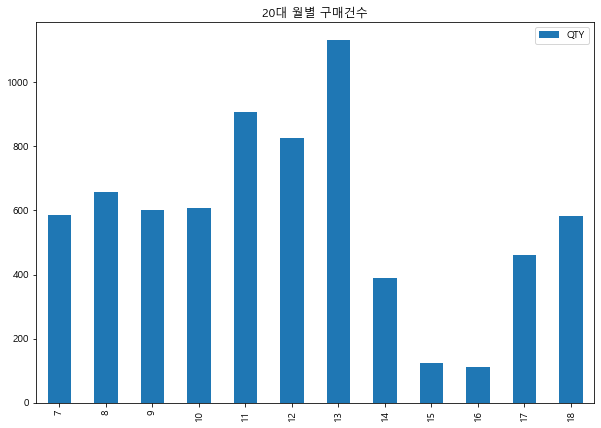

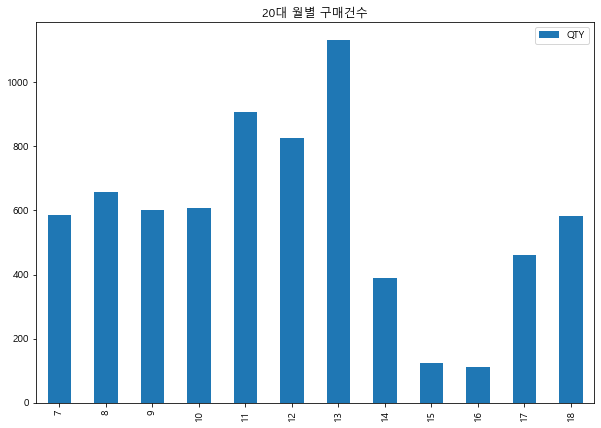

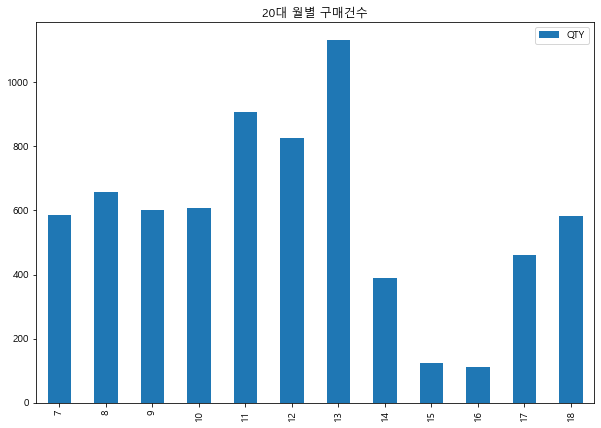

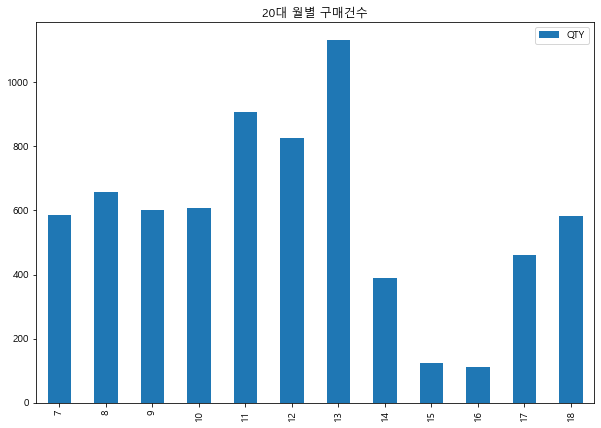

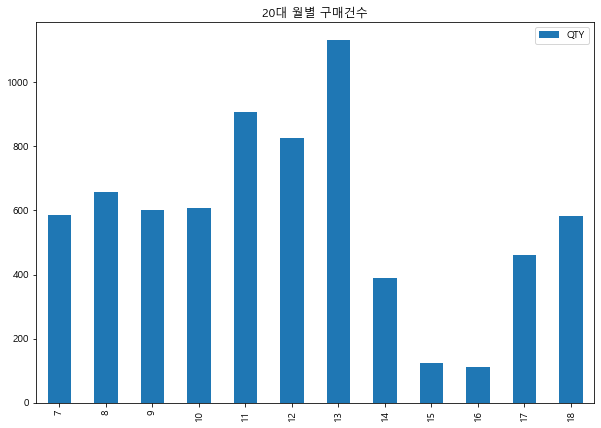

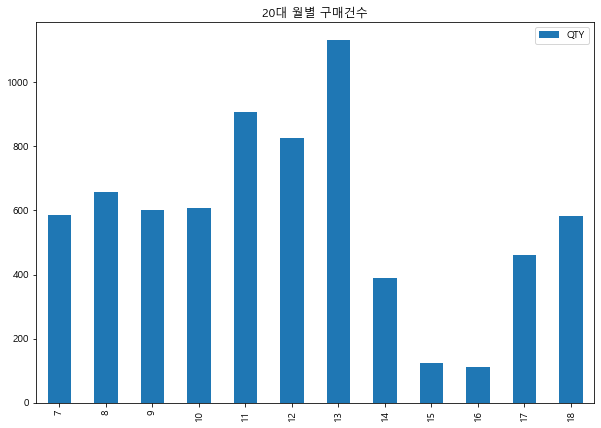

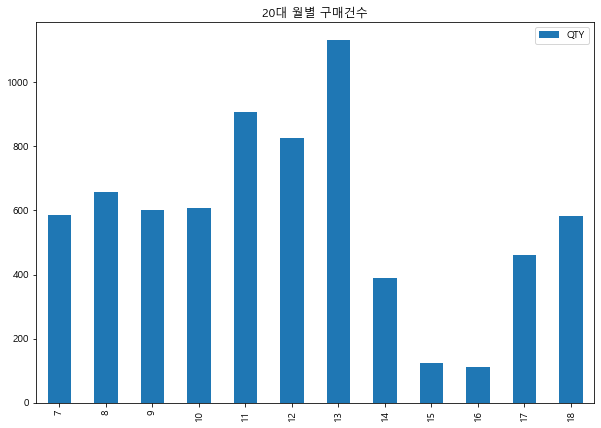

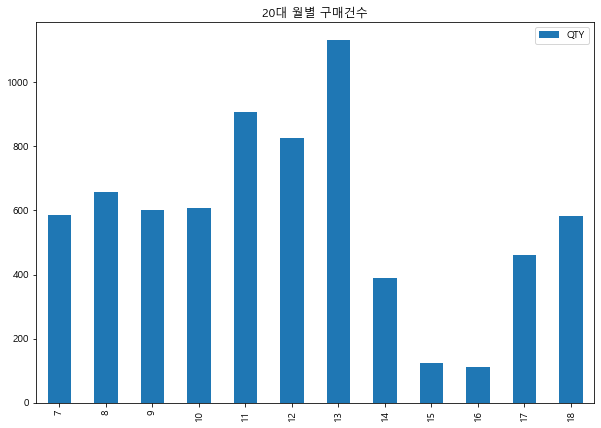

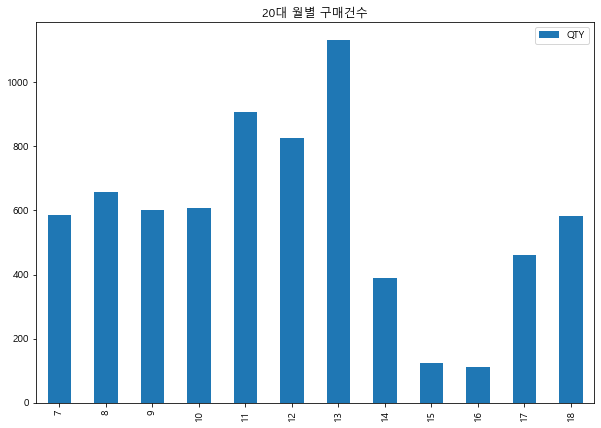

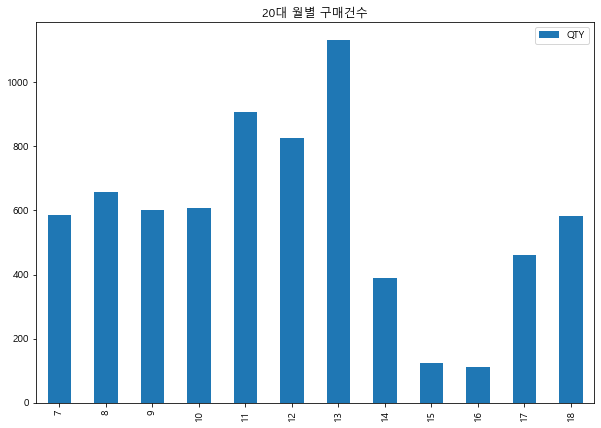

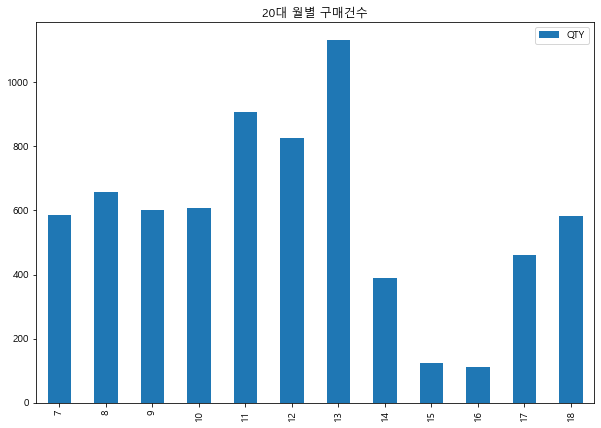

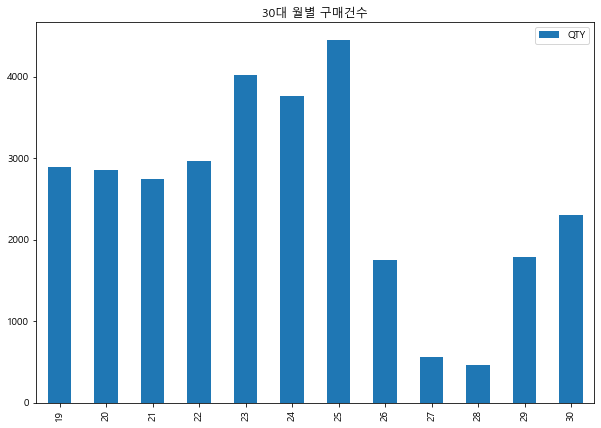

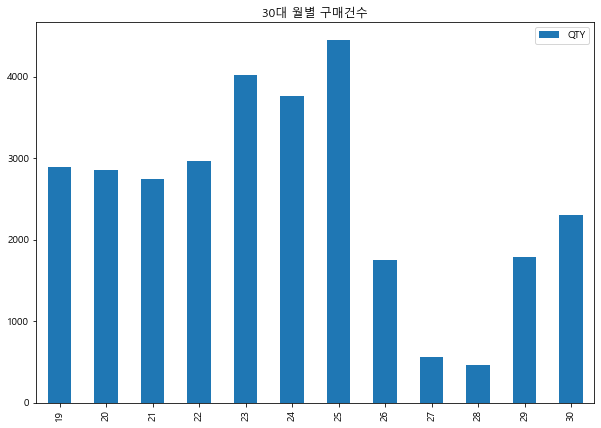

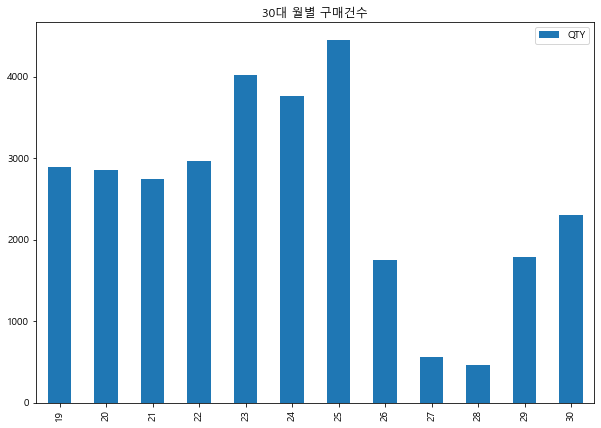

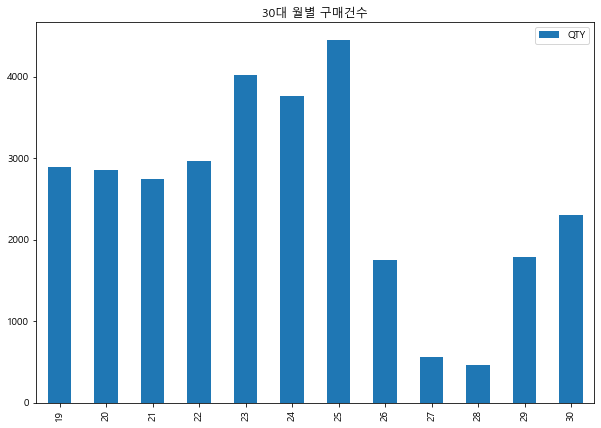

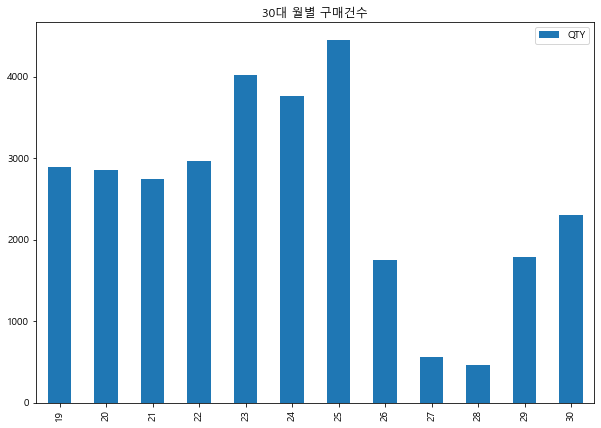

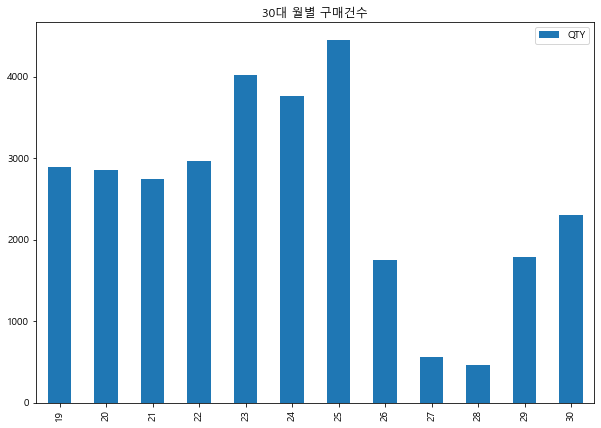

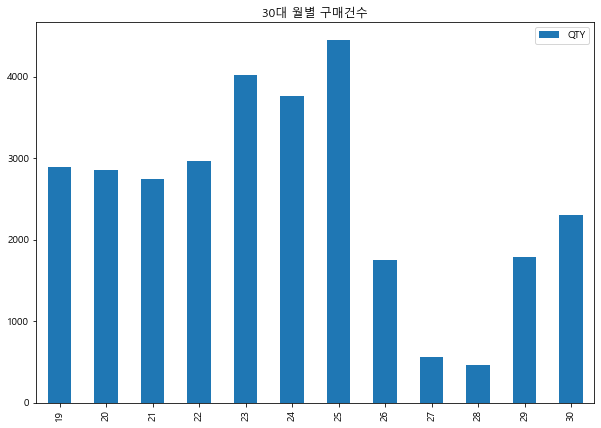

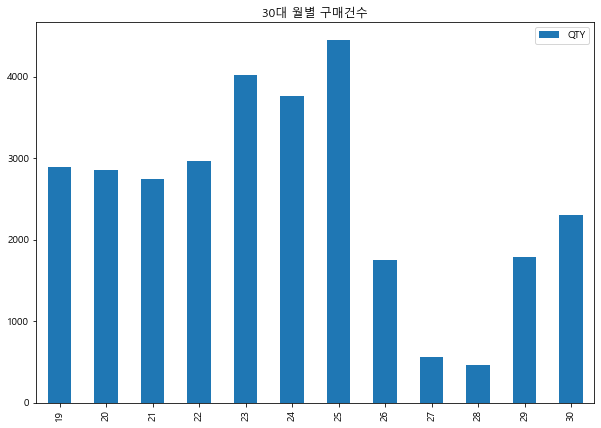

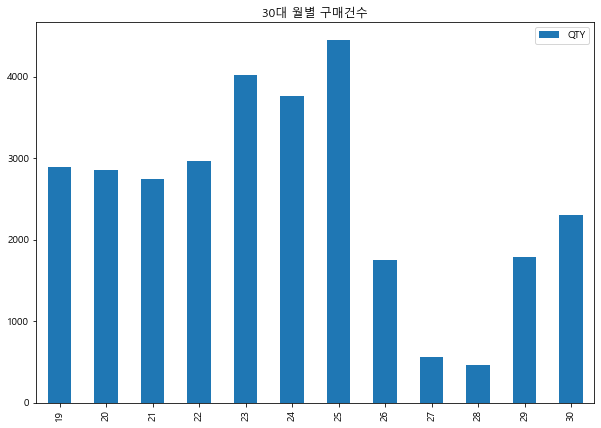

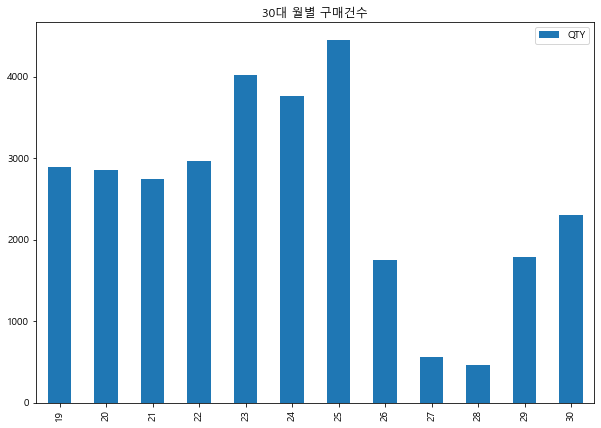

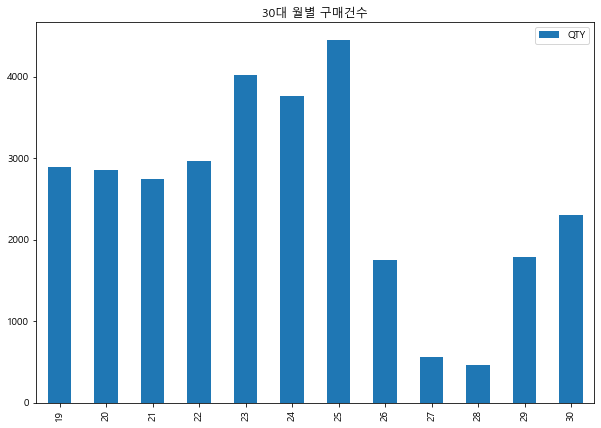

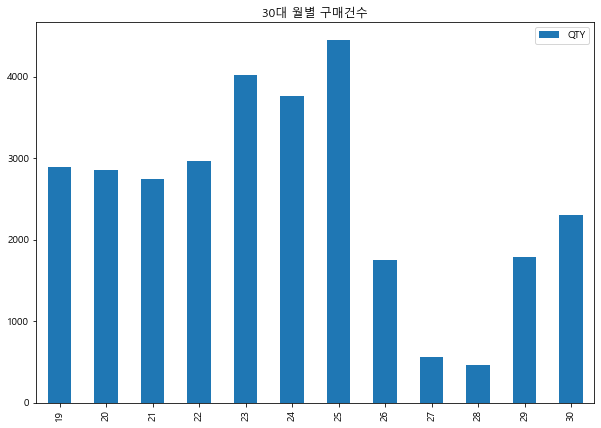

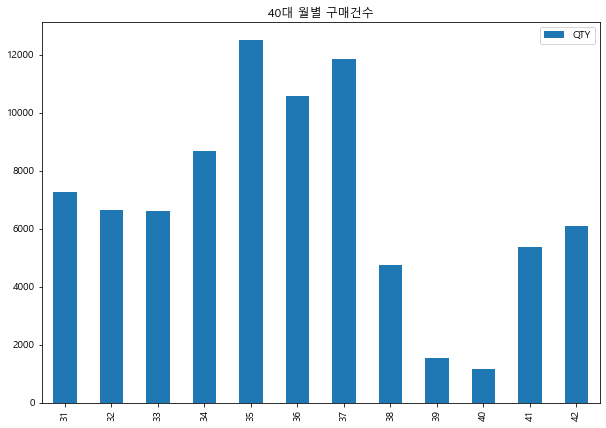

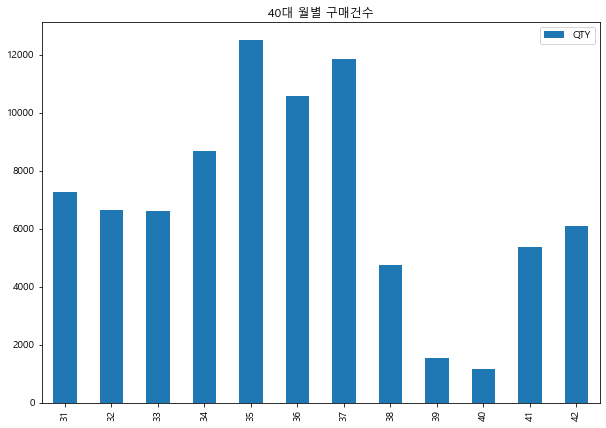

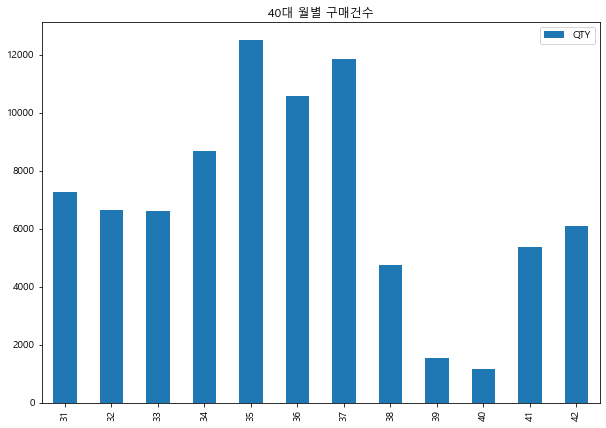

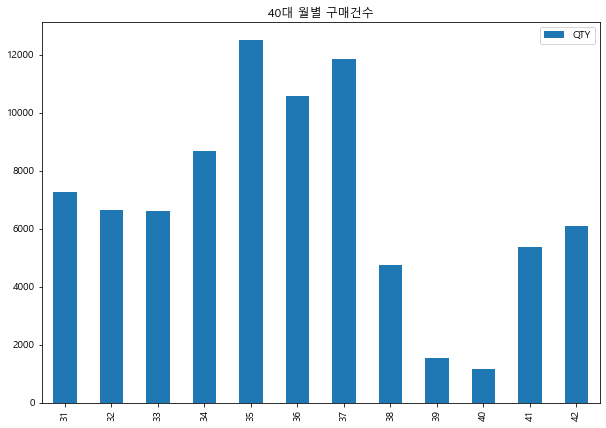

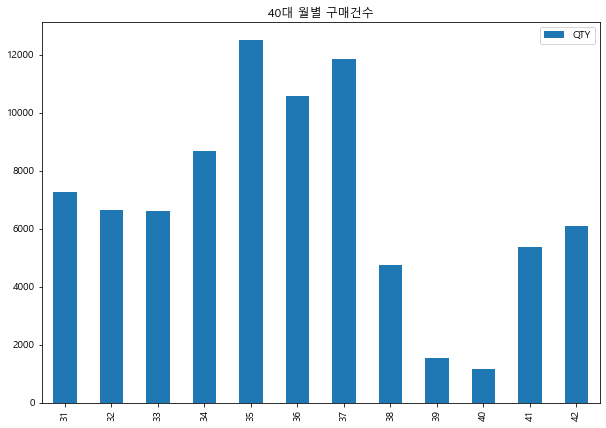

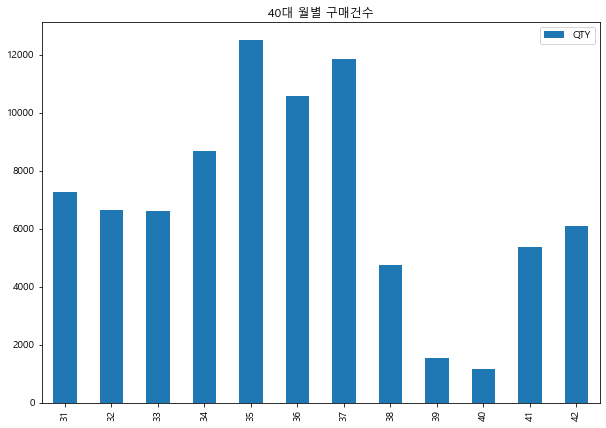

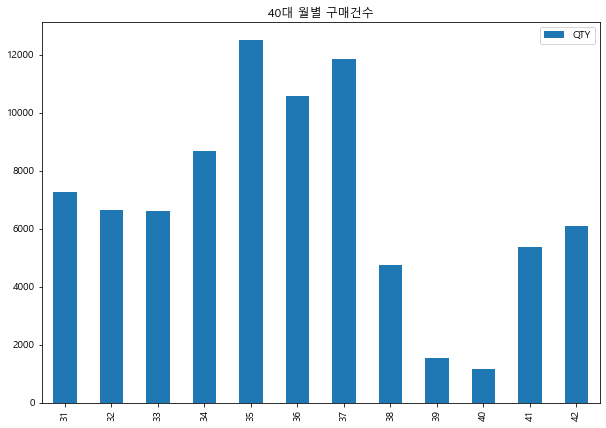

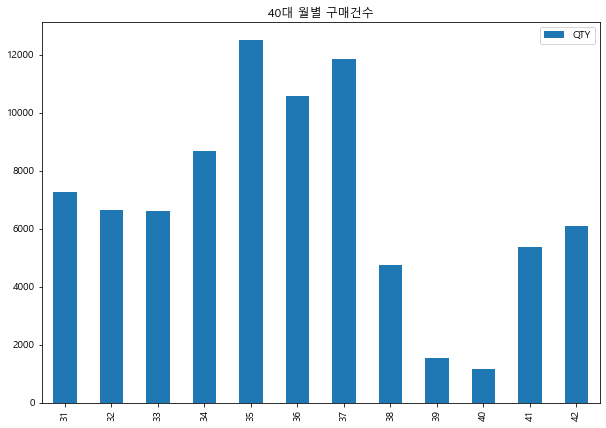

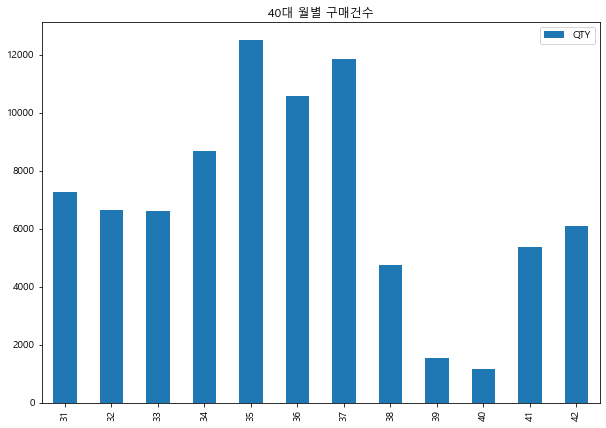

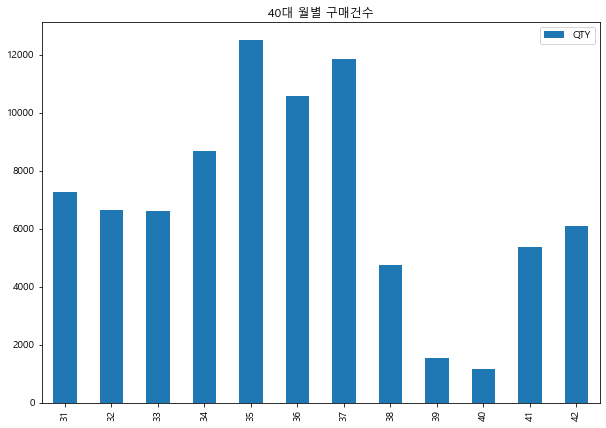

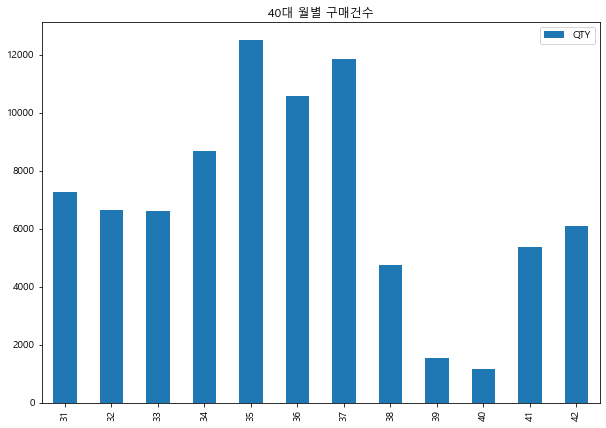

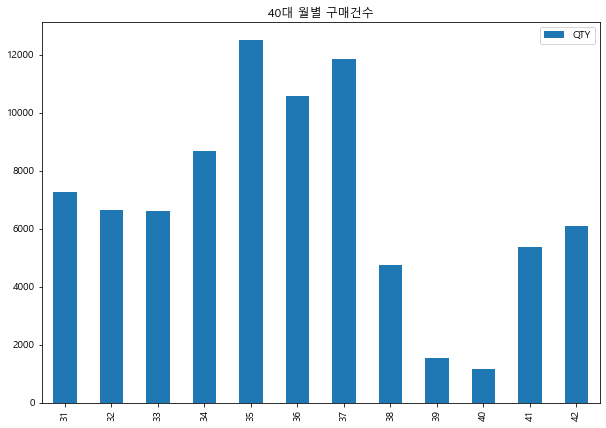

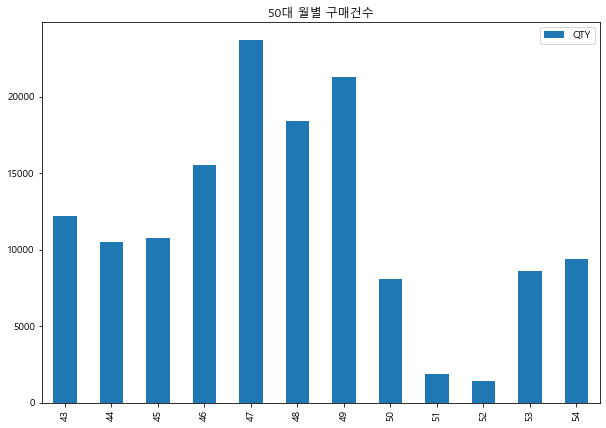

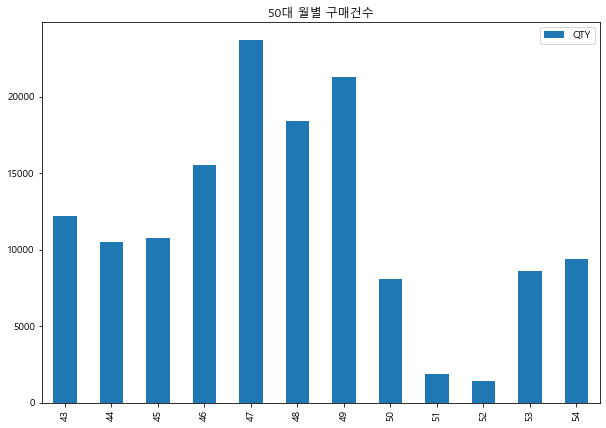

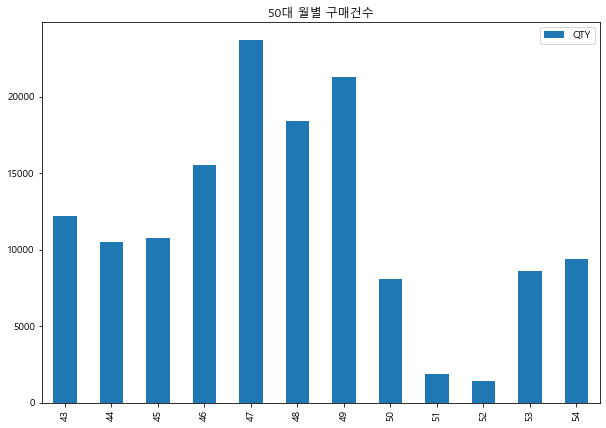

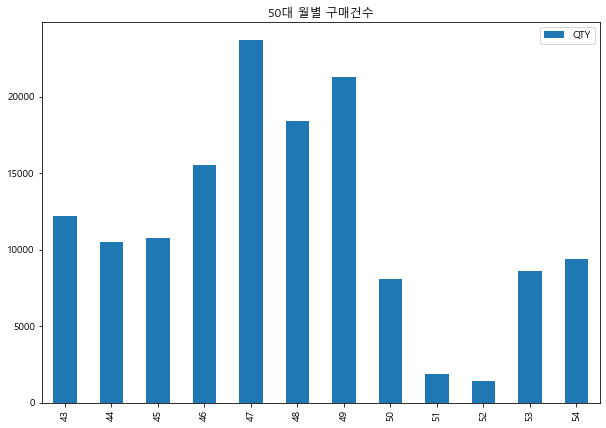

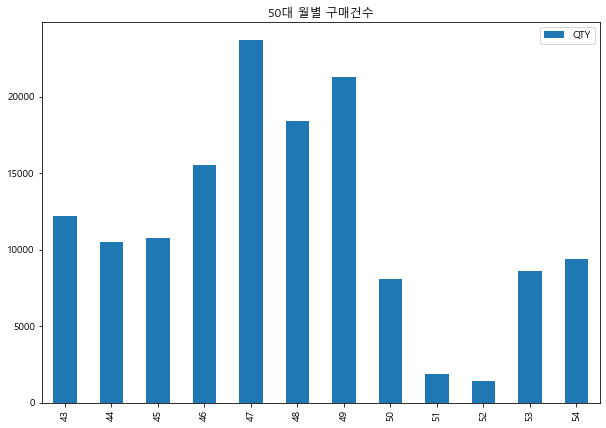

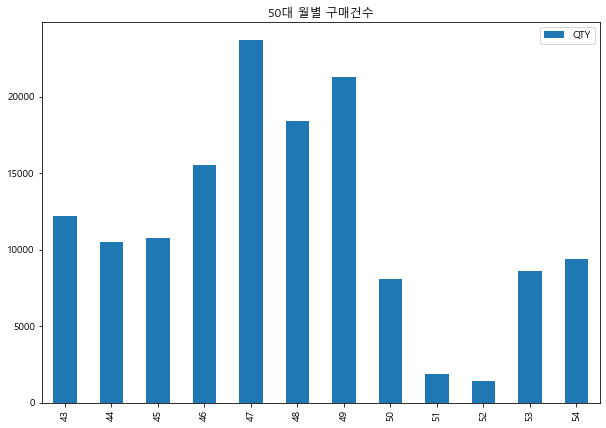

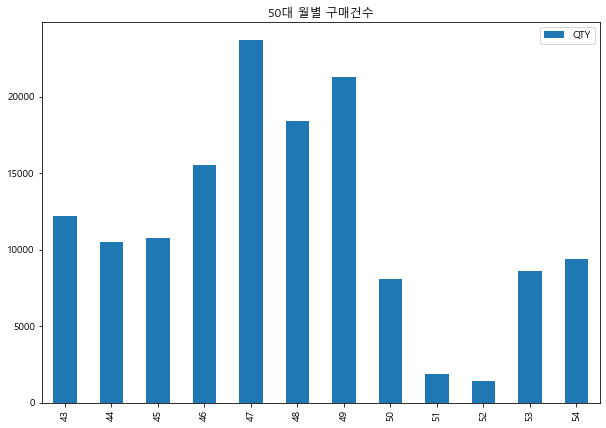

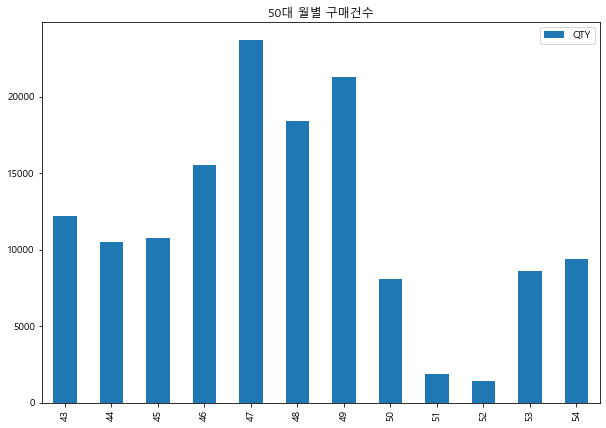

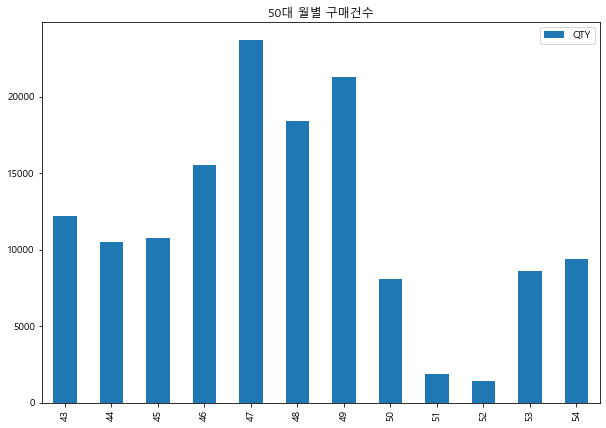

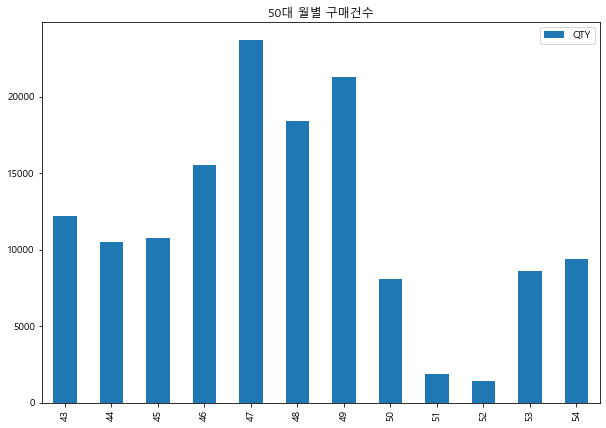

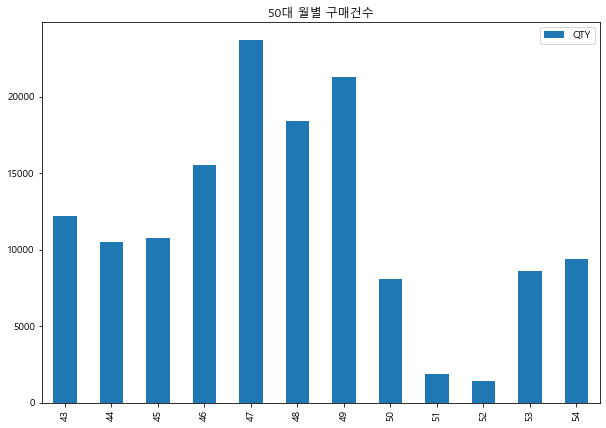

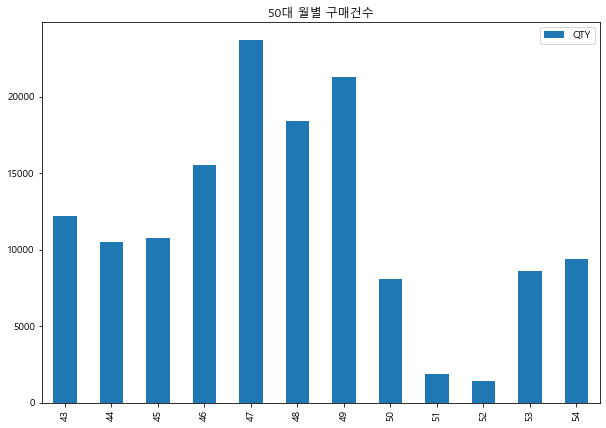

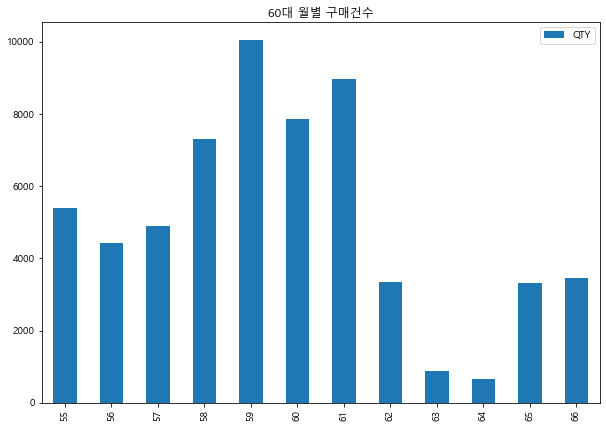

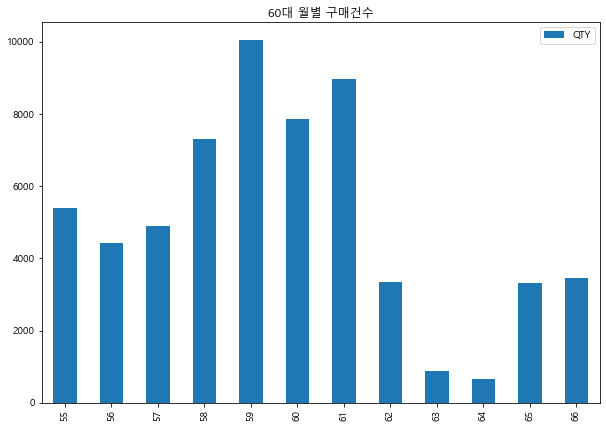

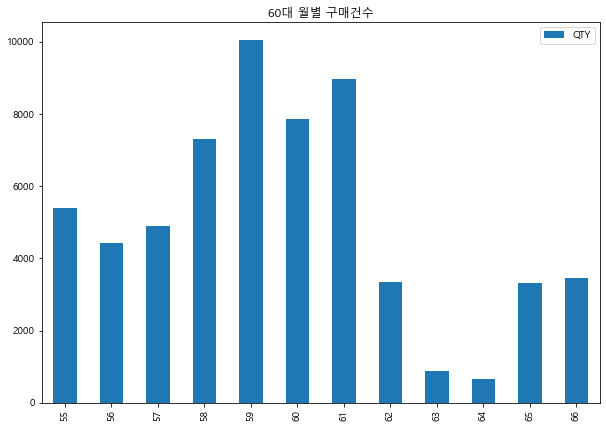

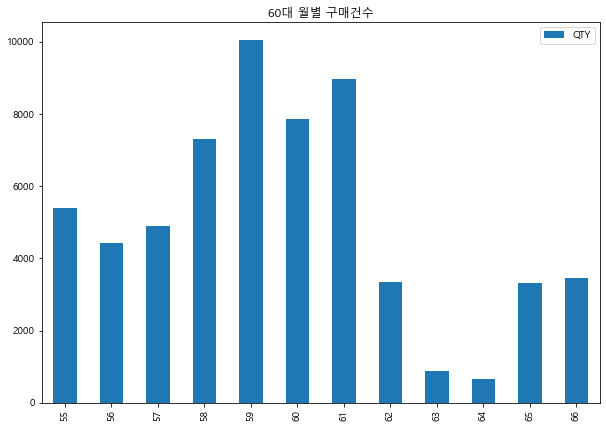

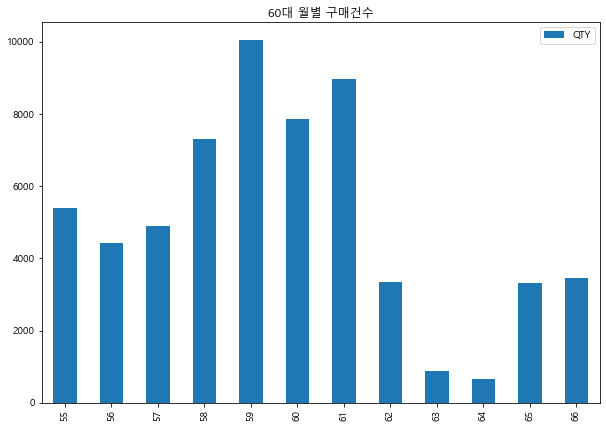

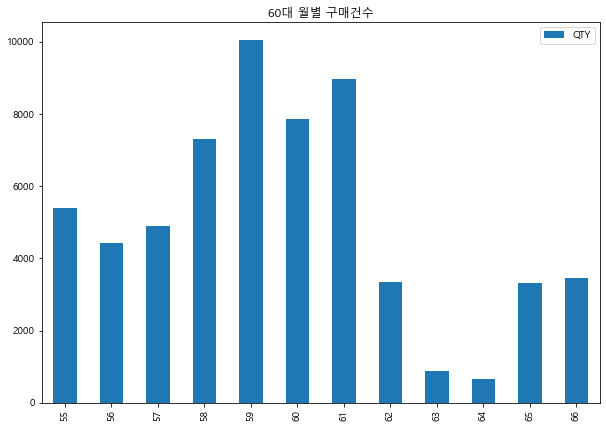

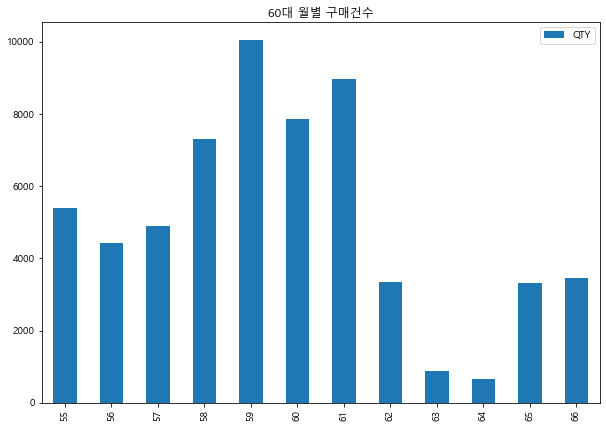

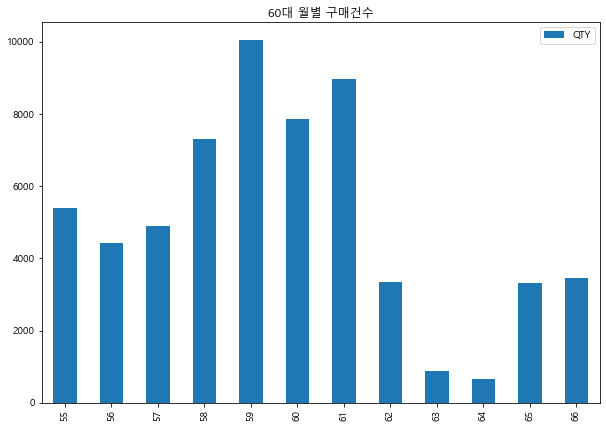

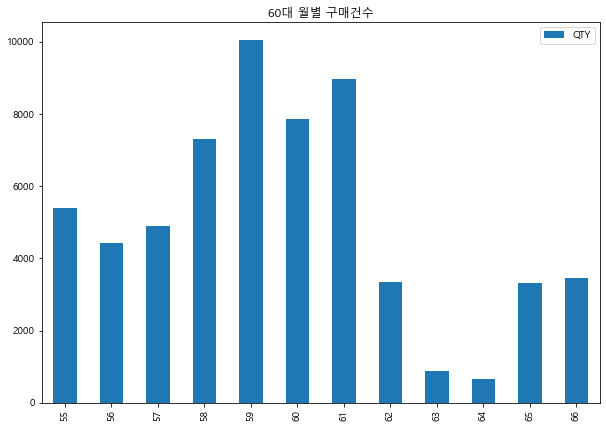

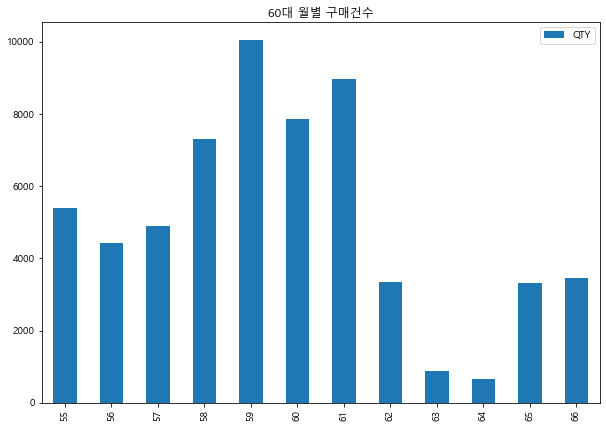

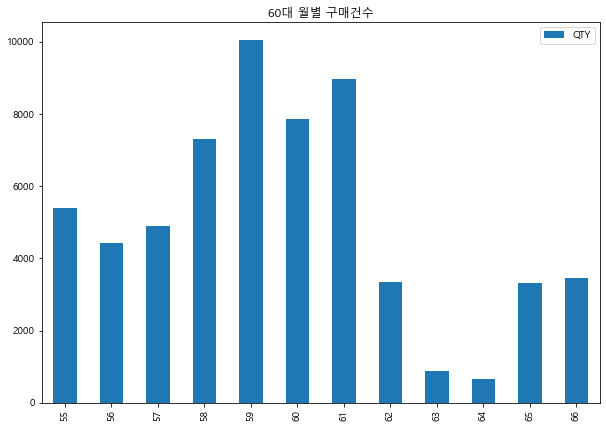

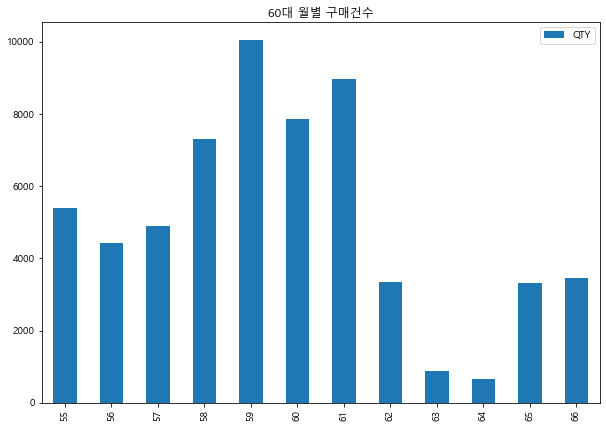

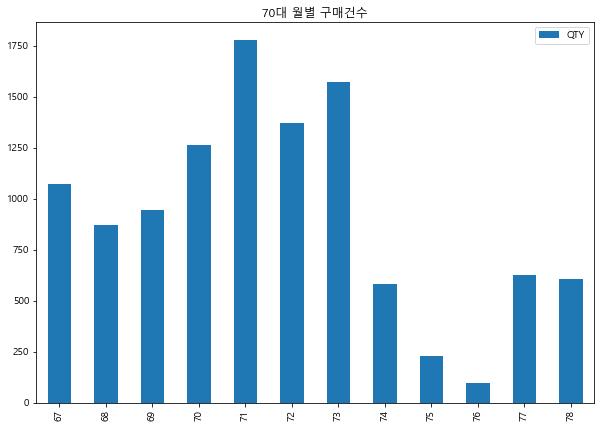

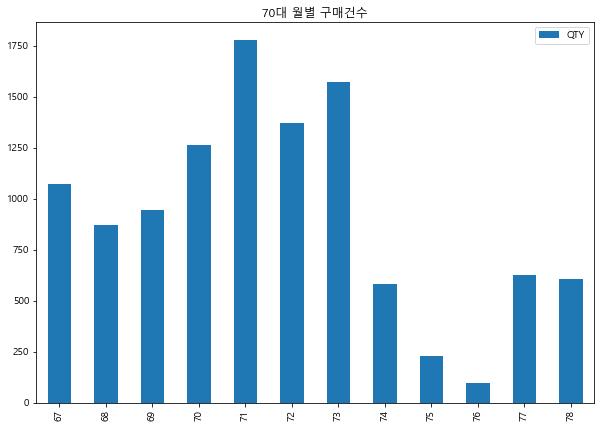

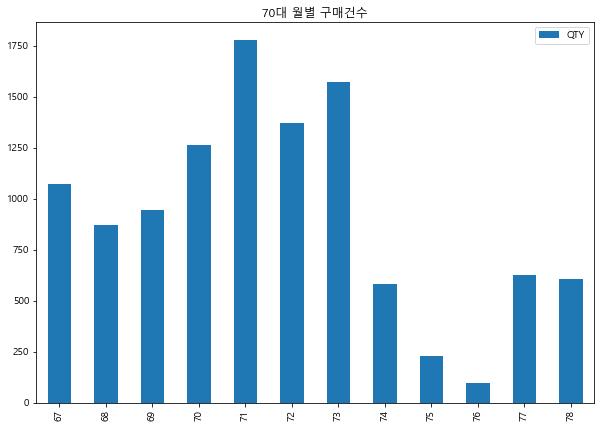

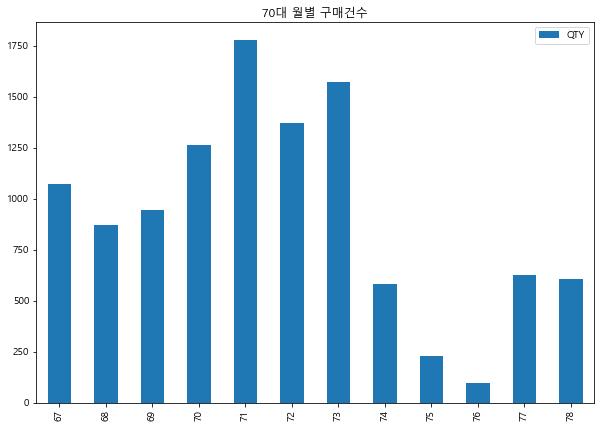

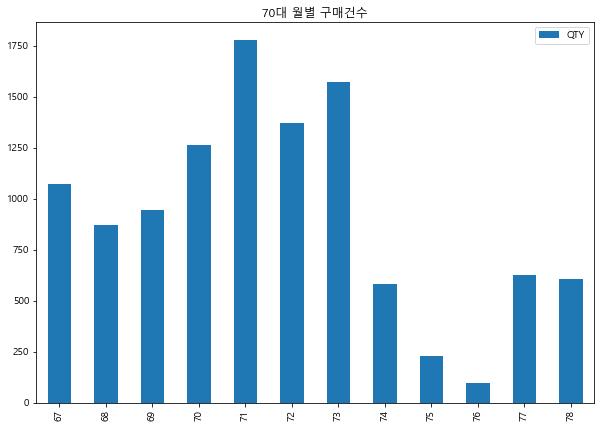

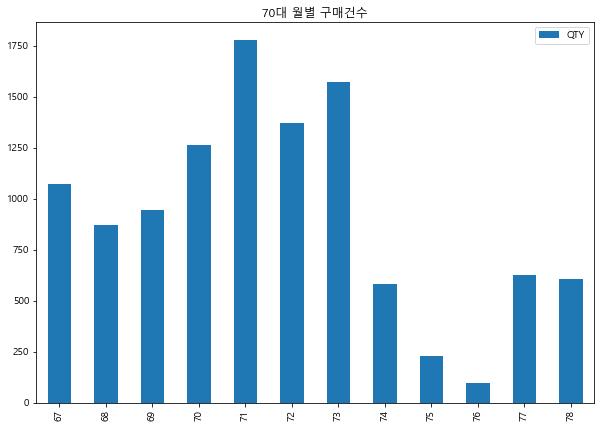

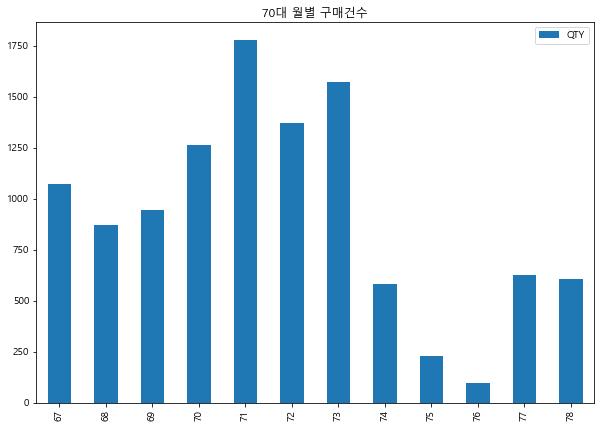

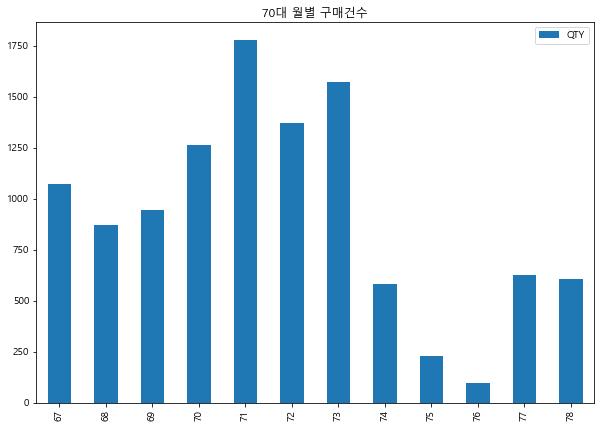

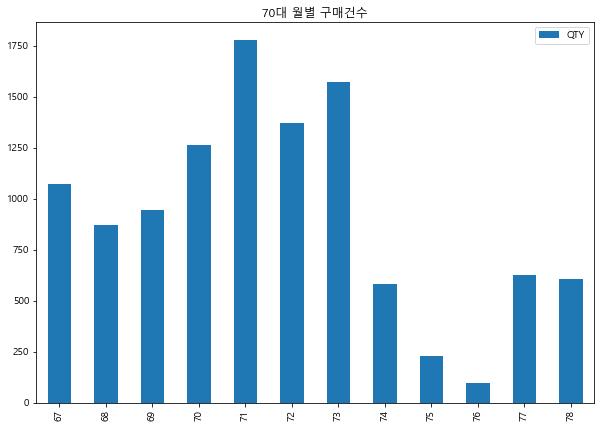

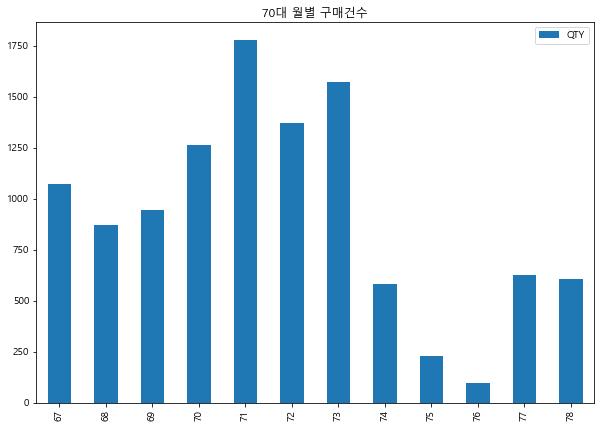

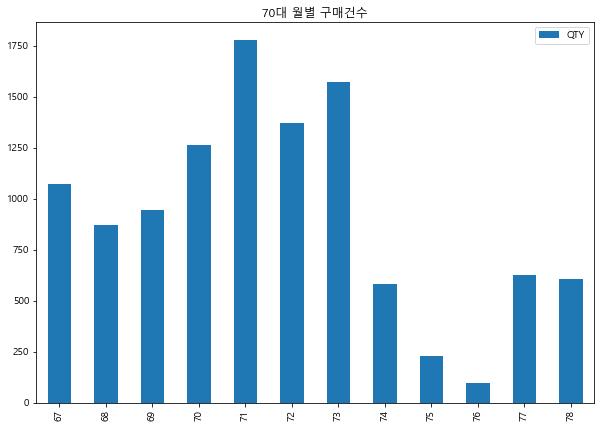

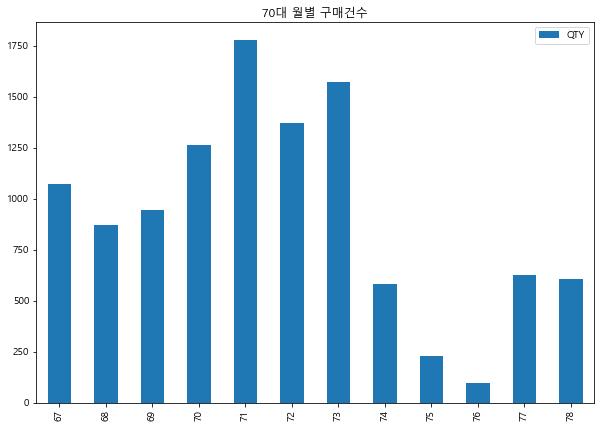

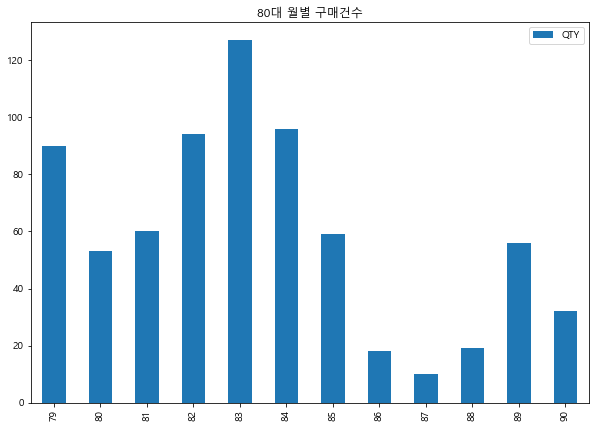

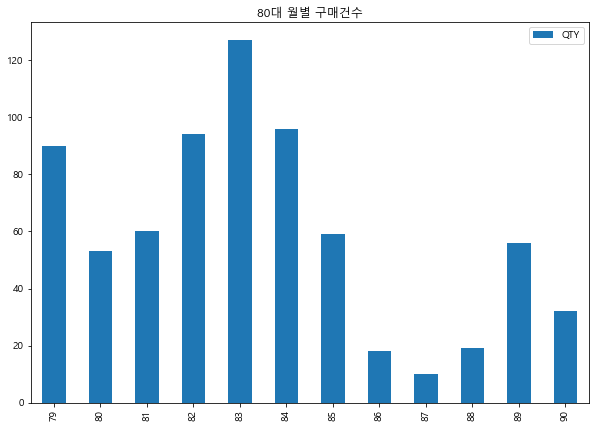

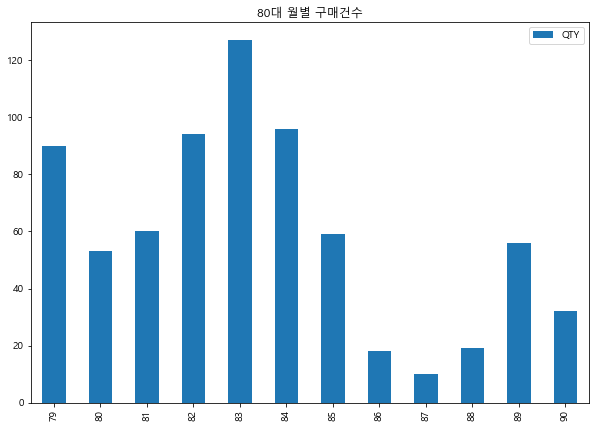

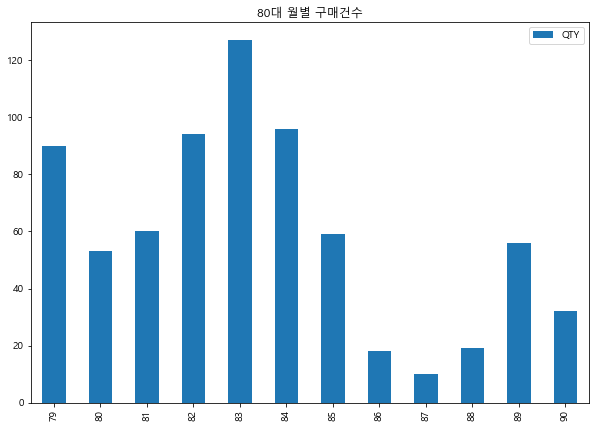

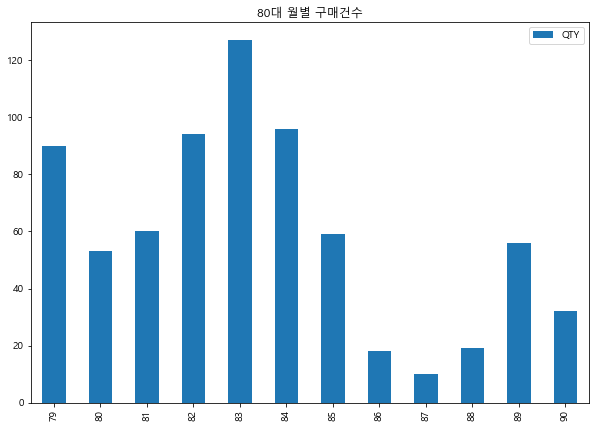

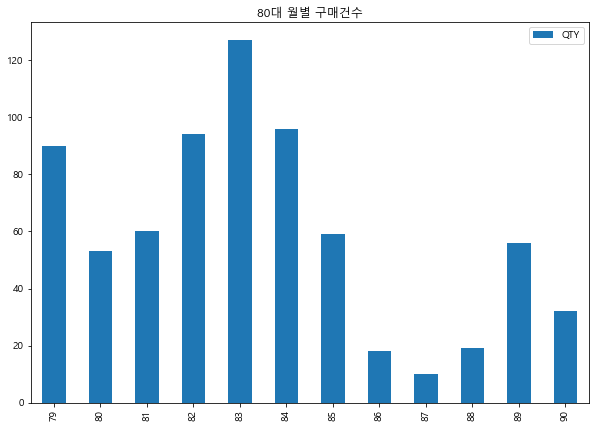

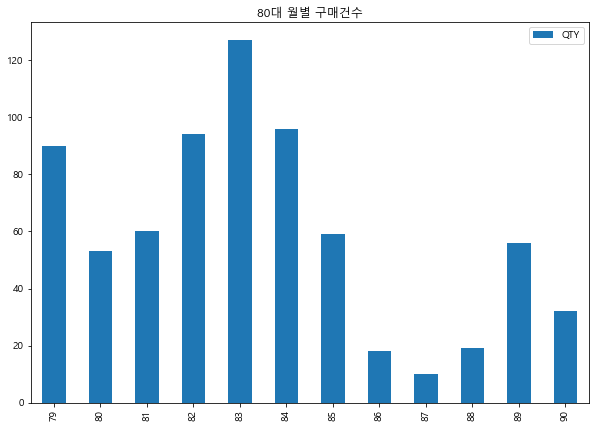

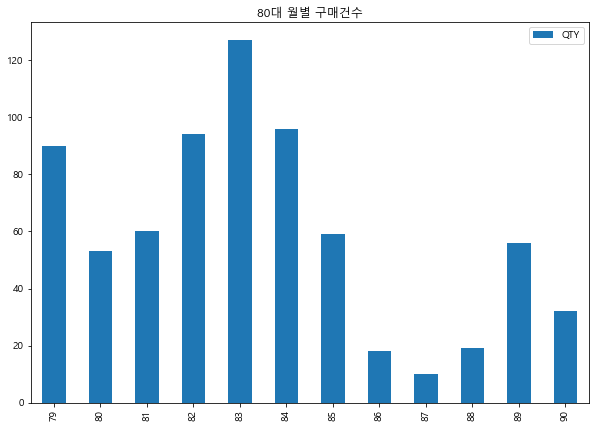

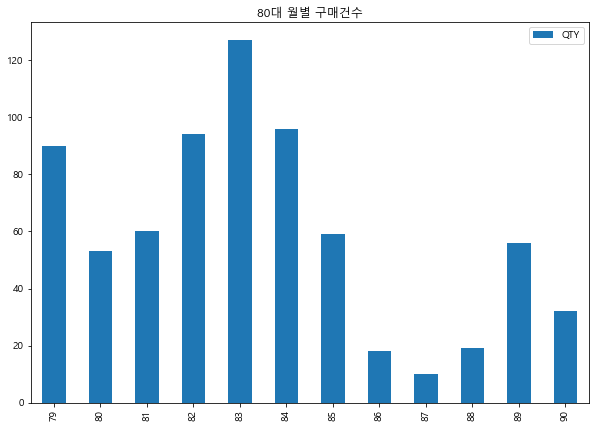

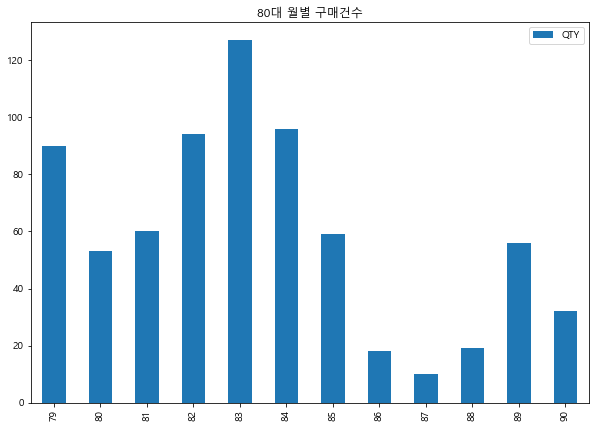

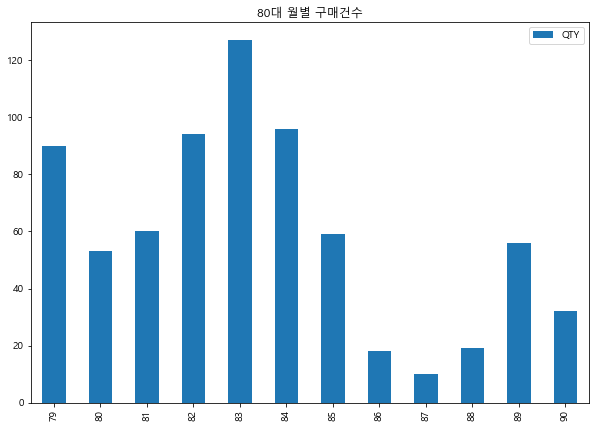

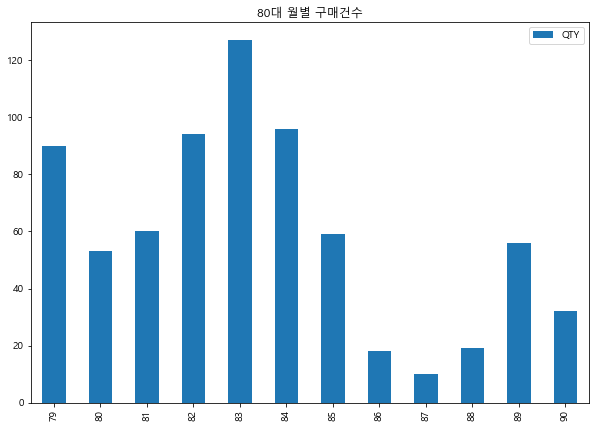

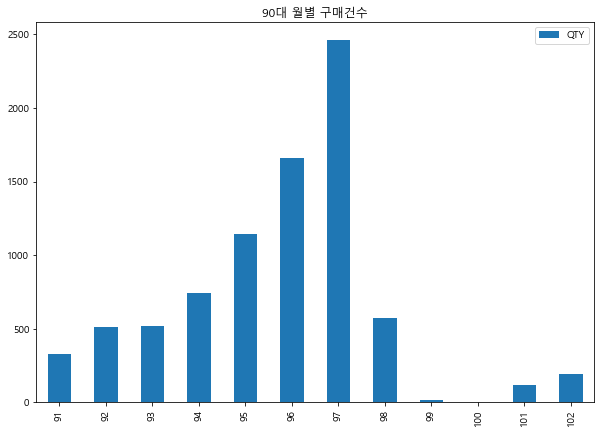

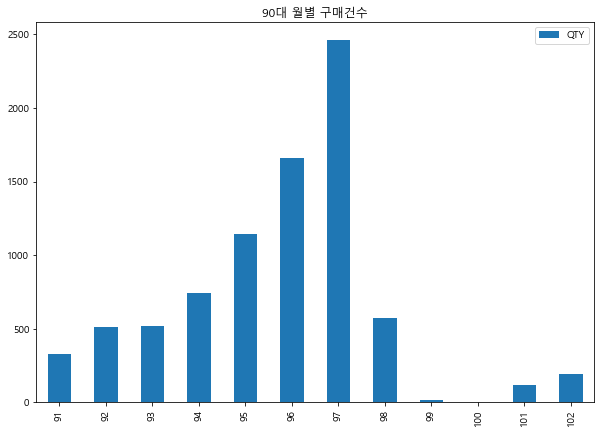

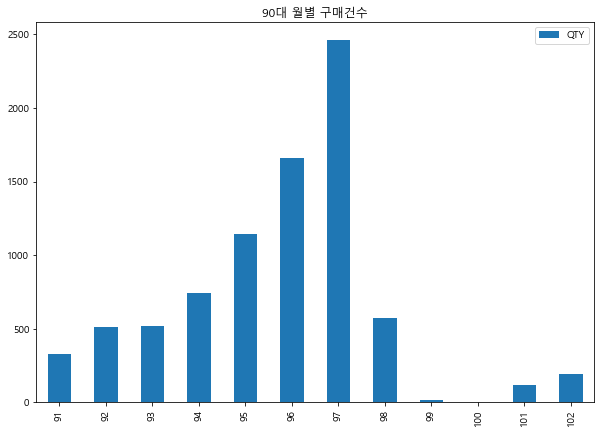

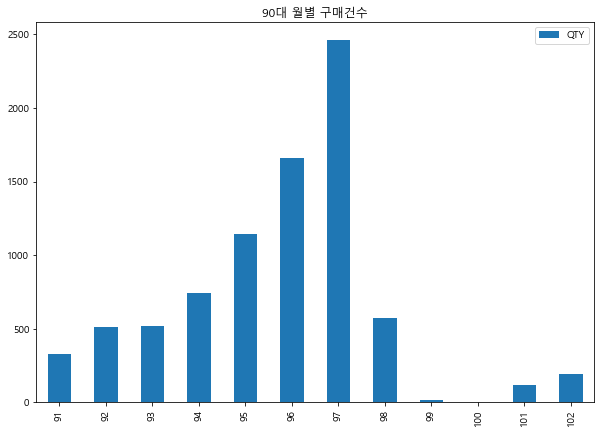

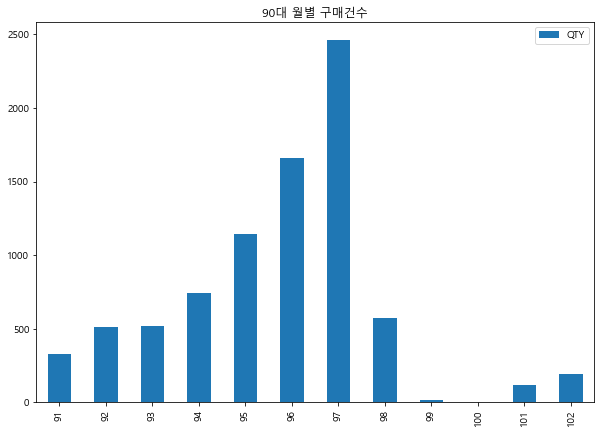

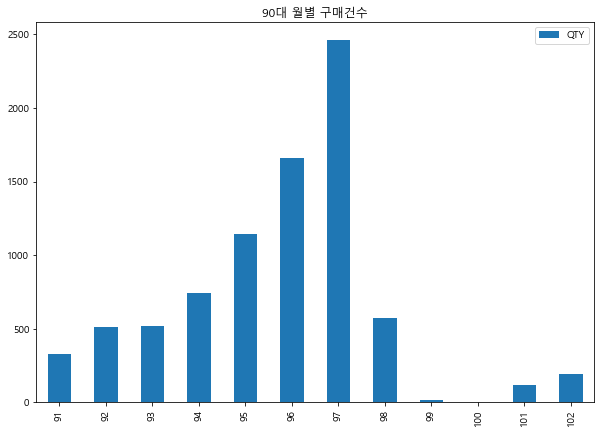

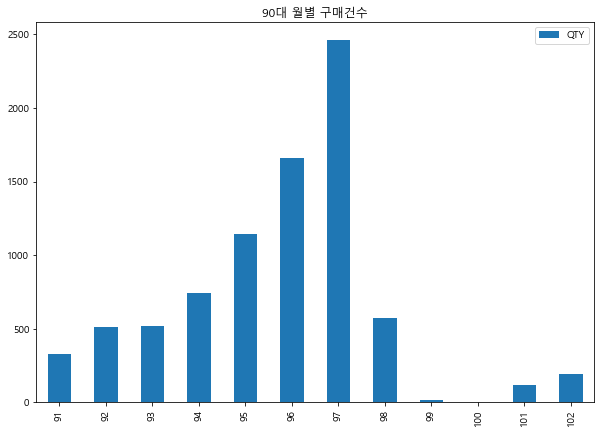

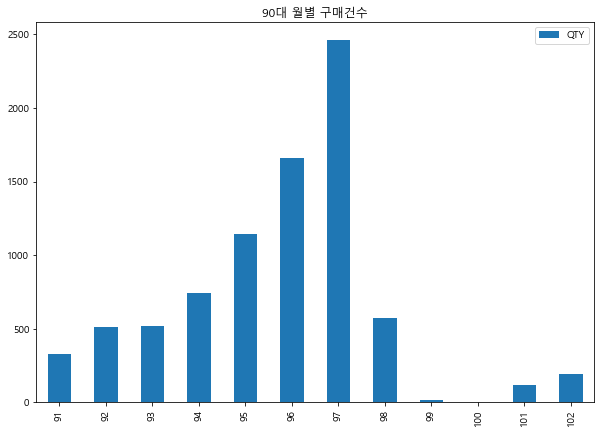

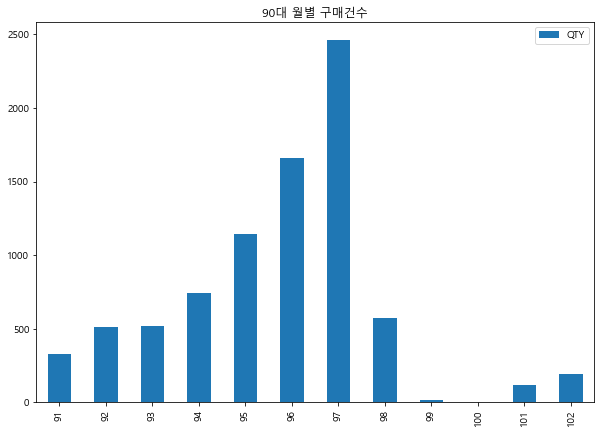

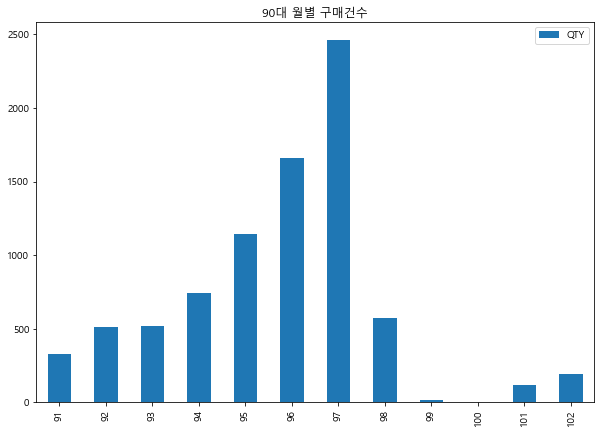

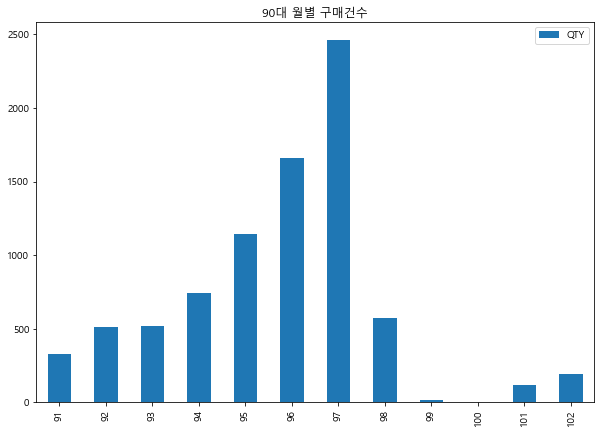

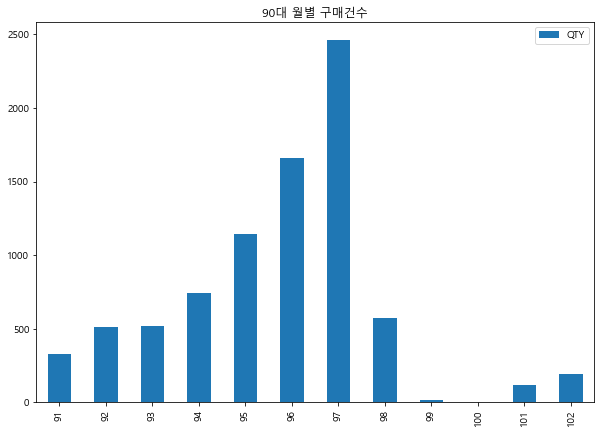

In [129]:
for x in shudra['ages']:
    shudra[shudra['ages']==x].plot.bar(figsize=(10,7))
    plt.title(str(x)+' 월별 구매건수')
   

# 월별 고객단위 구매금액

In [48]:
#구매일자, 고객 번호, 구매 금액 만 추출하여 별도의 데이터 프레임을 만든다.
df_4 = df[['ORDER_DATE','CUST_SERIAL_NO', 'PRICE']]
df_4

,ORDER_DATE,CUST_SERIAL_NO,PRICE
0,2011-11-14,1000000023,61500
1,2012-05-28,1000000023,42500
2,2012-05-28,1000000023,42500
3,2011-08-30,1000000014,53400
4,2011-08-30,1000000014,33400
...,...,...,...
507347,2012-08-07,1000416297,0
507348,2012-08-07,1000416219,0
507349,2012-08-07,1000416327,0
507350,2012-08-07,1000416225,0


In [49]:
#month() 함수로 월만 추출하여 month 열을 추가한다.
df_4['month'] = df_4['ORDER_DATE'].str.slice(start=5, stop=7)
df_4

,ORDER_DATE,CUST_SERIAL_NO,PRICE,month
0,2011-11-14,1000000023,61500,11
1,2012-05-28,1000000023,42500,05
2,2012-05-28,1000000023,42500,05
3,2011-08-30,1000000014,53400,08
4,2011-08-30,1000000014,33400,08
...,...,...,...,...
507347,2012-08-07,1000416297,0,08
507348,2012-08-07,1000416219,0,08
507349,2012-08-07,1000416327,0,08
507350,2012-08-07,1000416225,0,08


In [50]:
#고객 번호와 월로 그룹을 지어 구매 금액을 합쳐서 확인한다. 
df_4.groupby(['CUST_SERIAL_NO', 'month'])['PRICE'].sum()

CUST_SERIAL_NO  month
1000000001      01       431900
                03       300200
                04       167900
                05       259700
                07       315000
                          ...  
1000419405      08            0
1000419406      08        43300
1000419409      08        43300
1000419413      08        86600
1000419414      08       152500
Name: PRICE, Length: 452093, dtype: int64

In [51]:
#월에 “월＂을 붙여서 real_month라는 열을 추가한다.
df_4['real_month'] = df_4['month'].apply(lambda x: x + '월')
df_4

,ORDER_DATE,CUST_SERIAL_NO,PRICE,month,real_month
0,2011-11-14,1000000023,61500,11,11월
1,2012-05-28,1000000023,42500,05,05월
2,2012-05-28,1000000023,42500,05,05월
3,2011-08-30,1000000014,53400,08,08월
4,2011-08-30,1000000014,33400,08,08월
...,...,...,...,...,...
507347,2012-08-07,1000416297,0,08,08월
507348,2012-08-07,1000416219,0,08,08월
507349,2012-08-07,1000416327,0,08,08월
507350,2012-08-07,1000416225,0,08,08월


In [52]:
box_plot_df = df_4.groupby(['CUST_SERIAL_NO','real_month'])['PRICE'].sum()

In [53]:
real_box_plot_df = box_plot_df.reset_index()
real_box_plot_df.sort_values(by='real_month', inplace=True)

In [54]:
real_box_plot_df['PRICE'][0]

431900

<AxesSubplot:xlabel='real_month', ylabel='PRICE'>

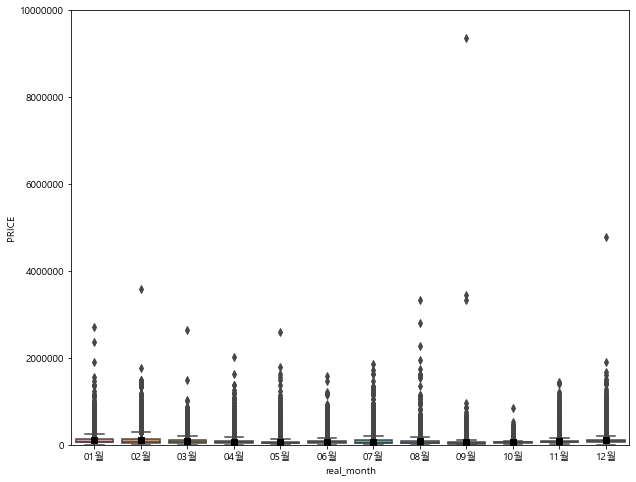

In [99]:
#월별 총 구매 금액의 최대값과 최소값, 평균값 등을 비교하기 위해 상자 차트로 표시한다.

## boxplot

figure = plt.figure(figsize=(10, 8))
plt.ylim(0, 10000000)
plt.ticklabel_format(style='plain', axis='y')
sns.boxplot(x="real_month", y="PRICE", data=real_box_plot_df, showmeans=True,
            meanprops={"marker":"s","markerfacecolor":"black", "markeredgecolor":"black"})


In [58]:
#구매 금액의 총합이 50만원 미만인 고객을 추출하여 고객 수를 확인한다.
tmp = df_4.groupby(['CUST_SERIAL_NO', 'real_month'])['PRICE'].sum().reset_index()
len(tmp[tmp['PRICE'] < 500000])


450218

In [59]:
under_50= tmp[tmp['PRICE'] < 500000]

In [60]:
under_50

,CUST_SERIAL_NO,real_month,PRICE
0,1000000001,01월,431900
1,1000000001,03월,300200
2,1000000001,04월,167900
3,1000000001,05월,259700
4,1000000001,07월,315000
...,...,...,...
452088,1000419405,08월,0
452089,1000419406,08월,43300
452090,1000419409,08월,43300
452091,1000419413,08월,86600


<AxesSubplot:xlabel='real_month', ylabel='PRICE'>

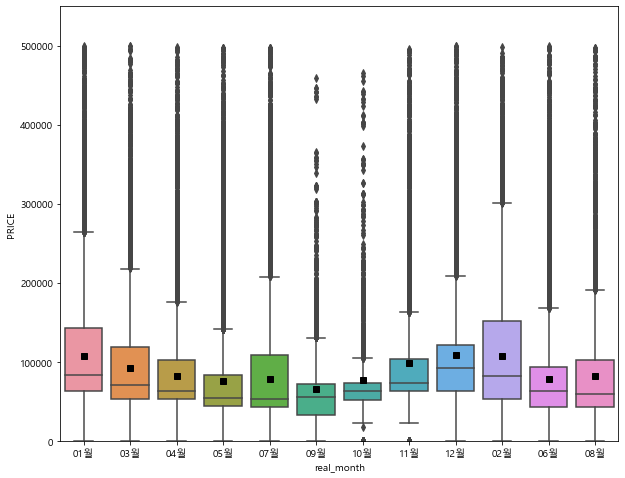

In [100]:
#월별 총 구매 금액이 50만원 미만인 구매에 대해서 최대값과 최소값, 평균값 등을 비교하기 위해 상자 차트로 표시한다.

## boxplot
figure = plt.figure(figsize=(10, 8))
plt.ylim(0, 550000)
sns.boxplot(x="real_month", y="PRICE", data=under_50, showmeans=True,
            meanprops={"marker":"s","markerfacecolor":"black", "markeredgecolor":"black"})

# 요일별 구매 금액 합계


In [63]:
#구매 요일, 구매 건수만 추출하여 별도의 데이터 프레임을 만든다.
df_5 = df[['ORDER_WEEKDAY', 'PRICE' ]]
df_5

,ORDER_WEEKDAY,PRICE
0,토,61500
1,토,42500
2,토,42500
3,일,53400
4,일,33400
...,...,...
507347,일,0
507348,일,0
507349,일,0
507350,일,0


In [64]:
# 요일별로 구매 금액을 합쳐서 확인한다.
df_5.groupby(['ORDER_WEEKDAY']).sum()
temp =df_5.groupby(['ORDER_WEEKDAY']).sum()

In [65]:
# 요일별로 구매 금액을 합친 결과를 저장한다.
temp = df_5.groupby(['ORDER_WEEKDAY']).sum()
sum_summary = temp.reset_index()
sum_summary['ORDER_WEEKDAY']

0    금
1    목
2    수
3    월
4    일
5    토
6    화
Name: ORDER_WEEKDAY, dtype: object

In [66]:
#그래프에 출력될 때 자동으로 정렬해서
#출력되도록 요일 앞에 1부터 7까지의 숫자를
#붙이는 함수를 만들어서 적용한다.

def ChangeRday(day):
    if (day == "월"): 
        return '1_월'
    elif (day == "화"): 
        return '2_화'
    elif (day == "수"): 
        return '3_수'
    elif (day == "목"): 
        return '4_목'
    elif (day == "금"): 
        return '5_금'
    elif (day == "토"): 
        return '6_토'
    elif (day == "일"): 
        return '7_일'
    

In [67]:
sum_summary['ORDER_WEEKDAY'] = sum_summary['ORDER_WEEKDAY'].apply(lambda x: ChangeRday(x))

In [68]:
sum_summary['ORDER_WEEKDAY']

0    5_금
1    4_목
2    3_수
3    1_월
4    7_일
5    6_토
6    2_화
Name: ORDER_WEEKDAY, dtype: object

In [69]:
sum_summary.sort_values(by='ORDER_WEEKDAY', inplace=True)
sum_summary

,ORDER_WEEKDAY,PRICE
3,1_월,5582784440
6,2_화,5319236280
2,3_수,5182188030
1,4_목,5172669070
0,5_금,5482837830
5,6_토,6955078820
4,7_일,6875077420


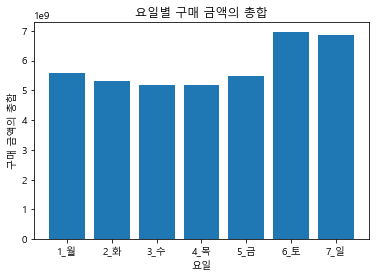

In [101]:
#요일별 구매 금액의 총합을 막대 그래프로 표시한다.
plt.bar(sum_summary['ORDER_WEEKDAY'], sum_summary['PRICE'])
plt.xlabel('요일')
plt.ylabel('구매 금액의 총합')
plt.title('요일별 구매 금액의 총합')
plt.rcParams['font.family'] = 'Malgun Gothic' # 한글 깨짐 현상 : 설치된 폰트 출력하고 한글폰트 가져다 쓸 것
plt.show()

# 요일별 구매 상품 수

In [71]:
# 요일별로 구매 수량을 합친 결과를 dayamt2에 저장하고, 
dayamt1 = df[['CUST_SERIAL_NO','ORDER_WEEKDAY','QTY']]
dayamt2 = dayamt1.groupby(['CUST_SERIAL_NO','ORDER_WEEKDAY'])['QTY'].sum().reset_index()
dayamt2

,CUST_SERIAL_NO,ORDER_WEEKDAY,QTY
0,1000000001,금,4
1,1000000001,수,25
2,1000000001,월,3
3,1000000001,화,16
4,1000000002,금,13
...,...,...,...
457968,1000419405,월,1
457969,1000419406,월,1
457970,1000419409,월,1
457971,1000419413,월,2


In [72]:
#요일 이름 변경 함수를 적용하여 rday 열을 추가한다.
dayamt2['rday'] = dayamt2['ORDER_WEEKDAY'].apply(lambda x: ChangeRday(x))

In [73]:
dayamt2.sort_values(by='rday', ascending= True, inplace=True) # 월~일로 정렬

In [74]:
dayamt3= dayamt2[dayamt2['QTY']>=2]

<AxesSubplot:xlabel='ORDER_WEEKDAY', ylabel='QTY'>

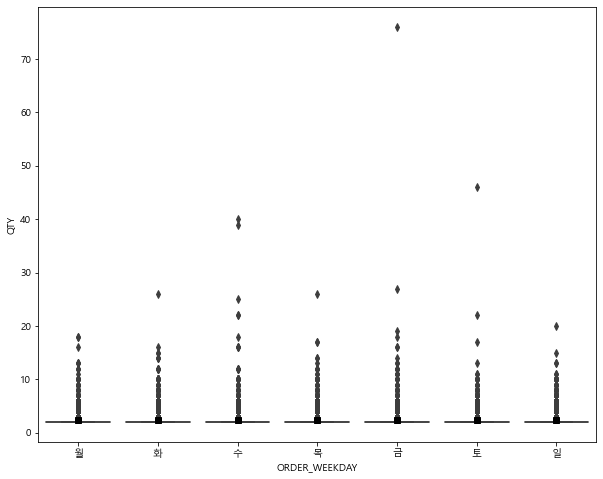

In [75]:
#요일별 총 구매 수량이 2개를 초과하는 구매에 대해서 
#최대값과 최소값, 평균값 등을 비교하기 위해 상자 차트로 표시한다.
## boxplot
figure = plt.figure(figsize=(10, 8))
sns.boxplot(x='ORDER_WEEKDAY', y="QTY", data=dayamt3, showmeans=True,
            meanprops={"marker":"s","markerfacecolor":"black", "markeredgecolor":"black"})

# 그룹별 구매 패턴 분석
### 전체 고객의 구매수량 상위 100개의 세 분류 상품에 대하여 wordcloud로 표현

In [76]:
#상품 분류 코드와 구매 수량 데이터만 추출한 다음 
#동일한 상품 분류 코드에 대한 누적 구매 수량을 구한다.
df_6 = df[['LGROUP','MGROUP','SGROUP','DGROUP','QTY']]
display(df_6.groupby(['LGROUP','MGROUP','SGROUP','DGROUP'])['QTY'].sum())

LGROUP  MGROUP  SGROUP  DGROUP
10      1       1       5          465
                7       1         2455
                        4          172
                8       2          213
                        9         1562
                                  ... 
85      4       4       2           20
                        8           33
                        13        4897
                        16        1294
                5       1          360
Name: QTY, Length: 275, dtype: int64

In [77]:
# 4개의 상품 분류 코드를 하나의 문자열로 합친 다음 LMSD_ICODE 열에 저장한다.
df_6[['LGROUP','MGROUP','SGROUP','DGROUP']] = df_6[['LGROUP','MGROUP','SGROUP','DGROUP']].astype(str)
df_6['LMSD_ICODE'] = df_6[['LGROUP','MGROUP','SGROUP','DGROUP']].apply(''.join,axis=1)


In [78]:
vhd_df = pd.read_csv('VHD_GOODSKIND.csv')
vhd_df

,LGROUP,MGROUP,SGROUP,DGROUP,LGROUP_NAME,MGROUP_NAME,SGROUP_NAME,DGROUP_NAME,LMSD_CODE
0,70,2,1,2,식품,신선식품/가공식품,간편/즉석식품,기타 간편/즉석식품,70020102
1,70,2,1,3,식품,신선식품/가공식품,간편/즉석식품,덮밥/덮밥소스,70020103
2,70,2,1,4,식품,신선식품/가공식품,간편/즉석식품,만두/딤섬,70020104
3,70,2,1,5,식품,신선식품/가공식품,간편/즉석식품,분말짜장/카레,70020105
4,70,2,1,6,식품,신선식품/가공식품,간편/즉석식품,샐러드,70020106
...,...,...,...,...,...,...,...,...,...
2314,10,1,10,2,패션/잡화,남성/캐주얼의류,트레이닝/이지웨어,트레이닝 상의,10011002
2315,10,1,10,3,패션/잡화,남성/캐주얼의류,트레이닝/이지웨어,트레이닝 하의,10011003
2316,10,1,10,4,패션/잡화,남성/캐주얼의류,트레이닝/이지웨어,트레이닝 셋트,10011004
2317,10,2,1,1,패션/잡화,여성/캐주얼의류,가죽/모피/무스탕,가죽/무스탕,10020101


In [79]:
#vhd_df에도 LMSD_ICODE 열 추가
vhd_df[['LGROUP','MGROUP','SGROUP','DGROUP']] = df_6[['LGROUP','MGROUP','SGROUP','DGROUP']].astype(str)
vhd_df['LMSD_ICODE'] = df_6[['LGROUP','MGROUP','SGROUP','DGROUP']].apply(''.join,axis=1)
vhd_df

,LGROUP,MGROUP,SGROUP,DGROUP,LGROUP_NAME,MGROUP_NAME,SGROUP_NAME,DGROUP_NAME,LMSD_CODE,LMSD_ICODE
0,20,2,1,1,식품,신선식품/가공식품,간편/즉석식품,기타 간편/즉석식품,70020102,20211
1,10,10,3,1,식품,신선식품/가공식품,간편/즉석식품,덮밥/덮밥소스,70020103,101031
2,10,10,1,1,식품,신선식품/가공식품,간편/즉석식품,만두/딤섬,70020104,101011
3,70,2,1,4,식품,신선식품/가공식품,간편/즉석식품,분말짜장/카레,70020105,70214
4,70,2,1,11,식품,신선식품/가공식품,간편/즉석식품,샐러드,70020106,702111
...,...,...,...,...,...,...,...,...,...,...
2314,40,1,16,6,패션/잡화,남성/캐주얼의류,트레이닝/이지웨어,트레이닝 상의,10011002,401166
2315,40,1,16,6,패션/잡화,남성/캐주얼의류,트레이닝/이지웨어,트레이닝 하의,10011003,401166
2316,70,2,16,2,패션/잡화,남성/캐주얼의류,트레이닝/이지웨어,트레이닝 셋트,10011004,702162
2317,70,2,12,3,패션/잡화,여성/캐주얼의류,가죽/모피/무스탕,가죽/무스탕,10020101,702123


In [80]:
# 상품 분류 코드에 따른 상품 분류 이름이 저장된 데이터프레임 vhd2 선언
vhd2 = vhd_df[['LMSD_ICODE','DGROUP_NAME']]

#두 개의 데이터 프레임을 LMSD_ICODE 열을 기준으로 조인하여 합치고 구매수량 기준으로 내림차순 정렬을 한다.
dgroup3 =pd.merge(left = df_6, right= vhd2, on = 'LMSD_ICODE').sort_values(by='QTY', ascending= False)
dgroup3

,LGROUP,MGROUP,SGROUP,DGROUP,QTY,LMSD_ICODE,DGROUP_NAME
348950,80,3,1,2,10,80312,속눈썹/아이브로우용품
1610260,50,1,2,4,10,50124,성인용품
1610280,50,1,2,4,10,50124,병원놀이
1610279,50,1,2,4,10,50124,물놀이
1610278,50,1,2,4,10,50124,욕조
...,...,...,...,...,...,...,...
2777916,80,2,9,4,1,80294,멸치
2777915,80,2,9,4,1,80294,패딩/다운베스트
2777914,80,2,9,4,1,80294,네일 도구
2777913,80,2,9,4,1,80294,오디오


In [81]:
#dgroup3에서 상위 100개의 합계만 추출하여 별도의 벡터로 만든다
vec1 = dgroup3.iloc[:100].groupby('DGROUP_NAME')['QTY'].sum().reset_index()
vec1

,DGROUP_NAME,QTY
0,H DSLR 렌즈,20
1,LED스탠드,10
2,L선물세트,10
3,P DSLR 렌즈,10
4,P선물세트,10
...,...,...
76,펜던트,30
77,플라스틱정리함,10
78,헝겊책,20
79,화장대/쇼핑카트/유모차,10


In [82]:
#wordcloud를 이용하여 상위 100개의 상품 세 분류 이름을 시각화 한다.
from wordcloud import WordCloud
wc= vec1.set_index('DGROUP_NAME').to_dict()['QTY']
#wc = vec1['QTY'].to_dict()
wordCloud = WordCloud(
    font_path='gulim',
    width = 3000,
    height = 3000,
    max_font_size =500,
    #min.freq = 2,
    background_color = 'white'
).generate_from_frequencies(wc)

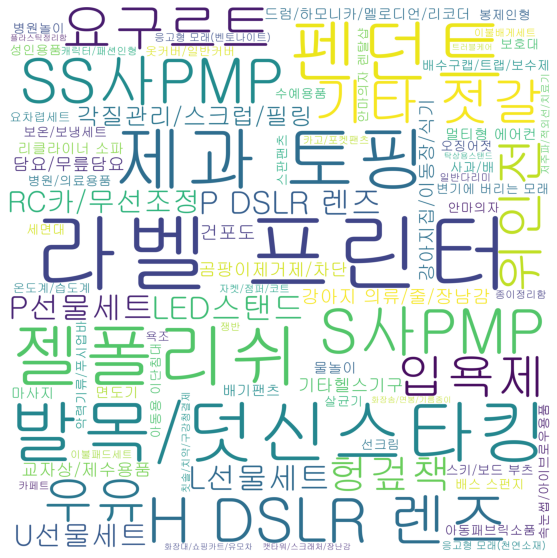

In [83]:
plt.figure(figsize=(10, 10))
plt.axis('off')



plt.imshow(wordCloud)



In [84]:
#LGROUP이 10(패션/잡화)이거나 20(뷰티)인 항목을 추출하여 anal_df에 저장한다.

anal_df = df[(df['LGROUP'] == 10) | (df['LGROUP'] == 20)]
anal_df

,CUST_SERIAL_NO,SEX,AGE,REG_DATE,ORDER_DATE,ORDER_HOUR,ORDER_WEEKDAY,IS_WEEKEND,GOODS_CODE,LGROUP,MGROUP,SGROUP,DGROUP,GOODS_NAME,PRICE,QTY
0,1000000023,F,40,2011-07,2011-11-14,"[0, 3[",토,T,20261,20,2,1,1,더무료체험,61500,1
1,1000000023,F,40,2011-07,2012-05-28,"[0, 3[",토,T,20728,10,10,3,1,메쉬런닝화 + 슈즈 2종 여성,42500,1
2,1000000023,F,40,2011-07,2012-05-28,"[0, 3[",토,T,20729,10,10,1,1,메쉬런닝화 + 슈즈 2종 남성,42500,1
6,1000000002,F,20,2011-07,2011-07-17,"[12, 15[",금,F,20008,10,13,3,5,진주 SET + 사은품 반지 2종,157500,1
8,1000000002,F,20,2011-07,2012-06-17,"[12, 15[",금,F,20144,10,10,3,1,스니커즈 2종,43300,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
507253,1000402953,M,70,2012-08,2012-08-02,"[9, 12[",화,F,20825,10,10,1,5,소가죽 남성화 3종,132500,1
507254,1000402929,M,70,2012-08,2012-08-02,"[9, 12[",화,F,20825,10,10,1,5,소가죽 남성화 3종,132500,1
507263,1000410405,M,90,2012-08,2012-08-05,"[9, 12[",금,F,20808,10,14,11,4,초특가 남성 여름티셔츠 4종세트,43300,1
507306,1000407639,M,100,2012-08,2012-08-04,"[9, 12[",목,F,20809,10,14,11,3,초특가 남성 썸머 골프팬츠 3종,43300,1


In [85]:
#고객 번호와 구매 월, 구매 요일을 이용하여 ID를 생성하고 조인을 위해 LMSD_ICODE도 추가한다.
#LMSD_ICODE 추가
anal_df[['LGROUP','MGROUP','SGROUP','DGROUP']] = anal_df[['LGROUP','MGROUP','SGROUP','DGROUP']].astype(str)
anal_df['LMSD_ICODE'] = anal_df[['LGROUP','MGROUP','SGROUP','DGROUP']].apply(''.join,axis=1)

In [86]:
#고객 번호와 구매 월, 구매 요일을 이용하여 ID를 생성
anal_df['month'] = anal_df['ORDER_DATE'].str.slice(start=5, stop=7)
anal_df[['CUST_SERIAL_NO']] = anal_df[['CUST_SERIAL_NO']].astype(str)

anal_df['ID'] = anal_df[['CUST_SERIAL_NO','month', 'ORDER_WEEKDAY']].apply(''.join,axis=1)


In [87]:
#LMSD_ICODE 생성
anal_df[['LGROUP','MGROUP','SGROUP','DGROUP']] = anal_df[['LGROUP','MGROUP','SGROUP','DGROUP']].astype(str)
anal_df['LMSD_ICODE'] = anal_df[['LGROUP','MGROUP','SGROUP','DGROUP']].apply(''.join,axis=1)

In [88]:
anal_df

,CUST_SERIAL_NO,SEX,AGE,REG_DATE,ORDER_DATE,ORDER_HOUR,ORDER_WEEKDAY,IS_WEEKEND,GOODS_CODE,LGROUP,MGROUP,SGROUP,DGROUP,GOODS_NAME,PRICE,QTY,LMSD_ICODE,month,ID
0,1000000023,F,40,2011-07,2011-11-14,"[0, 3[",토,T,20261,20,2,1,1,더무료체험,61500,1,20211,11,100000002311토
1,1000000023,F,40,2011-07,2012-05-28,"[0, 3[",토,T,20728,10,10,3,1,메쉬런닝화 + 슈즈 2종 여성,42500,1,101031,05,100000002305토
2,1000000023,F,40,2011-07,2012-05-28,"[0, 3[",토,T,20729,10,10,1,1,메쉬런닝화 + 슈즈 2종 남성,42500,1,101011,05,100000002305토
6,1000000002,F,20,2011-07,2011-07-17,"[12, 15[",금,F,20008,10,13,3,5,진주 SET + 사은품 반지 2종,157500,1,101335,07,100000000207금
8,1000000002,F,20,2011-07,2012-06-17,"[12, 15[",금,F,20144,10,10,3,1,스니커즈 2종,43300,1,101031,06,100000000206금
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
507253,1000402953,M,70,2012-08,2012-08-02,"[9, 12[",화,F,20825,10,10,1,5,소가죽 남성화 3종,132500,1,101015,08,100040295308화
507254,1000402929,M,70,2012-08,2012-08-02,"[9, 12[",화,F,20825,10,10,1,5,소가죽 남성화 3종,132500,1,101015,08,100040292908화
507263,1000410405,M,90,2012-08,2012-08-05,"[9, 12[",금,F,20808,10,14,11,4,초특가 남성 여름티셔츠 4종세트,43300,1,1014114,08,100041040508금
507306,1000407639,M,100,2012-08,2012-08-04,"[9, 12[",목,F,20809,10,14,11,3,초특가 남성 썸머 골프팬츠 3종,43300,1,1014113,08,100040763908목


In [89]:
#dgroup name 불러오기
dgroupname = pd.read_csv('VHD_GOODSKIND.csv')
dgroupname= dgroupname[( dgroupname['LGROUP'] == 10) | ( dgroupname['LGROUP'] == 20)]
#LMSD_ICODE 추가
dgroupname[['LGROUP','MGROUP','SGROUP','DGROUP']] = dgroupname[['LGROUP','MGROUP','SGROUP','DGROUP']].astype(str)
dgroupname['LMSD_ICODE'] = dgroupname[['LGROUP','MGROUP','SGROUP','DGROUP']].apply(''.join,axis=1)
dgroupname

,LGROUP,MGROUP,SGROUP,DGROUP,LGROUP_NAME,MGROUP_NAME,SGROUP_NAME,DGROUP_NAME,LMSD_CODE,LMSD_ICODE
119,10,2,3,11,패션/잡화,여성/캐주얼의류,데님/팬츠,스판팬츠,10020311,102311
230,10,1,8,9,패션/잡화,남성/캐주얼의류,팬츠/데님,기모팬츠,10010809,10189
1406,10,2,1,2,패션/잡화,여성/캐주얼의류,가죽/모피/무스탕,모피/Fur,10020102,10212
1407,10,2,2,1,패션/잡화,여성/캐주얼의류,니트/스웨터/가디건,기본니트,10020201,10221
1408,10,2,2,2,패션/잡화,여성/캐주얼의류,니트/스웨터/가디건,기본가디건,10020202,10222
...,...,...,...,...,...,...,...,...,...,...
2313,10,1,10,1,패션/잡화,남성/캐주얼의류,트레이닝/이지웨어,커플웨어,10011001,101101
2314,10,1,10,2,패션/잡화,남성/캐주얼의류,트레이닝/이지웨어,트레이닝 상의,10011002,101102
2315,10,1,10,3,패션/잡화,남성/캐주얼의류,트레이닝/이지웨어,트레이닝 하의,10011003,101103
2316,10,1,10,4,패션/잡화,남성/캐주얼의류,트레이닝/이지웨어,트레이닝 셋트,10011004,101104


In [90]:
real_anal_df= anal_df[['LMSD_ICODE', 'ID','QTY']]
dgroupname = dgroupname[['LMSD_ICODE', 'DGROUP_NAME']]

In [91]:
real_anal_df =pd.merge(left = real_anal_df, right= dgroupname, on = 'LMSD_ICODE')

In [92]:
final_df = real_anal_df[['ID','DGROUP_NAME', 'QTY']]
final_df

,ID,DGROUP_NAME,QTY
0,100000002311토,남성세트,1
1,100000762911토,남성세트,1
2,100002640211화,남성세트,1
3,100002641911화,남성세트,1
4,100002643211화,남성세트,1
...,...,...,...
143102,100026398005수,여성용,1
143103,100000003705수,여성용,1
143104,100000003705금,여성용,1
143105,100000003705금,여성용,1


In [93]:
df_pivot = final_df.pivot_table(index='ID', columns='DGROUP_NAME', values='QTY', aggfunc='sum').fillna(0)
df_pivot.head()

DGROUP_NAME,거들팬티,경등산화(트레킹화),고데기/아이론,골프팬츠,공용선글라스,기내용 캐리어,기능성웨어,기모팬츠,기타,남성내복(세트),...,파운데이션,패션가발,패턴/스트라이프니트,팩/마스크,팬티,페이스오일,피부&바디마사지/관리기,헤어젤/스프레이,효도/컴포트화,후드/맨투맨
ID,,,,,,,,,,,,,,,,,,,,,
100000000101수,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100000000103수,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100000000104금,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100000000104화,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
100000000109수,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [94]:
# 0, 1 로 변환해주는 함수
def encoding(x):
    if x<=0:
        return 0
    if x>=1:
        return 1

# applying the function to the dataset

df_pivot = df_pivot.applymap(encoding)
df_pivot.head()

DGROUP_NAME,거들팬티,경등산화(트레킹화),고데기/아이론,골프팬츠,공용선글라스,기내용 캐리어,기능성웨어,기모팬츠,기타,남성내복(세트),...,파운데이션,패션가발,패턴/스트라이프니트,팩/마스크,팬티,페이스오일,피부&바디마사지/관리기,헤어젤/스프레이,효도/컴포트화,후드/맨투맨
ID,,,,,,,,,,,,,,,,,,,,,
100000000101수,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
100000000103수,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
100000000104금,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
100000000104화,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
100000000109수,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [95]:
#real_anal_df =pd.merge(left = real_anal_df, right= dgroupname, on = 'LMSD_ICODE')

In [96]:
#real_anal_df = real_anal_df[['ID', 'DGROUP_NAME']]
#real_anal_df

In [97]:
#data = []
#for x in real_anal_df['DGROUP_NAME']:
 #   data.append([x])
#len(data)
    

In [238]:
#real_anal_df= anal_df[['LMSD_ICODE', 'ID', 'QTY']]
#dgroupname = dgroupname[['LMSD_ICODE', 'DGROUP_NAME']]

In [191]:
#real_anal_df =pd.merge(left = real_anal_df, right= dgroupname, on = 'LMSD_ICODE')

In [192]:
#real_real_anal_df = real_anal_df.groupby(['ID', 'DGROUP_NAME'])['QTY'].sum()
#real_real_anal_df=real_real_anal_df.unstack().reset_index()
#final_anal_df =real_real_anal_df.transpose()
#final_anal_df.rename(columns=final_anal_df.iloc[0],inplace=True)
#final_anal_df = final_anal_df.drop(final_anal_df.index[0])
#final_df =final_anal_df.T


In [193]:
#final_df

In [194]:
#final_df.columns = final_df.columns.str.replace(pat=r'[^\w]',repl=r' ',regex=True)

In [195]:
#final_df.columns

# 연관성 분석을 통한  상품 추천

In [133]:
#apriori() 함수를 사용하여 연관성 분석을 수행한다. 
#!pip install mlxtend
#!pip install apyori
from apyori import apriori
from mlxtend.frequent_patterns import association_rules, apriori
from mlxtend.preprocessing import TransactionEncoder


In [134]:
freq_item = apriori(df_pivot, min_support = 0.0001,use_colnames = True)
rules = association_rules(freq_item, metric="confidence", min_threshold=0.0001)

C:\Users\HP\miniconda3\envs\yoona\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:115: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  DeprecationWarning,


In [135]:
freq_item

,support,itemsets
0,0.002814,(거들팬티)
1,0.002391,(경등산화(트레킹화))
2,0.015806,(고데기/아이론)
3,0.012391,(골프팬츠)
4,0.000416,(기내용 캐리어)
...,...,...
76,0.000111,"(바지, 샴푸)"
77,0.000178,"(선글라스, 바지)"
78,0.000208,"(정장화, 바지)"
79,0.000245,"(선글라스, 반팔)"


In [136]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(등산화),(기타),0.078301,0.032176,0.000148,0.001896,0.058935,-0.002371,0.969663
1,(기타),(등산화),0.032176,0.078301,0.000148,0.004615,0.058935,-0.002371,0.925972
2,(바지),(기타),0.211206,0.032176,0.000267,0.001265,0.039329,-0.006528,0.969051
3,(기타),(바지),0.032176,0.211206,0.000267,0.008306,0.039329,-0.006528,0.795401
4,(반팔),(기타),0.154412,0.032176,0.000156,0.001010,0.031380,-0.004812,0.968802
5,(기타),(반팔),0.032176,0.154412,0.000156,0.004845,0.031380,-0.004812,0.849705
6,(등산화),(바지),0.078301,0.211206,0.000512,0.006542,0.030975,-0.016025,0.793989
7,(바지),(등산화),0.211206,0.078301,0.000512,0.002425,0.030975,-0.016025,0.923940
8,(반팔),(등산화),0.154412,0.078301,0.000386,0.002500,0.031930,-0.011705,0.924009
9,(등산화),(반팔),0.078301,0.154412,0.000386,0.004930,0.031930,-0.011705,0.849778


<AxesSubplot:xlabel='support', ylabel='confidence'>

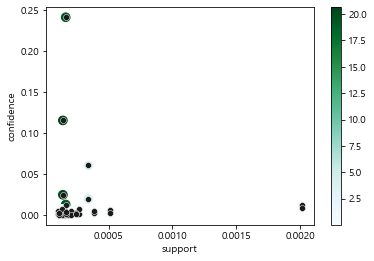

In [137]:
#룰에 대한 분석 결과를 시각화 한다.
points = plt.scatter(rules["support"], rules["confidence"],
                     c=rules["lift"], s=75, cmap="BuGn")
plt.colorbar(points)

sns.scatterplot(x='support', y='confidence', data=rules,color=".1")


In [146]:

import pandas as pd
df=pd.read_csv('CUST_ORDER_OUTPUT2.utf8.csv')
df1=df[df['SEX']!='*']

analDf=df1.iloc[:,[0,13]][(df1.LGROUP==10) | (df1.LGROUP==20)]  # 패션잡화와 뷰티
analDf.head()  #사용할 데이터만 남김

,CUST_SERIAL_NO,GOODS_NAME
0,1000000023,더무료체험
1,1000000023,메쉬런닝화 + 슈즈 2종 여성
2,1000000023,메쉬런닝화 + 슈즈 2종 남성
6,1000000002,진주 SET + 사은품 반지 2종
8,1000000002,스니커즈 2종


In [147]:
# CUST_SERIAL_NO를 같은 번호끼리 1,1,1, 2,2,2, 이런식으로 나열하고자 함
bigo=analDf['CUST_SERIAL_NO'][0]
bun=1;bunhoList=[]
for x in analDf['CUST_SERIAL_NO']:
    if x!=bigo:
        bun+=1
    bunhoList.append(bun)
analDf['order_id']=bunhoList
analDf.head()

,CUST_SERIAL_NO,GOODS_NAME,order_id
0,1000000023,더무료체험,1
1,1000000023,메쉬런닝화 + 슈즈 2종 여성,1
2,1000000023,메쉬런닝화 + 슈즈 2종 남성,1
6,1000000002,진주 SET + 사은품 반지 2종,2
8,1000000002,스니커즈 2종,3


In [150]:
# 인덱스값 0,1,2,3,...으로 재설정
analDf=analDf.reset_index(drop=True)
analDf.head()

,CUST_SERIAL_NO,GOODS_NAME,order_id
0,1000000023,더무료체험,1
1,1000000023,메쉬런닝화 + 슈즈 2종 여성,1
2,1000000023,메쉬런닝화 + 슈즈 2종 남성,1
3,1000000002,진주 SET + 사은품 반지 2종,2
4,1000000002,스니커즈 2종,3


In [151]:
# 같은 order번호를 갖고 있는 것끼리 모음
cnt=len(analDf['order_id'].unique())+1

df_tmp=analDf[['order_id','GOODS_NAME']]
df_tmp_arr=[[]for i in range(cnt)]
num=0

for i in df_tmp['GOODS_NAME']:
    df_tmp_arr[df_tmp['order_id'][num]].append(i)
    num+=1

df_tmp_arr[0:6]
    

[[],
 ['더무료체험', '메쉬런닝화 + 슈즈 2종 여성', '메쉬런닝화 +  슈즈 2종  남성'],
 ['진주 SET + 사은품 반지 2종'],
 ['스니커즈 2종'],
 ['진주 SET + 사은품 반지 2종'],
 ['360도 쿨 브라팬티']]

In [152]:
df_tmp_arr.pop(0)  # 가장상단의 [] 표시를 지우고

# 중복있는 자료를 제거하고자함.
num=0
for i in df_tmp_arr :
    df_tmp_arr[num] = list(set(df_tmp_arr[num]))
    num+=1
df_tmp_arr[:5]

[['메쉬런닝화 + 슈즈 2종 여성', '메쉬런닝화 +  슈즈 2종  남성', '더무료체험'],
 ['진주 SET + 사은품 반지 2종'],
 ['스니커즈 2종'],
 ['진주 SET + 사은품 반지 2종'],
 ['360도 쿨 브라팬티']]

In [153]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

te = TransactionEncoder()
te_ary = te.fit(df_tmp_arr).transform(df_tmp_arr)
df = pd.DataFrame(te_ary, columns=te.columns_)
df

,11종무료체험,1만원 인하 기모본딩 남성바지 3종,1만원세일 루나 화 여성화,2016 골프바지 3종,210수 브라팬티,360도 쿨 브라팬티,3D 드로즈,3D브라팬티 18종,3종핸드백,5번가 EDP 125ml,...,패션 브리프 17종,팩 세트 6개 1set X 2총 12개+립클렌저,퍼블릭 트렁크 패키지 10종세트,펀칭 슬립온 슈즈,펄 마스크,퓨어 선롤러 30ml*4 + 100ml*1 + 롤러리필 2개,핫썸머 쿨웨어 4종남성,핫썸머 쿨웨어 4종여성,헤어속뽕 5P+컬링브러쉬,화이트 셔츠
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143099,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
143100,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
143101,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
143102,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [154]:
frequent_itemsets = apriori(df, min_support=0.0001,use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.001628,(11종무료체험)
1,0.001544,(1만원 인하 기모본딩 남성바지 3종)
2,0.001167,(1만원세일 루나 화 여성화)
3,0.006415,(2016 골프바지 3종)
4,0.000300,(360도 쿨 브라팬티)
...,...,...
117,0.000790,(펄 마스크)
118,0.001356,(퓨어 선롤러 30ml*4 + 100ml*1 + 롤러리필 2개)
119,0.001237,(핫썸머 쿨웨어 4종남성)
120,0.000419,(핫썸머 쿨웨어 4종여성)


In [155]:
### 어프라이어리(Apriori) 모듈  사용
from apyori import apriori

# 데이터셋은 위에서 작성한 리스트자료(중복제거하고 같은 번호끼리 모아놓은)
result=(apriori(df_pivot, min_support=0.0001))

In [ ]:

df=pd.DataFrame(result)
df['length']=df['items'].apply(lambda x: len(x))


# 2개의 자료에 대한 연관분석을 실시하기 위해 ==2 로 하고
# 이 자료는 대부분 1개의 자료만 나와서 support값을 아주 작게함
df=df[(df['length']==2) & (df['support']>0.000001)].sort_values(by='support',
                                                           ascending=False)
df.head(100)

In [ ]:
import networkx as nx
import numpy as np
G=nx.Graph()
ar=df['items']
G.add_edges_from(ar)

In [ ]:
pr=nx.pagerank(G)
nsize=np.array([v for v in pr.values()])
print(nsize)

nsize=200*(nsize-min(nsize)) / (max(nsize)-min(nsize))

In [ ]:
# 네트워크 그래프 제작
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

pos=nx.planar_layout(G)
plt.figure(figsize=(16,12));plt.axis('off')

fname = fm.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
#rc('font', family=font_name)
        

nx.draw_networkx(G, font_family=fname,
                 font_size=16,
                 pos=pos,
                 node_color=list(pr.values()),node_size=nsize,
                 alpha=0.7, edge_color='.5', cmap=plt.cm.YlGn)